# **Data context**
The dataset contains of 10999 orderes with their detailed characteristics.

*(source: https://www.kaggle.com/datasets/poojakeer/e-commerce-dataset)*

# **Data content**

The cv file contains of 12 fields. The description of each field is as below:

*   **ID**: ID Number of Customers.
*   **Warehouse block**: The Company have big Warehouse which is divided in to block such as A, B, C, D, E.
*   **Mode of shipment**: The Company Ships the products in multiple way such as Ship, Flight and Road.
*   **Customer care calls**: The number of calls made from enquiry for enquiry of the shipment.
*   **Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
*   **Cost of the product**: Cost of the Product in US Dollars.
*   **Prior purchases**: The Number of Prior Purchase.
*   **Product importance**: The company has categorized the product in the various parameter such as low, medium, high.
*   **Gender**: Male and Female.
*   **Discount offered**: Discount offered on that specific product.
*   **Weight in gms**: It is the weight in grams.
*   **Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

*(source: https://www.kaggle.com/datasets/poojakeer/e-commerce-dataset)*

# **Installation and imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import auc, RocCurveDisplay
from sklearn.metrics._plot.precision_recall_curve import precision_recall_curve
from sklearn import metrics

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import SMOTE

from joblib import dump, load
import joblib

warnings.filterwarnings('ignore')

from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Load the data**

In [3]:
df = pd.read_csv("gdrive/My Drive/e_commerce.csv")

# **EDA**

In [4]:
# Shape of data
df.shape

(10999, 12)

In [5]:
# First 5 rows of data
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [6]:
# Data types - 5 categorical and 7 numerical (target variable type will be changed soon)
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [7]:
# Unique value in each column
print(df.nunique())

ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64


In [8]:
# Unique values in each column
pd.Series({c: df[c].unique() for c in df})

ID                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Warehouse_block                                          [D, F, A, B, C]
Mode_of_Shipment                                    [Flight, Ship, Road]
Customer_care_calls                                   [4, 2, 3, 5, 6, 7]
Customer_rating                                          [2, 5, 3, 1, 4]
Cost_of_the_Product    [177, 216, 183, 176, 184, 162, 250, 233, 150, ...
Prior_purchases                                [3, 2, 4, 6, 5, 7, 10, 8]
Product_importance                                   [low, medium, high]
Gender                                                            [F, M]
Discount_offered       [44, 59, 48, 10, 46, 12, 3, 11, 29, 32, 1, 43,...
Weight_in_gms          [1233, 3088, 3374, 1177, 2484, 1417, 2371, 280...
Reached.on.Time_Y.N                                               [1, 0]
dtype: object

In [9]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [10]:
# Statistics for numerical columns
print(df.describe().T)

                       count         mean          std     min     25%  \
ID                   10999.0  5500.000000  3175.282140     1.0  2750.5   
Customer_care_calls  10999.0     4.054459     1.141490     2.0     3.0   
Customer_rating      10999.0     2.990545     1.413603     1.0     2.0   
Cost_of_the_Product  10999.0   210.196836    48.063272    96.0   169.0   
Prior_purchases      10999.0     3.567597     1.522860     2.0     3.0   
Discount_offered     10999.0    13.373216    16.205527     1.0     4.0   
Weight_in_gms        10999.0  3634.016729  1635.377251  1001.0  1839.5   
Reached.on.Time_Y.N  10999.0     0.596691     0.490584     0.0     0.0   

                        50%     75%      max  
ID                   5500.0  8249.5  10999.0  
Customer_care_calls     4.0     5.0      7.0  
Customer_rating         3.0     4.0      5.0  
Cost_of_the_Product   214.0   251.0    310.0  
Prior_purchases         3.0     4.0     10.0  
Discount_offered        7.0    10.0     65.0  
Weig

In [11]:
# Check for null values (no null values)
print(df.isnull().sum())

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


In [12]:
# Check for nan values (no nan values)
print(df.isna().sum())

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


In [13]:
# Simplify the column names
df.columns = (['ID', 'Block', 'Shipment', 'Care', 'Rating', 'Cost', 'Prior', 'Importance', 'Gender', 'Discount', 'Weight', 'Delay'])

In [14]:
# Reduce the memory thanks to changing the type of columns from object to categorical
df['Block'] = df['Block'].astype('category')
df['Shipment'] = df['Shipment'].astype('category')
df['Importance'] = df['Importance'].astype('category')
df['Gender'] = df['Gender'].astype('category')

In [15]:
# Check the details after change - less memory usage
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          10999 non-null  int64   
 1   Block       10999 non-null  category
 2   Shipment    10999 non-null  category
 3   Care        10999 non-null  int64   
 4   Rating      10999 non-null  int64   
 5   Cost        10999 non-null  int64   
 6   Prior       10999 non-null  int64   
 7   Importance  10999 non-null  category
 8   Gender      10999 non-null  category
 9   Discount    10999 non-null  int64   
 10  Weight      10999 non-null  int64   
 11  Delay       10999 non-null  int64   
dtypes: category(4), int64(8)
memory usage: 731.1 KB
None


In [16]:
# Statistics for categorical data
print(df.describe(include = 'category').T)

            count unique   top  freq
Block       10999      5     F  3666
Shipment    10999      3  Ship  7462
Importance  10999      3   low  5297
Gender      10999      2     F  5545


In [17]:
# Group by Block and Shipment
occur = df.groupby(['Block', 'Shipment'], as_index = False).size()
by_block_and_ship = pd.DataFrame(occur)
print(by_block_and_ship)

   Block Shipment  size
0      A   Flight   297
1      A     Road   294
2      A     Ship  1242
3      B   Flight   296
4      B     Road   294
5      B     Ship  1243
6      C   Flight   295
7      C     Road   294
8      C     Ship  1244
9      D   Flight   297
10     D     Road   292
11     D     Ship  1245
12     F   Flight   592
13     F     Road   586
14     F     Ship  2488


In [18]:
# Group by Importance and Gender
occur = df.groupby(['Importance', 'Gender'], as_index = False).size()
by_imp_and_gender = pd.DataFrame(occur)
print(by_imp_and_gender)

  Importance Gender  size
0       high      F   470
1       high      M   478
2        low      F  2652
3        low      M  2645
4     medium      F  2423
5     medium      M  2331


In [19]:
# Group by Block and sum rows
block = df.groupby(['Block'], as_index = False).count()
by_block = block[['Block', 'Gender']].copy()
by_block.columns = (['Block', 'Amount'])
print(by_block)

  Block  Amount
0     A    1833
1     B    1833
2     C    1833
3     D    1834
4     F    3666


In [20]:
# Group by Shipment and sum rows
ship = df.groupby(['Shipment'], as_index = False).count()
by_shipment = ship[['Shipment', 'Gender']]
by_shipment.columns = (['Shipment', 'Amount'])
print(by_shipment)

  Shipment  Amount
0   Flight    1777
1     Road    1760
2     Ship    7462


In [21]:
# Group by Importance and sum rows
imp = df.groupby(['Importance'], as_index = False).count()
by_imp = imp[['Importance', 'Gender']]
by_imp.columns = (['Importance', 'Amount'])
print(by_imp)

  Importance  Amount
0       high     948
1        low    5297
2     medium    4754


In [22]:
# Group by Gender and sum rows
gender = df.groupby(['Gender'], as_index = False).count()
by_gender = gender[['Gender', 'Shipment']]
by_gender.columns = (['Gender', 'Amount'])
print(by_gender)

  Gender  Amount
0      F    5545
1      M    5454


In [23]:
# Group by Delay and sum rows - the dataset is not well balanced, 40% on time and 60% delayed orders
delay = df.groupby(['Delay'], as_index = False).count()
by_delay = delay[['Delay', 'Shipment']]
by_delay.columns = (['Delay', 'Amount'])
print(by_delay)

   Delay  Amount
0      0    4436
1      1    6563


In [24]:
# Drop ID column
df = df.drop('ID', axis = 1)
df.head()

,Block,Shipment,Care,Rating,Cost,Prior,Importance,Gender,Discount,Weight,Delay
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


<Axes: >

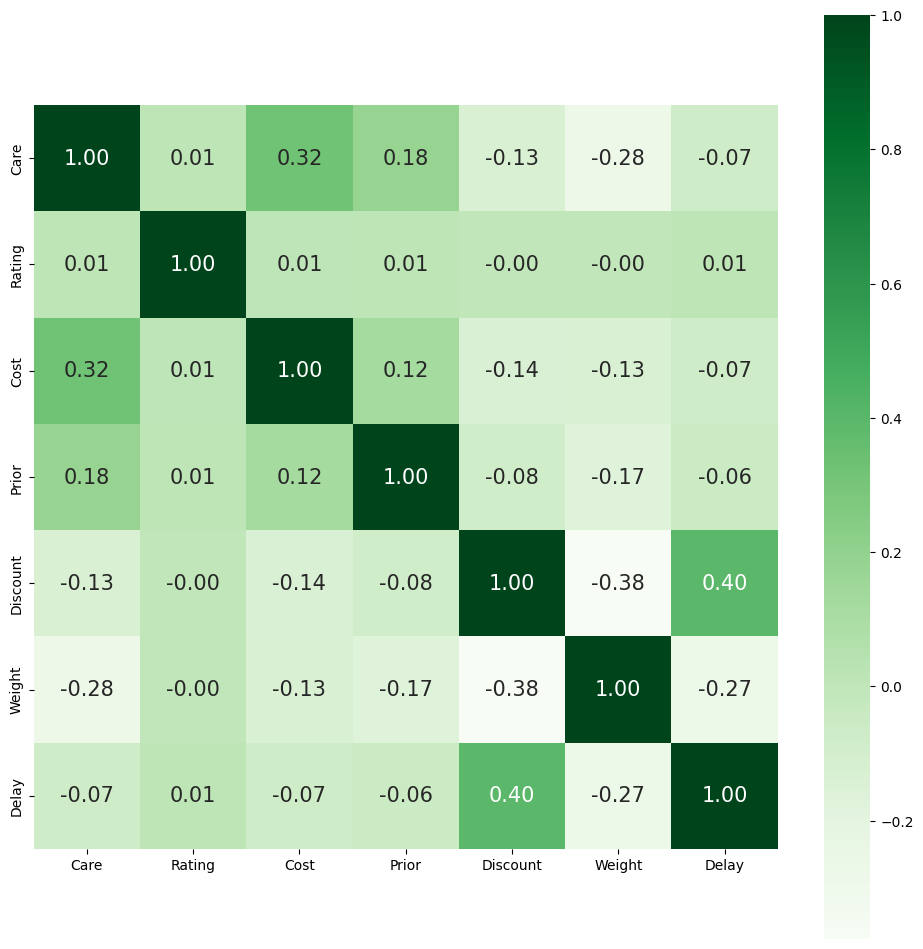

In [25]:
# Correlation matrix before transformations
plt.figure(figsize=(12,12))
count_corr = df.corr()
sns.heatmap(count_corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Greens')



*   The highest correlation is between Discount/Delay (0.4), Discount/Weight (-0.38) and Care_calls/Cost (0.32).
*   The lowest correlation is between Rating/Weight and Rating/Discount (no correlation).

# **Visualization**

[]

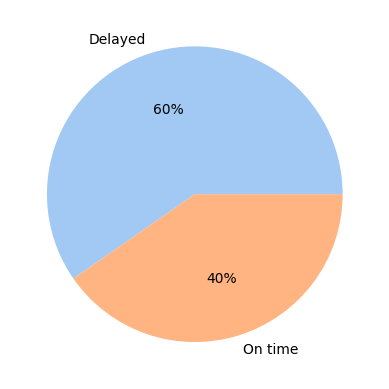

In [26]:
# Based on below countplot for Delay column, dataset is not well balanced (60% vs 40%)
delayed = (df[df['Delay'] == 1]).count()
non_delayed = (df[df['Delay'] == 0]).count()
data = [delayed[0], non_delayed[0]]
colors = sns.color_palette('pastel')
labels = ['Delayed', 'On time']
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.plot()

<Axes: xlabel='Block', ylabel='count'>

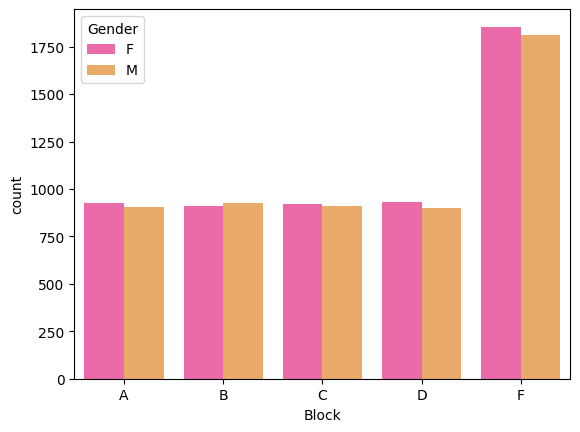

In [27]:
# Most female and male consumers bought products from block E, similar results for other blocks
women = df[df['Gender'] == 'F']
men = df[df['Gender'] == 'M']
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
sns.countplot(x='Block', hue='Gender', data=df, palette='spring')

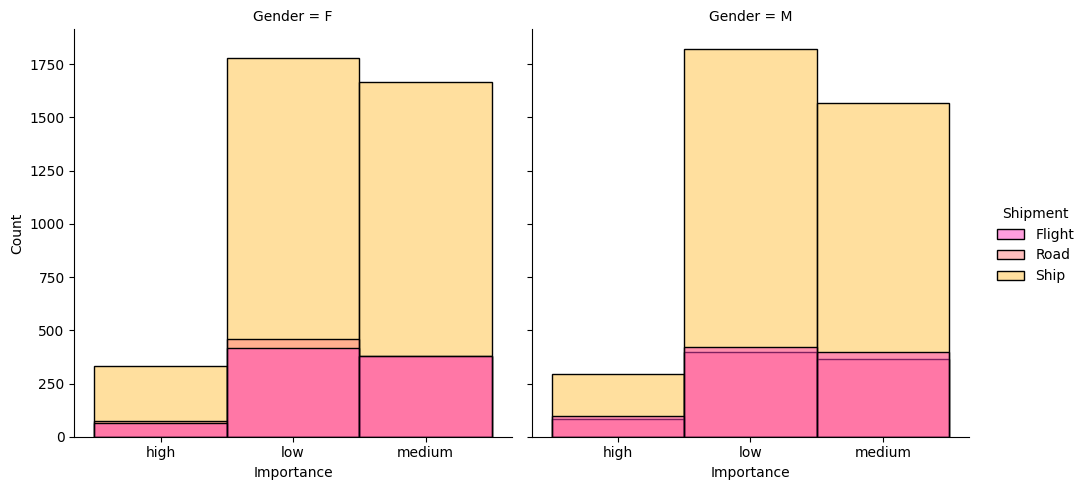

In [28]:
# Most of products were decribed as low or medium important and delivered by ship (similar distribution for both sexes)
sns.displot(data=df, x='Importance', hue='Shipment', col='Gender', palette="spring")

<Axes: xlabel='Shipment'>

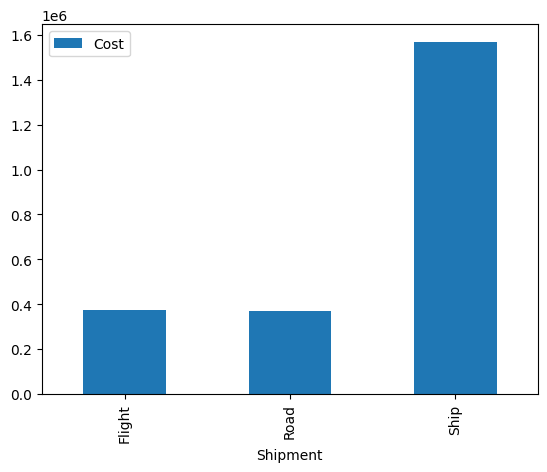

In [29]:
# Most of product were delivered by ship, flight and road methods are at the same low level
group_mode = df.groupby(by=["Shipment"]).aggregate({"Cost":"sum"})
group_mode.plot(kind='bar')

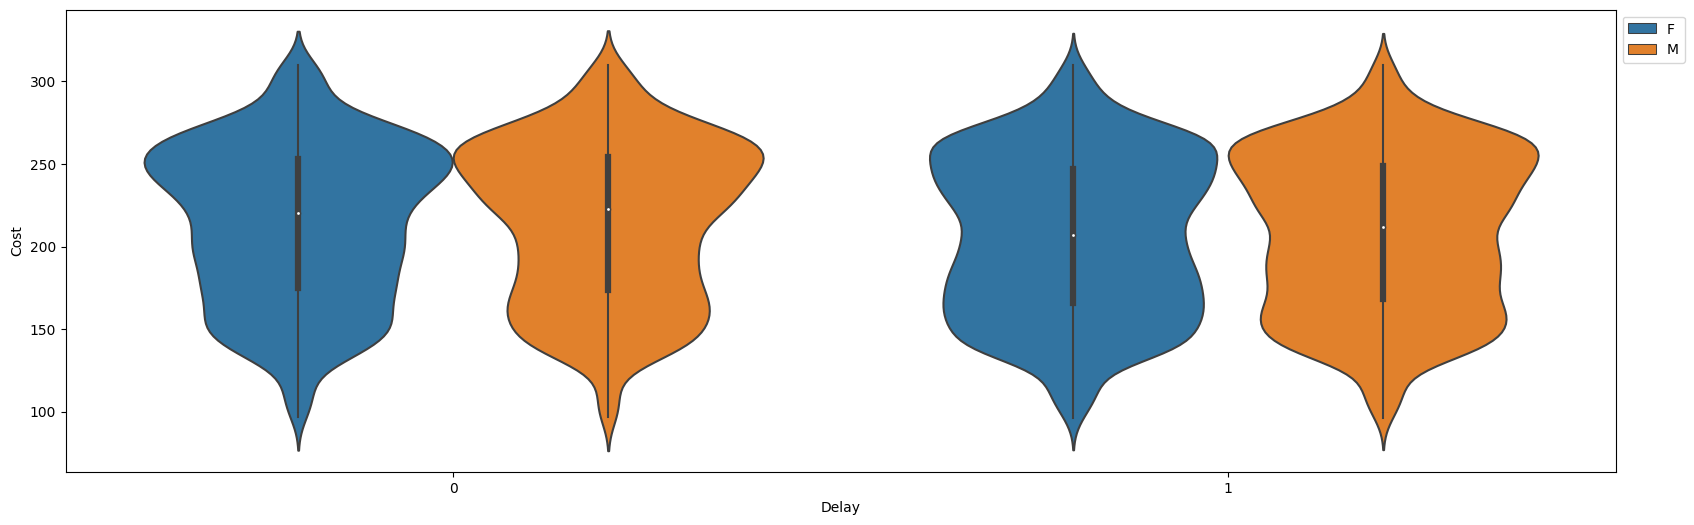

In [30]:
# Violin plots for Delay, Cost and Gender (similar for both genders)
plt.figure(figsize=(20,6))
v = sns.violinplot(x='Delay', y='Cost', data=df, hue='Gender')
plt.legend(loc=2, bbox_to_anchor=(1,1))

In [31]:
# The higher the rating, the most probable is the delay
print('Percentage of Delay in Rating above 3:')
above_three = df[(df['Rating'] >= 3)]
above_three_delay = df[(df['Rating'] >= 3) & (df['Delay'] == 1)]
print(len(above_three_delay)/len(above_three)*100)

print('Percentage of Delay in Rating below 3:')
below_three = df[(df['Rating'] < 3)]
below_three_delay = df[(df['Rating'] < 3) & (df['Delay'] == 1)]
print(len(below_three_delay)/len(below_three)*100)

Percentage of Delay in Rating above 3:
60.26670707682982
Percentage of Delay in Rating below 3:
58.77272727272727


In [32]:
# The correlation between numerical columns and target column (Delay), the highest correlation for Weight and Discount
num_cols = ['CareCalls', 'Rating', 'Cost', 'PriorPurchases', 'Discount', 'Weight', 'Delay']
df[num_cols].corr()['Delay'][:-1].sort_values().plot(kind = 'bar')

KeyError: ignored

In [ ]:
# Clustemap for all columns
sns.clustermap(df.corr(), cmap = 'viridis')


*   Clustermap displays hierachical clustering. It is a method of grouping data based on similarity.
*   Based on above, the most similar columns are Care_calls/Cost and Delay/Discount at first level.






In [ ]:
# Most of the products with delayed shipment have higher discount than those arrived on time (more outliers for delayed orders)
sns.boxplot(data = df, y = 'Discount', x = 'Delay')
sns.violinplot(data = df, y = 'Discount', x = 'Delay')

In [ ]:
# Correlation after columns transformation, the biggest correlation for Weight and Discount in respect of target column Delay
df['Delay'] = df['Delay'].astype('category')
dum = pd.get_dummies(df)
corr = dum.corr()
corr_delay_yes= corr['Delay_1'].sort_values().iloc[1:-1]

sns.barplot(x=corr_delay_yes.index, y=corr_delay_yes.values)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Most orders have 3 and 4 care calls
sns.histplot(data = df, x = 'Care', bins = 40)

In [ ]:
# Histograms separated by two additional features - Gender and Delay (no significant differences)
sns.displot(data = df, x = 'Rating', bins=70, col='Gender', row='Delay')
plt.show()

In [ ]:
# Scatter plot of Cost versus Weight and color hue by Delay, most of products with delay weighted between 2000 and 4000 gms and had cost between 180 and 270
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data = df, y = 'Cost', x = 'Weight', hue = 'Delay', alpha=0.4, palette='Dark2')
plt.show()

In [ ]:
# Scatter plot of Cost versus Discount and color hue by Delay, products arrived on time had discount 10 at most and had huge variety of cost
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data = df, y = 'Cost', x = 'Discount', hue = 'Delay', alpha=0.4, palette='Dark2')
plt.show()

In [ ]:
# Products grouped by weight
all = df.groupby('Weight').size()

# Products grouped by weight and presence of delay
yes_delay = df[df['Delay'] == 1].groupby('Weight').size()
no_delay = df[df['Delay'] == 0].groupby('Weight').size()

# The percentage of delayed orders for each weight
ans = pd.DataFrame(yes_delay/all*100)
cols = ['Percentage']
ans[0].fillna(0, inplace=True)
ans.columns = (cols)
ans.head()

In [ ]:
# The heaviest orders have the smallest discount
df1 = df.copy()
weight = pd.DataFrame(df1['Weight'])

def cohort(tenure):
  if tenure < 2000:
    return '0-2000 gms'
  elif tenure < 4000:
    return '2001-4000 gms'
  elif tenure < 6000:
    return '4001-6000 gms'
  else:
    return '6001-8000 gms'

df1['Weight_cohort'] = df1['Weight'].apply(cohort)

plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data = df1, y = 'Cost', x = 'Discount', hue = 'Weight_cohort', alpha=0.4, palette='Dark2')
plt.show()

In [ ]:
# Distribution for Discount, Care Calls and Importance of products, most of products have 3, 4 or 5 phone calls and low importance, discount 10 at most
sns.displot(data=df, x='Discount', hue='Importance', col='Care')
plt.show()

In [ ]:
# Kde plot for Prior_purchases and Discount, the biggest discounts have orders with approximately 5 prior purchases
sns.kdeplot(x='Prior', y='Discount', data=df, fill=True, cmap='magma')
plt.show()

In [ ]:
# Pairplot for all numerical columns with Delay as hue
sns.pairplot(df, hue = 'Delay')

# **Modelling preparation**

In [35]:
# Dataframe with models results
results = pd.DataFrame()
results['Name'] = []
results['Precision train'] = []
results['Recall train'] = []
results['Accuracy train'] = []
results['F1 train'] = []
results['Precision test'] = []
results['Recall test'] = []
results['Accuracy test'] = []
results['F1 test'] = []
results['AUC test'] = []

In [36]:
# Retrieving columns which will represent independent/dependent variables
X = df.drop(['Delay'], axis = 1)
X = pd.get_dummies(X, drop_first = True)
y = df[['Delay']]

In [37]:
# The dataset is not well balanced 60% vs 40%
y.value_counts()

Delay
1        6563
0        4436
dtype: int64

In [38]:
# SMOTE method for making dataset well balanced
smote = SMOTE(sampling_strategy = 'not majority')
X_sm, y_sm = smote.fit_resample(X, y)

In [39]:
# The same amount of examples for target labels - well balanced dataset
y_sm.value_counts()

Delay
0        6563
1        6563
dtype: int64

In [40]:
# Undummified function
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

In [41]:
# Turn back to X without dummies because of making pipelines
X_sm = undummify(X_sm)

In [42]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, shuffle = True, random_state = 111)

In [43]:
# Feature engineering
num_attr = X_train.select_dtypes(include='number').columns
cat_attr = X_train.select_dtypes(exclude='number').columns

In [44]:
# Pipelines for different column types and overall pipeline
num_pipeline = Pipeline(
    [
      ('scaler', StandardScaler())
    ]
)

cat_pipeline = Pipeline(
    [
        ('ohe', OneHotEncoder(sparse=False))
    ]
)

cat_num_pipeline = ColumnTransformer(
    [
        ('numerical', num_pipeline, num_attr),
        ('categorical', cat_pipeline, cat_attr)
    ]
)

In [45]:
cat_num_pipeline

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(sparse=False))]),
                                 Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])

# **Logistic Regression**

## LR with GridSearchCV

In [46]:
# Model definition
lr_param_grid = [
    {
        "lr__penalty": ['l2', 'l1'],
        "lr__C": np.logspace(0, 10, 20),
    }
]
lr_model = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('lr', LogisticRegression(solver = 'saga', max_iter = 500))
    ]
)

In [47]:
# Model fitting
grid_model_lr = GridSearchCV(lr_model, param_grid = lr_param_grid, cv=5, scoring='accuracy')
grid_model_lr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cat_num_pipeline',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(sparse=False))]),
                                                                         Index(['Block', 'Shipment', 'Importance', 'Gender'], d...
             param_grid=[{'lr__C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                          'lr__penalty': ['l2', 'l1']}],
             scoring='accuracy')

In [48]:
# Best model parameters
lr_penalty = grid_model_lr.best_params_['lr__penalty']
lr_C = grid_model_lr.best_params_['lr__C']

In [49]:
# Best model details
model_1 = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('lr', LogisticRegression(solver = 'saga', max_iter = 500, penalty = lr_penalty, C = lr_C))
    ]
)

In [50]:
# Best model fitting
model_1.fit(X_train, y_train)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
                ('lr',
                 LogisticRegression(max_iter=500, penalty='l1',
                                    solver='saga'))])

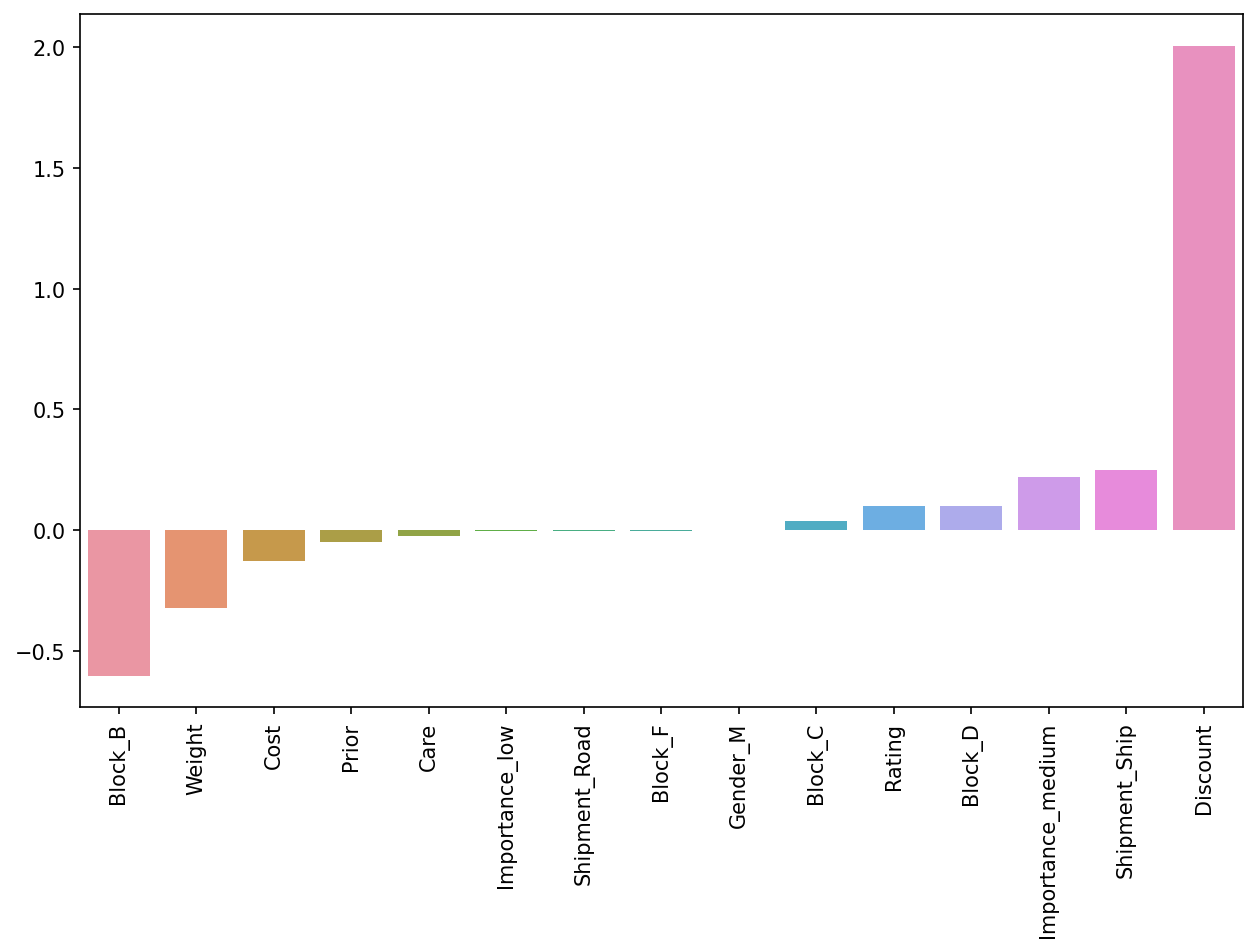

In [51]:
# Coefficient vizualisation with sorting
coefs = pd.Series(index = X.columns, data = model_1['lr'].coef_[0])
coefs = coefs.sort_values()
plt.figure(figsize=(10,6), dpi=150)
sns.barplot(x=coefs.index, y=coefs.values)
plt.xticks(rotation = 90)
plt.show()



*   We can expect the odds of delayed order to decrease (the original coeff was negative) per unit increase of Block_B.
*   We can expect the odds of delayed order to increase (the original coeff was positive) per unit increase of Discount.
*   The Discount indicator is the strongest predictor.





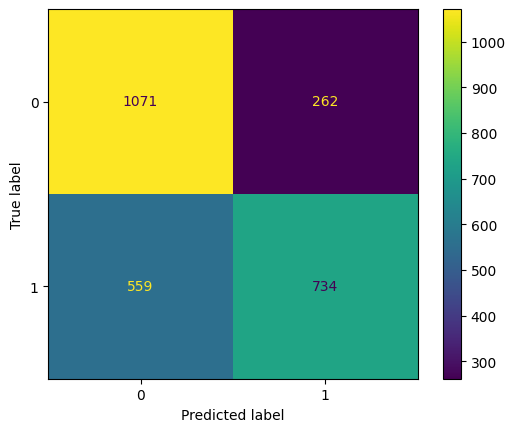

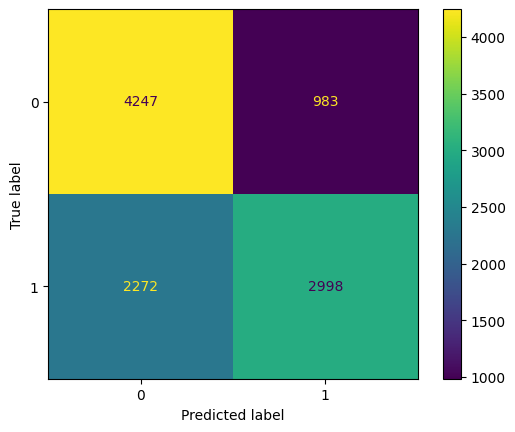

In [52]:
# Model performance evaluation for test and train set
y_pred = model_1.predict(X_test)
y_pred_tr = model_1.predict(X_train)
# Confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(model_1, X_test, y_test)
# Confusion matrix for train set
ConfusionMatrixDisplay.from_estimator(model_1, X_train, y_train)

In [53]:
# Classification report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.80      0.72      1333
           1       0.74      0.57      0.64      1293

    accuracy                           0.69      2626
   macro avg       0.70      0.69      0.68      2626
weighted avg       0.70      0.69      0.68      2626



In [54]:
# Classification report for train set
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       0.65      0.81      0.72      5230
           1       0.75      0.57      0.65      5270

    accuracy                           0.69     10500
   macro avg       0.70      0.69      0.69     10500
weighted avg       0.70      0.69      0.69     10500




*   The overall accuracy for test set is 0.69, for delayed orders (class 1) it achieved worse result 0.57 whereas for on-time orders (class 0) - 0.80.
*   Precision, recall and f1-score for test set for class 0 are: 0.66, 0.80, 0.72 and for class 1: 0.74, 0.57, 0.64.
*   The overall accuracy for train set is 0.69, for delayed orders (class 1) it achieved worse result 0.57 whereas for on-time orders (class 0) - 0.81.
*   Precision, recall and f1-score for train set for class 0 are: 0.65, 0.81, 0.72 and for class 1: 0.75, 0.57, 0.65.
*   For test set 0.57 relevant cases were found and for train set - 0.57 (recall for class 1).
*   For class 1, the prediction was correct in 74% for test cases and in 75% for train cases (precision for class 1).
*   Based on above, train and test sets achieved similar results.

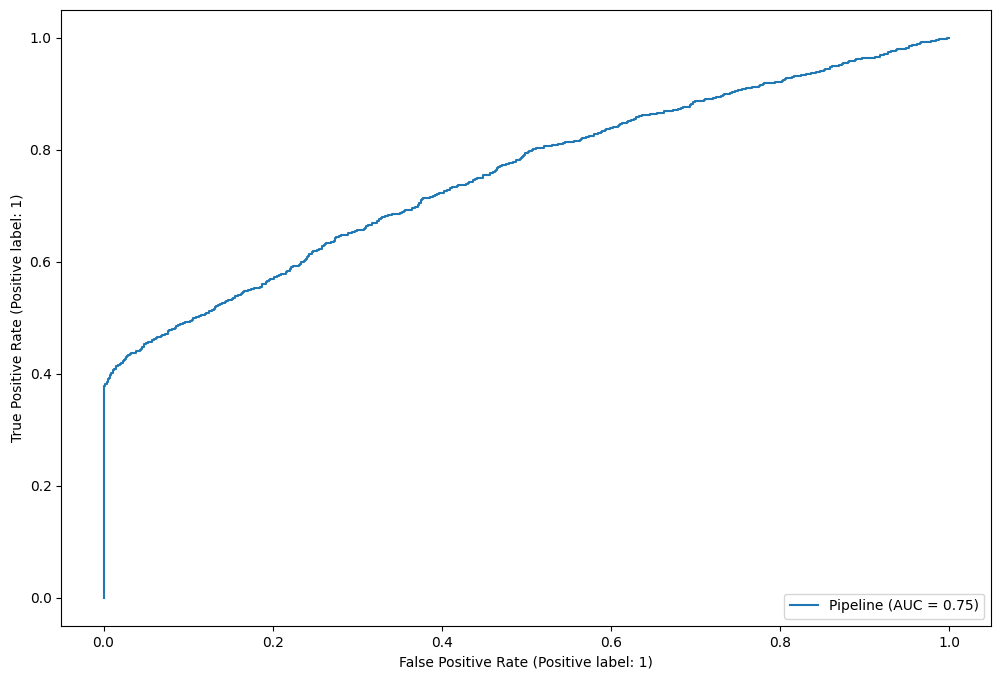

In [55]:
# ROC curve
fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_1, X_test, y_test, ax = ax)
plt.show()

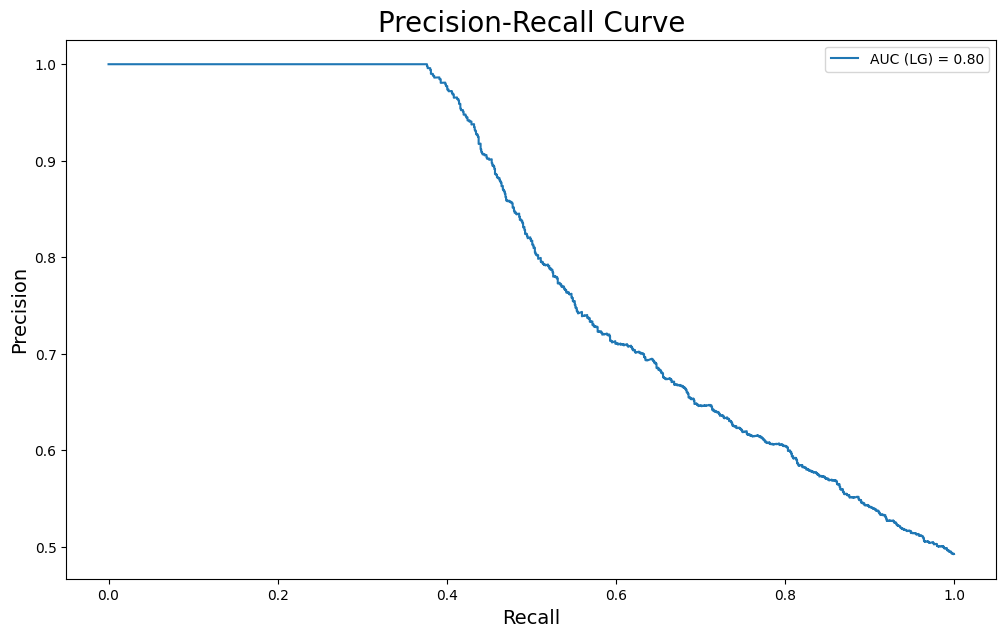

In [56]:
# Precision-Recall curve
y_scores = model_1.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
auc_1 = metrics.auc(recall, precision)
plt.figure(figsize=(12, 7))
plt.plot(recall, precision,  label=f'AUC (LG) = {auc_1:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend()

*   The clasifier for class 1 (delayed orders) has AUC = 0.80 which means that it achieved good predictive performance across all the thresholds. The higher the value of AUC, the better is the classifier.
*   At threshold with the low recall, the precision is correspondingly high.
*   At very high recall, the precision begins to drop.




In [57]:
# Save model results for future prediction
results.loc[len(results.index)] = ['LR with GridSearchCV', precision_score(y_train, y_pred_tr), recall_score(y_train, y_pred_tr), accuracy_score(y_train, y_pred_tr), f1_score(y_train, y_pred_tr),
                                   precision_score(y_test, y_pred), recall_score(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), auc_1]

## LR CV

In [58]:
# Model definition
model_2 = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('lr', LogisticRegressionCV())
    ]
)

In [59]:
# Model fitting
model_2.fit(X_train, y_train)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
                ('lr', LogisticRegressionCV())])

In [60]:
# Model parameters
model_2.get_params()

{'memory': None,
 'steps': [('cat_num_pipeline',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('ohe',
                                                     OneHotEncoder(sparse=False))]),
                                    Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
  ('lr', LogisticRegressionCV())],
 'verbose': False,
 'cat_num_pipeline': ColumnTransformer(transformers=[('numerical',
                                  Pipeline(steps=[('scaler', StandardScaler())]),
                                  Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                 ('categorical',
                        

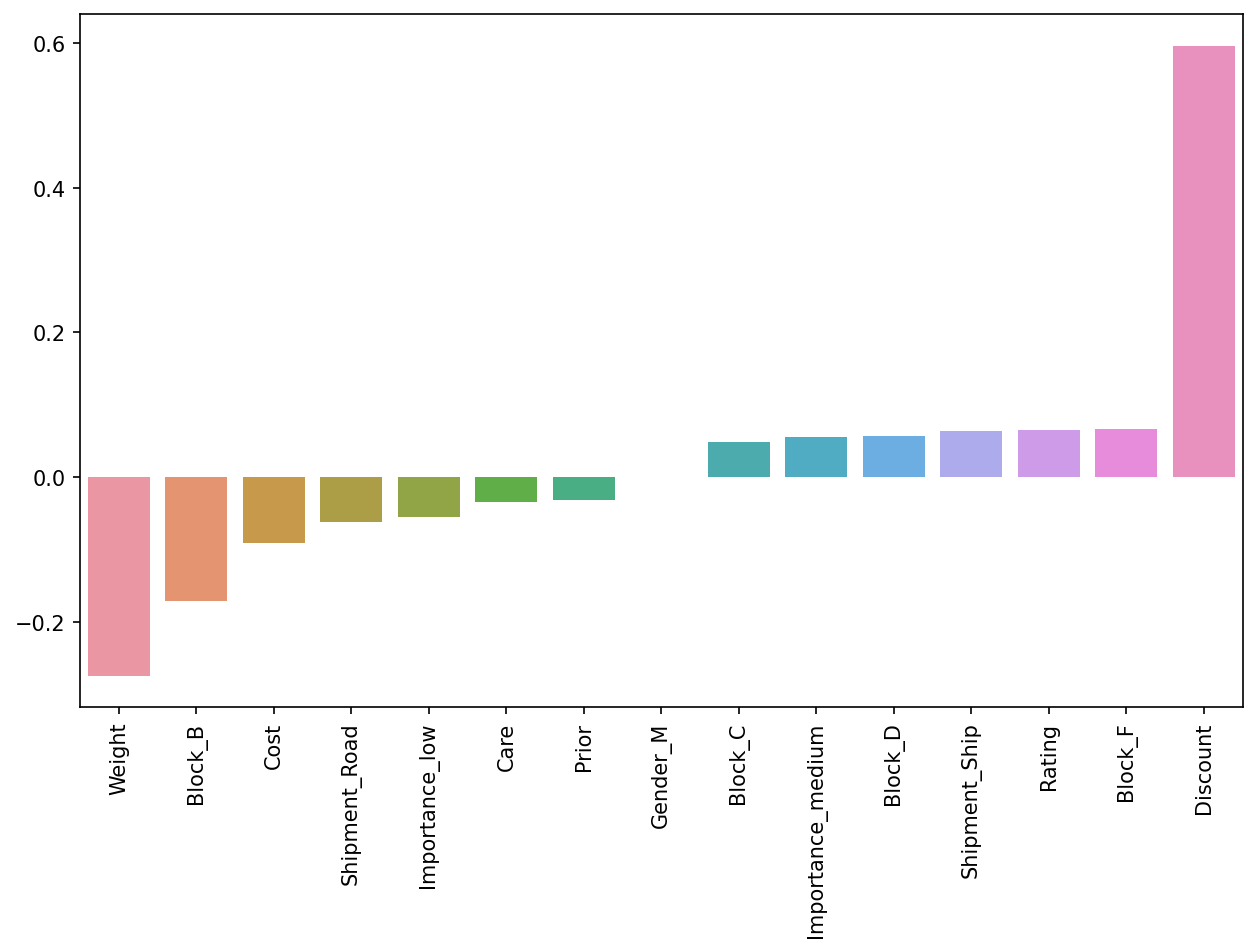

In [61]:
# Coefficient vizualisation with sorting
coefs = pd.Series(index = X.columns, data = model_2['lr'].coef_[0])
coefs = coefs.sort_values()
plt.figure(figsize=(10,6), dpi=150)
sns.barplot(x=coefs.index, y=coefs.values)
plt.xticks(rotation = 90)
plt.show()

*   We can expect the odds of delayed order to decrease (the original coeff was negative) per unit increase of Weihgt.
*   We can expect the odds of delayed order to increase (the original coeff was positive) per unit increase of Discount.
*   The Discount indicator is the strongest predictor.

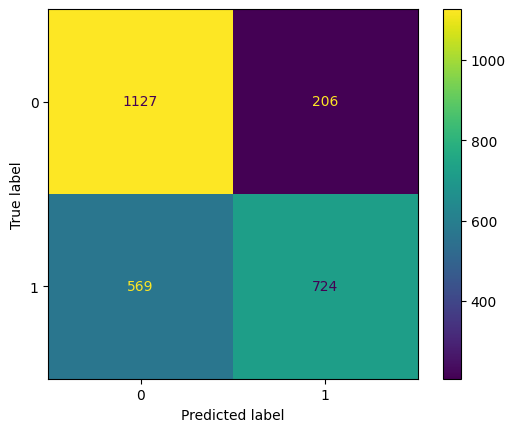

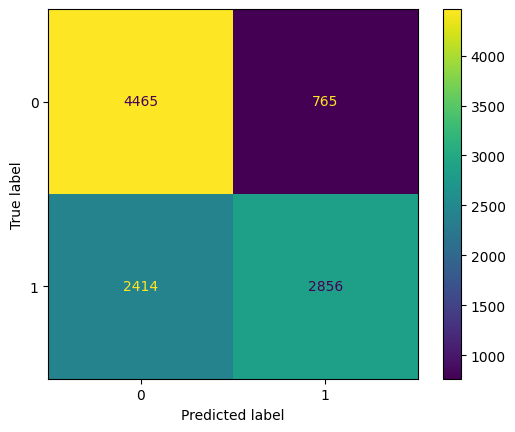

In [62]:
# Model performance evaluation for test and train set
y_pred = model_2.predict(X_test)
y_pred_tr = model_2.predict(X_train)
# Confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(model_2, X_test, y_test)
# Confusion matrix for train set
ConfusionMatrixDisplay.from_estimator(model_2, X_train, y_train)

In [63]:
# Classification report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.85      0.74      1333
           1       0.78      0.56      0.65      1293

    accuracy                           0.70      2626
   macro avg       0.72      0.70      0.70      2626
weighted avg       0.72      0.70      0.70      2626



In [64]:
# Classification report for train set
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       0.65      0.85      0.74      5230
           1       0.79      0.54      0.64      5270

    accuracy                           0.70     10500
   macro avg       0.72      0.70      0.69     10500
weighted avg       0.72      0.70      0.69     10500



*   The overall accuracy for test set is 0.70, for delayed orders (class 1) it achieved worse result 0.57 whereas for on-time orders (class 0) - 0.83.
*   Precision, recall and f1-score for test set for class 0 are: 0.66, 0.85, 0.74 and for class 1: 0.78, 0.56, 0.65.
*   The overall accuracy for train set is 0.70, for delayed orders (class 1) it achieved worse result 0.55 whereas for on-time orders (class 0) - 0.84.
*   Precision, recall and f1-score for train set for class 0 are: 0.65, 0.85, 0.74 and for class 1: 0.79, 0.54, 0.64.
*   For test set 0.56 relevant cases were found and for train set - 0.54 (recall for class 1).
*   For class 1, the prediction was correct in 78% for test cases and in 79% for train cases (precision for class 1).
*   Based on above, train and test sets achieved similar results.

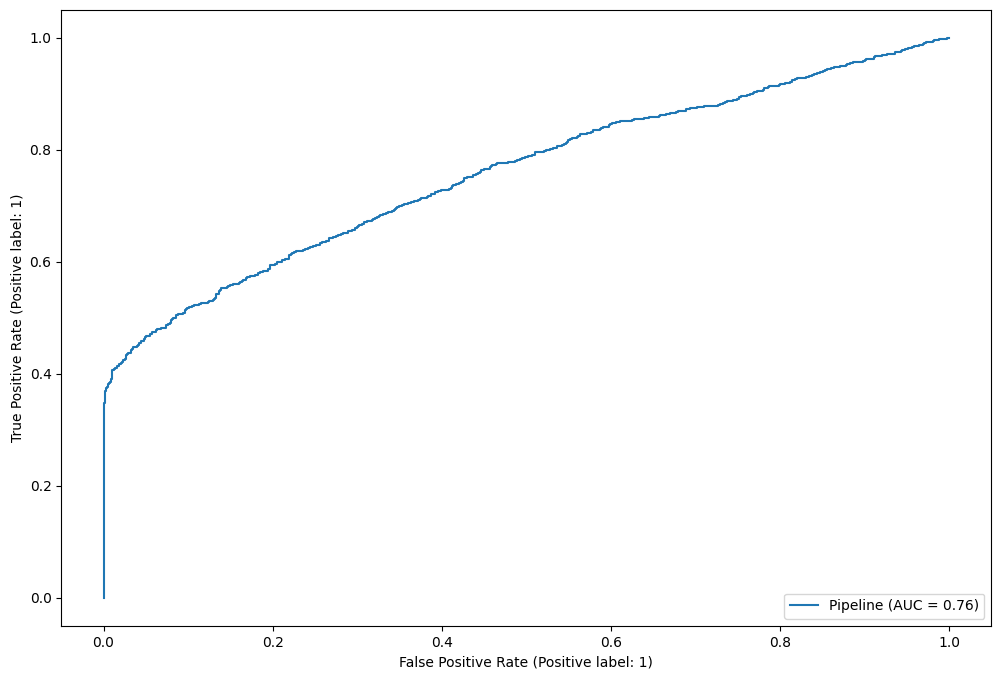

In [65]:
# ROC curve
fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_2, X_test, y_test, ax = ax)
plt.show()

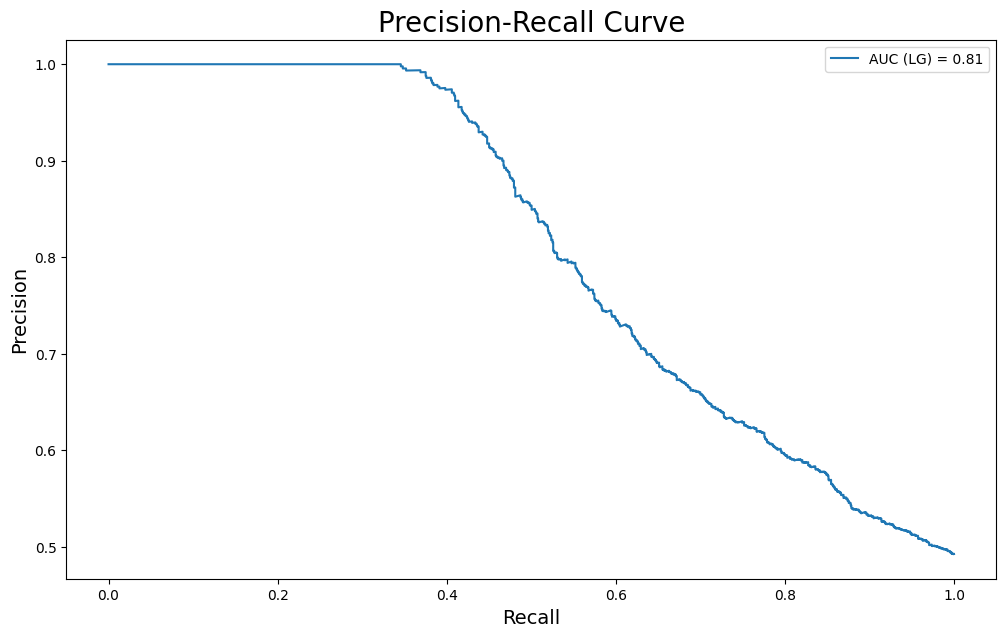

In [66]:
# Precision-Recall curve
y_scores = model_2.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
auc_1 = metrics.auc(recall, precision)
plt.figure(figsize=(12, 7))
plt.plot(recall, precision,  label=f'AUC (LG) = {auc_1:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend()

*   The clasifier for class 1 (delayed orders) has AUC = 0.81 which means that it achieved good predictive performance across all the thresholds. The higher the value of AUC, the better is the classifier.
*   At threshold with the low recall, the precision is correspondingly high.
*   At very high recall, the precision begins to drop.

In [67]:
# Save model results for future prediction
results.loc[len(results.index)] = ['LR CV', precision_score(y_train, y_pred_tr), recall_score(y_train, y_pred_tr), accuracy_score(y_train, y_pred_tr), f1_score(y_train, y_pred_tr),
                                   precision_score(y_test, y_pred), recall_score(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), auc_1]

# **KNN**

## Simple KNN with one neighbour

In [68]:
# Model definition
model_3 = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('knn', KNeighborsClassifier(n_neighbors=1))
    ]
)

In [69]:
# Model fitting
model_3.fit(X_train, y_train)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

In [70]:
# Model parameters
model_3.get_params()

{'memory': None,
 'steps': [('cat_num_pipeline',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('ohe',
                                                     OneHotEncoder(sparse=False))]),
                                    Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'cat_num_pipeline': ColumnTransformer(transformers=[('numerical',
                                  Pipeline(steps=[('scaler', StandardScaler())]),
                                  Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                 ('categorical',
          

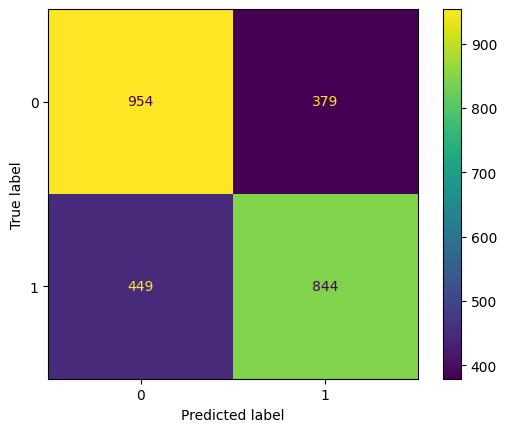

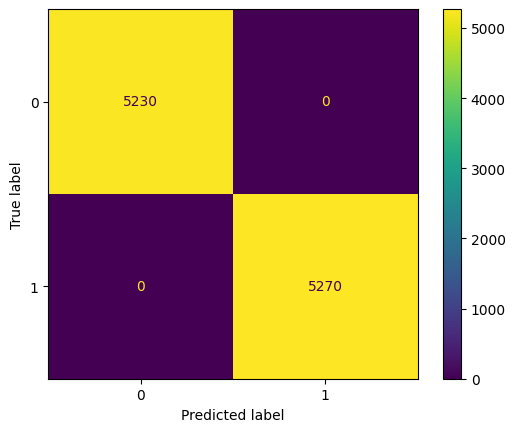

In [71]:
# Model performance evaluation for test and train set
y_pred = model_3.predict(X_test)
y_pred_tr = model_3.predict(X_train)
# Confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(model_3, X_test, y_test)
# Confusion matrix for train set
ConfusionMatrixDisplay.from_estimator(model_3, X_train, y_train)

In [72]:
# Classification report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1333
           1       0.69      0.65      0.67      1293

    accuracy                           0.68      2626
   macro avg       0.69      0.68      0.68      2626
weighted avg       0.68      0.68      0.68      2626



In [73]:
# Classification report for train set
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5230
           1       1.00      1.00      1.00      5270

    accuracy                           1.00     10500
   macro avg       1.00      1.00      1.00     10500
weighted avg       1.00      1.00      1.00     10500



*   The overall accuracy for test set is 0.68, for delayed orders (class 1) it achieved worse result 0.63 whereas for on-time orders (class 0) - 0.71.
*   Precision, recall and f1-score for test set for class 0 are: 0.68, 0.72, 0.70 and for class 1: 0.69, 0.65, 0.67.
*   The overall accuracy for train set is 1 (all examples are classified correctly).
*   For test set 0.65 relevant cases were found and for train set - all (recall for class 1).
*   For class 1, the prediction was correct in 69% for test cases and in 100% for train cases (precision for class 1).
*   Based on above, train set achieved better results than test set - the model is overfitted.

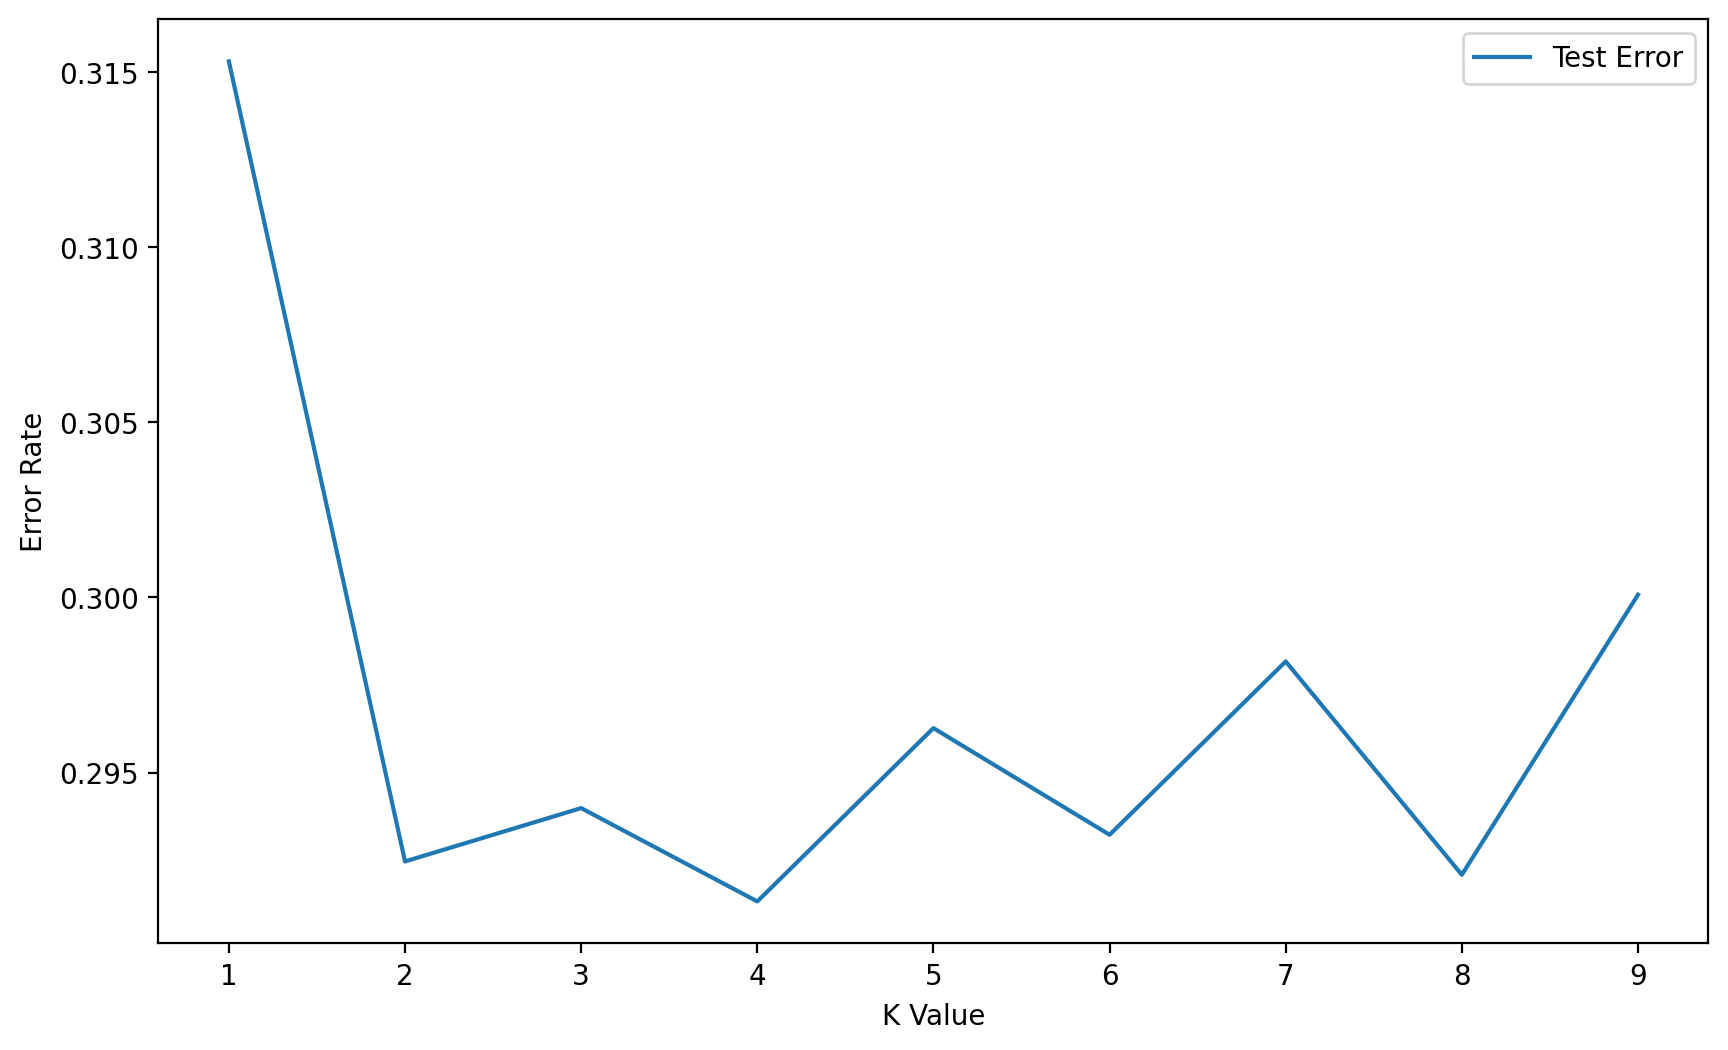

In [74]:
# Select optimal K value (elbow method)
test_error_rates = []

for k in range(1, 10):
    knn_model = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ]
)
    knn_model.fit(X_train, y_train)

    y_pred_test = knn_model.predict(X_test)

    test_error = 1 - accuracy_score(y_test, y_pred_test)
    test_error_rates.append(test_error)

plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,10),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel('K Value')
plt.show()

*   From above plot, we can assume that the optimal number of neighbours is 8. The larger K, the larger error rate is.

In [75]:
# Model definition
model_3_mod = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('knn', KNeighborsClassifier(n_neighbors=8))
    ]
)

In [76]:
# Model fitting
model_3_mod.fit(X_train, y_train)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
                ('knn', KNeighborsClassifier(n_neighbors=8))])

In [77]:
# Model parameters
model_3_mod.get_params()

{'memory': None,
 'steps': [('cat_num_pipeline',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('ohe',
                                                     OneHotEncoder(sparse=False))]),
                                    Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
  ('knn', KNeighborsClassifier(n_neighbors=8))],
 'verbose': False,
 'cat_num_pipeline': ColumnTransformer(transformers=[('numerical',
                                  Pipeline(steps=[('scaler', StandardScaler())]),
                                  Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                 ('categorical',
          

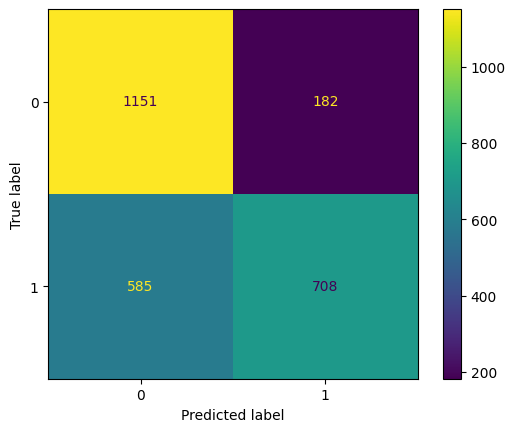

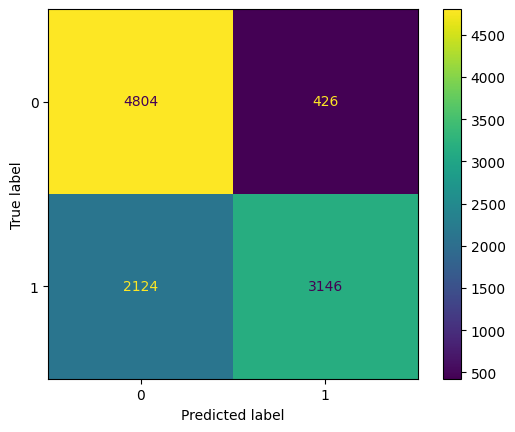

In [78]:
# Model performance evaluation for test and train set
y_pred = model_3_mod.predict(X_test)
y_pred_tr = model_3_mod.predict(X_train)
# Confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(model_3_mod, X_test, y_test)
# Confusion matrix for train set
ConfusionMatrixDisplay.from_estimator(model_3_mod, X_train, y_train)

In [79]:
# Classification report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.86      0.75      1333
           1       0.80      0.55      0.65      1293

    accuracy                           0.71      2626
   macro avg       0.73      0.71      0.70      2626
weighted avg       0.73      0.71      0.70      2626



In [80]:
# Classification report for train set
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79      5230
           1       0.88      0.60      0.71      5270

    accuracy                           0.76     10500
   macro avg       0.79      0.76      0.75     10500
weighted avg       0.79      0.76      0.75     10500




*   The overall accuracy for test set is 0.71, for delayed orders (class 1) it achieved worse result 0.53 whereas for on-time orders (class 0) - 0.88.
*   Precision, recall and f1-score for test set for class 0 are: 0.66, 0.86, 0.75 and for class 1: 0.80, 0.55, 0.65.
*   The overall accuracy for train set is 0.76, for delayed orders (class 1) it achieved worse result 0.59 whereas for on-time orders (class 0) - 0.92.
*   Precision, recall and f1-score for train set for class 0 are: 0.69, 0.92, 0.79 and for class 1: 0.88, 0.60, 0.71.
*   For test set 0.55 relevant cases were found and for train set - 0.60 (recall for class 1).
*   For class 1, the prediction was correct in 80% for test cases and in 88% for train cases (precision for class 1).
*   Based on above, model is slightly overfitted.

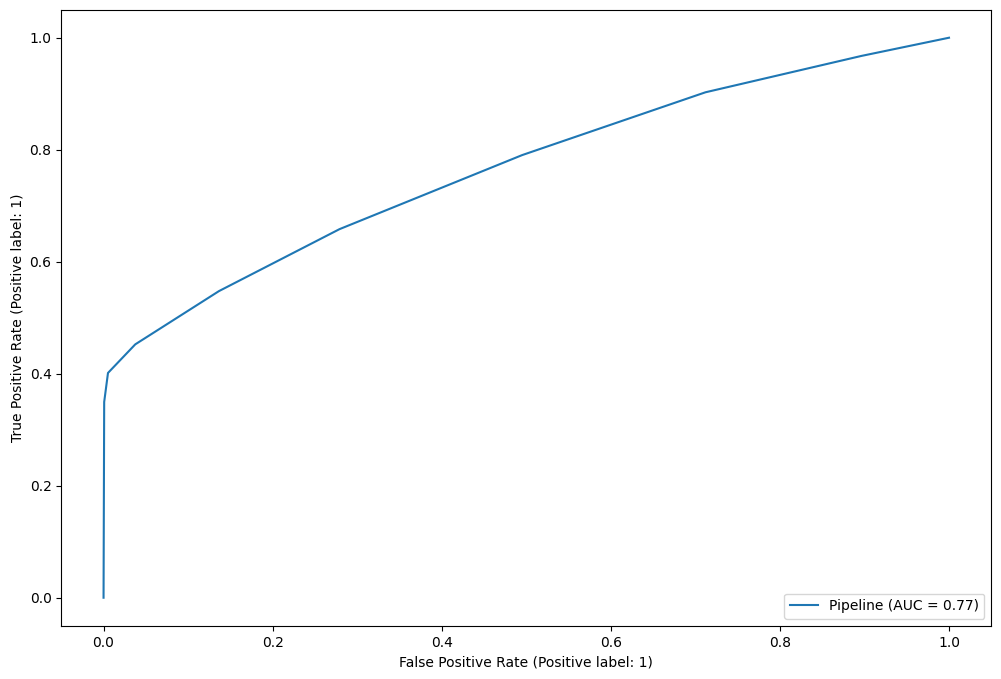

In [81]:
# ROC curve
fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_3_mod, X_test, y_test, ax = ax)
plt.show()

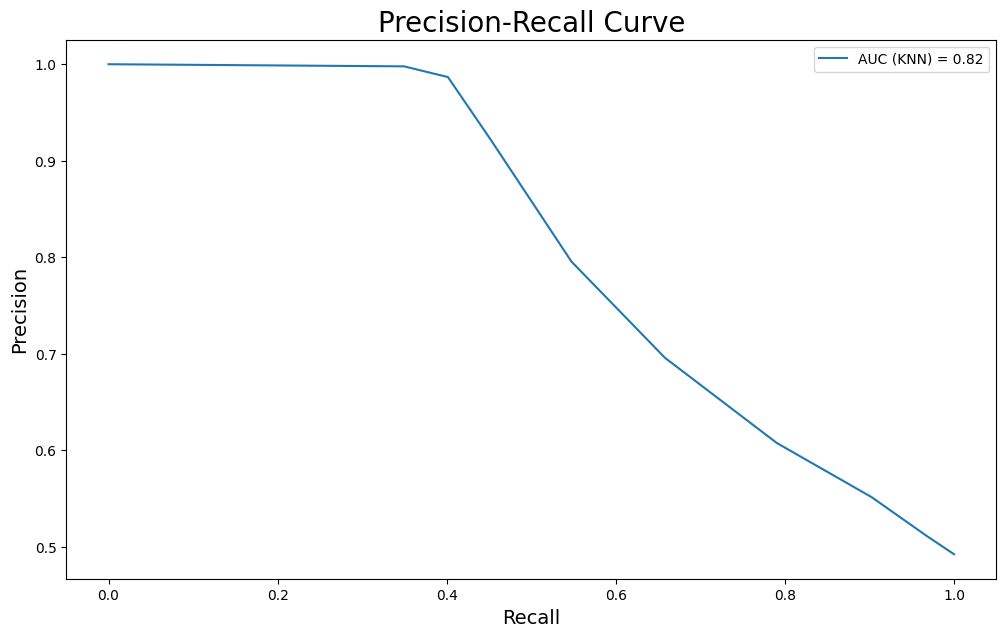

In [82]:
# Precision-Recall curve
y_scores = model_3_mod.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
auc_1 = metrics.auc(recall, precision)
plt.figure(figsize=(12, 7))
plt.plot(recall, precision,  label=f'AUC (KNN) = {auc_1:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend()


*   The clasifier for class 1 (delayed orders) has AUC = 0.82 which means that it achieved good predictive performance across all the thresholds. The higher the value of AUC, the better is the classifier.
*   At threshold with the low recall, the precision is correspondingly high.
*   At very high recall, the precision begins to drop.

In [83]:
# Save model results for future prediction
results.loc[len(results.index)] = ['Simple KNN with eight neighbors', precision_score(y_train, y_pred_tr), recall_score(y_train, y_pred_tr), accuracy_score(y_train, y_pred_tr), f1_score(y_train, y_pred_tr),
                                   precision_score(y_test, y_pred), recall_score(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), auc_1]

## KNN with GridSearchCV

In [84]:
# Model definition
knn_param_grid = [
    {
        "knn__n_neighbors": list(range(1,20))
    }
]
knn_model = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('knn', KNeighborsClassifier())
    ]
)

In [85]:
# Model fitting
grid_model_knn = GridSearchCV(knn_model, param_grid = knn_param_grid, cv=5, scoring='accuracy')
grid_model_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cat_num_pipeline',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(sparse=False))]),
                                                                         Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19]}],
             scoring='accuracy')

In [86]:
# Best model parameters
knn_neigh = grid_model_knn.best_params_['knn__n_neighbors']
knn_neigh

18

In [87]:
# Model definition with 18 recommended neighbors
model_5 = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('knn', KNeighborsClassifier(n_neighbors = knn_neigh))
    ]
)

In [88]:
# Model fitting
model_5.fit(X_train,y_train)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
                ('knn', KNeighborsClassifier(n_neighbors=18))])

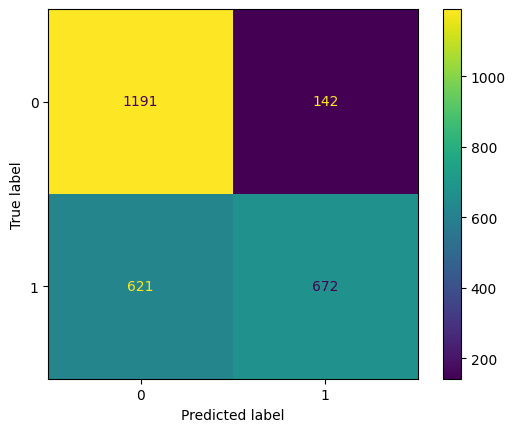

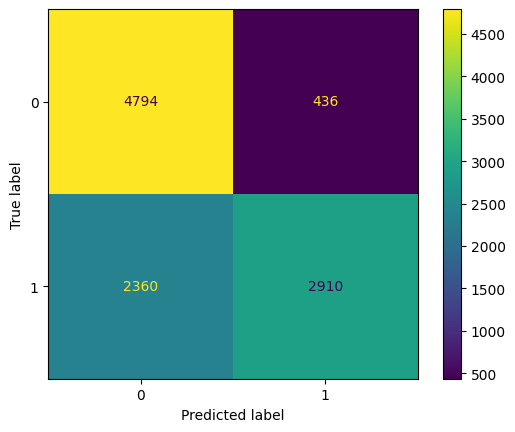

In [89]:
# Model performance evaluation for test and train set
y_pred = model_5.predict(X_test)
y_pred_tr = model_5.predict(X_train)
# Confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(model_5, X_test, y_test)
# Confusion matrix for train set
ConfusionMatrixDisplay.from_estimator(model_5, X_train, y_train)

In [90]:
# Classification report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.89      0.76      1333
           1       0.83      0.52      0.64      1293

    accuracy                           0.71      2626
   macro avg       0.74      0.71      0.70      2626
weighted avg       0.74      0.71      0.70      2626



In [91]:
# Classification report for train set
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       0.67      0.92      0.77      5230
           1       0.87      0.55      0.68      5270

    accuracy                           0.73     10500
   macro avg       0.77      0.73      0.72     10500
weighted avg       0.77      0.73      0.72     10500



*   The overall accuracy for test set is 0.71, for delayed orders (class 1) it achieved worse result 0.51 whereas for on-time orders (class 0) - 0.89.
*   Precision, recall and f1-score for test set for class 0 are: 0.66, 0.89, 0.76 and for class 1: 0.83, 0.52, 0.64.
*   The overall accuracy for train set is 0.73, for delayed orders (class 1) it achieved worse result 0.55 whereas for on-time orders (class 0) - 0.92.
*   Precision, recall and f1-score for train set for class 0 are: 0.67, 0.92, 0.77 and for class 1: 0.87, 0.55, 0.68.
*   For test set 0.52 relevant cases were found and for train set - 0.55 (recall for class 1).
*   For class 1, the prediction was correct in 83% for test cases and in 87% for train cases (precision for class 1).
*   Based on above, the model is slightly overfitted.

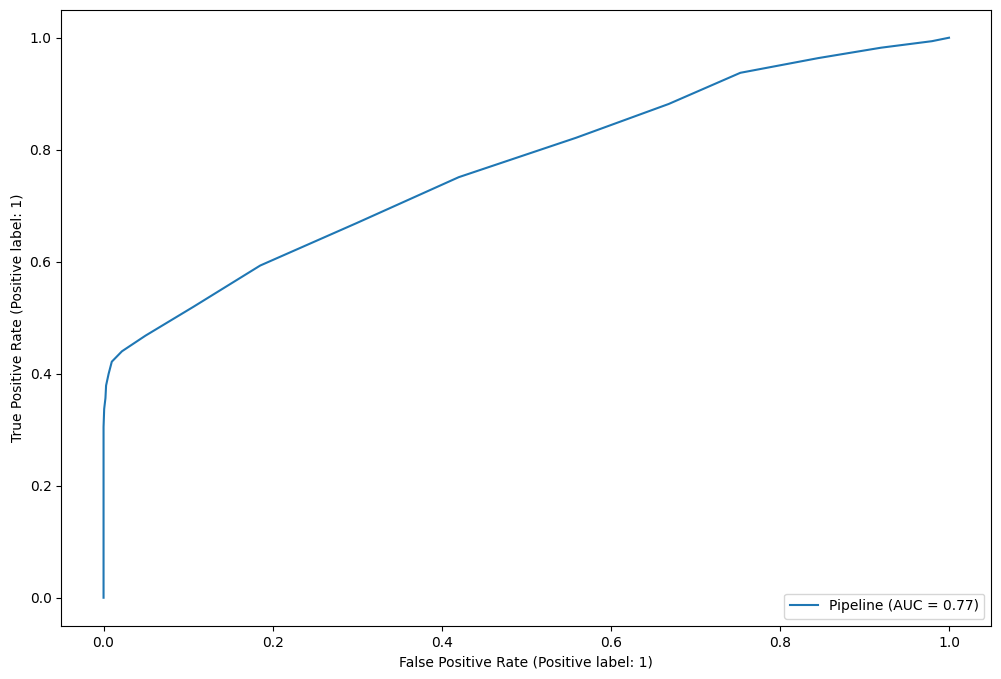

In [92]:
# ROC curve
fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_5, X_test, y_test, ax = ax)
plt.show()

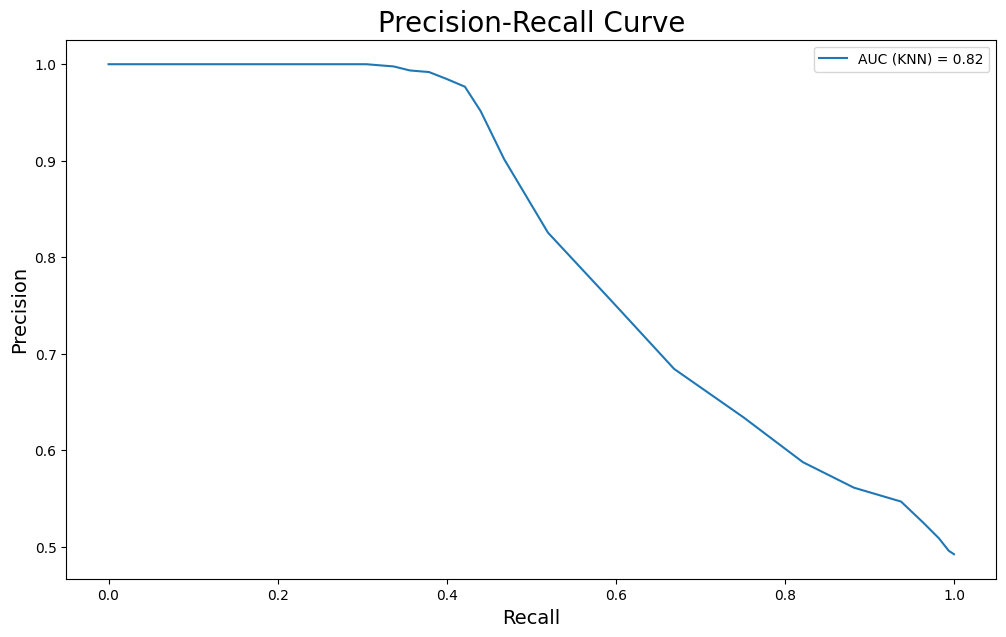

In [93]:
# Precision-Recall curve
y_scores = model_5.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
auc_1 = metrics.auc(recall, precision)
plt.figure(figsize=(12, 7))
plt.plot(recall, precision,  label=f'AUC (KNN) = {auc_1:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend()

*   The clasifier for class 1 (delayed orders) has AUC = 0.82 which means that it achieved good predictive performance across all the thresholds. The higher the value of AUC, the better is the classifier.
*   At threshold with the low recall, the precision is correspondingly high.
*   At very high recall, the precision begins to drop.

In [94]:
# Save model results for future prediction
results.loc[len(results.index)] = ['KNN with GridSearchCV', precision_score(y_train, y_pred_tr), recall_score(y_train, y_pred_tr), accuracy_score(y_train, y_pred_tr), f1_score(y_train, y_pred_tr),
                                   precision_score(y_test, y_pred), recall_score(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), auc_1]

# **SVM**

## SVC with default parameters

In [95]:
# Model definition
model_6 = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('svc', SVC(probability = True))
    ]
)

In [96]:
# Model fitting
model_6.fit(X_train, y_train)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
                ('svc', SVC(probability=True))])

In [97]:
# Model parameters
model_6.get_params()

{'memory': None,
 'steps': [('cat_num_pipeline',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('ohe',
                                                     OneHotEncoder(sparse=False))]),
                                    Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
  ('svc', SVC(probability=True))],
 'verbose': False,
 'cat_num_pipeline': ColumnTransformer(transformers=[('numerical',
                                  Pipeline(steps=[('scaler', StandardScaler())]),
                                  Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                 ('categorical',
                        

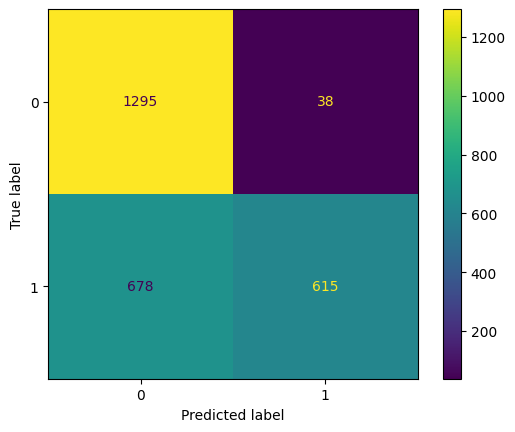

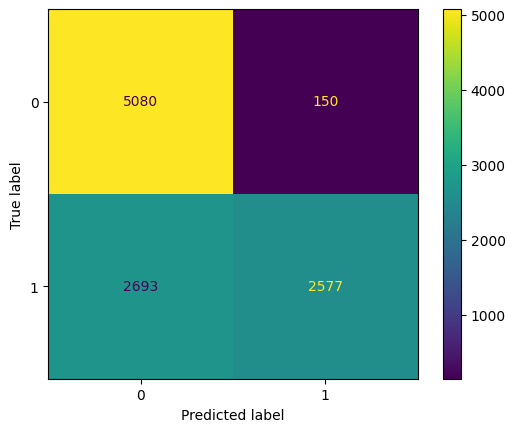

In [98]:
# Model performance evaluation for test and train set
y_pred = model_6.predict(X_test)
y_pred_tr = model_6.predict(X_train)
# Confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(model_6, X_test, y_test)
# Confusion matrix for train set
ConfusionMatrixDisplay.from_estimator(model_6, X_train, y_train)

In [99]:
# Classification report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.97      0.78      1333
           1       0.94      0.48      0.63      1293

    accuracy                           0.73      2626
   macro avg       0.80      0.72      0.71      2626
weighted avg       0.80      0.73      0.71      2626



In [100]:
# Classification report for train set
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       0.65      0.97      0.78      5230
           1       0.94      0.49      0.64      5270

    accuracy                           0.73     10500
   macro avg       0.80      0.73      0.71     10500
weighted avg       0.80      0.73      0.71     10500



*   The overall accuracy for test set is 0.73, for delayed orders (class 1) it achieved worse result 0.47 whereas for on-time orders (class 0) - 0.96.
*   Precision, recall and f1-score for test set for class 0 are: 0.66, 0.97, 0.78 and for class 1: 0.94, 0.48, 0.63.
*   The overall accuracy for train set is 0.73, for delayed orders (class 1) it achieved worse result 0.48 whereas for on-time orders (class 0) - 0.97.
*   Precision, recall and f1-score for train set for class 0 are: 0.65, 0.97, 0.78 and for class 1: 0.94, 0.49, 0.64.
*   For test set 0.48 relevant cases were found and for train set - 0.49 (recall for class 1).
*   For class 1, the prediction was correct in 94% for test cases and in 94% for train cases (precision for class 1).
*   Based on above, the model achieved similar results for train and test set.

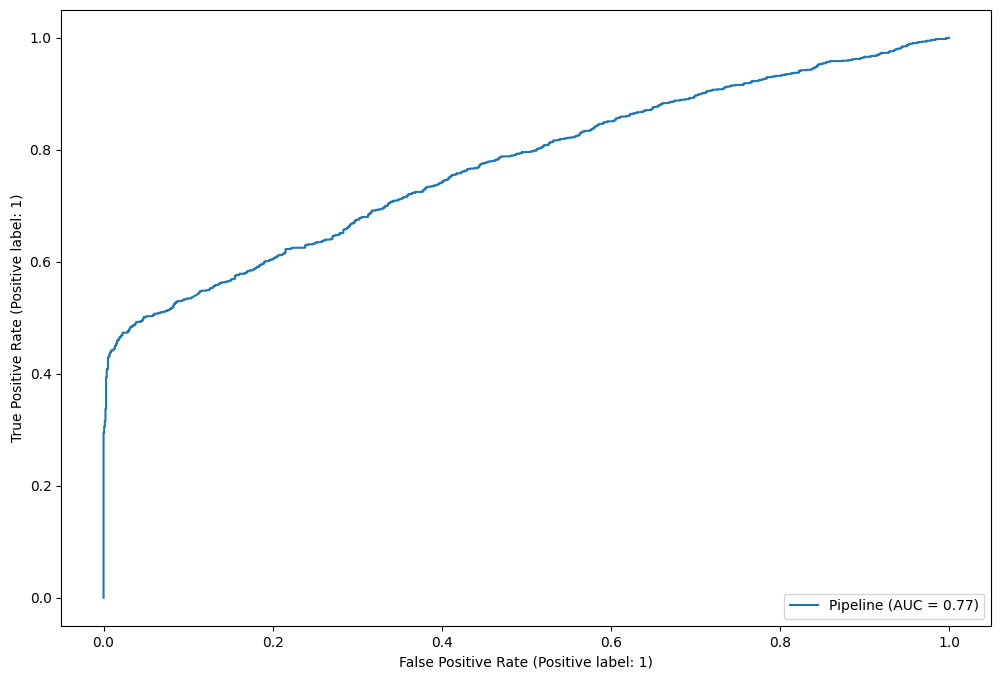

In [101]:
# ROC curve
fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_6, X_test, y_test, ax = ax)
plt.show()

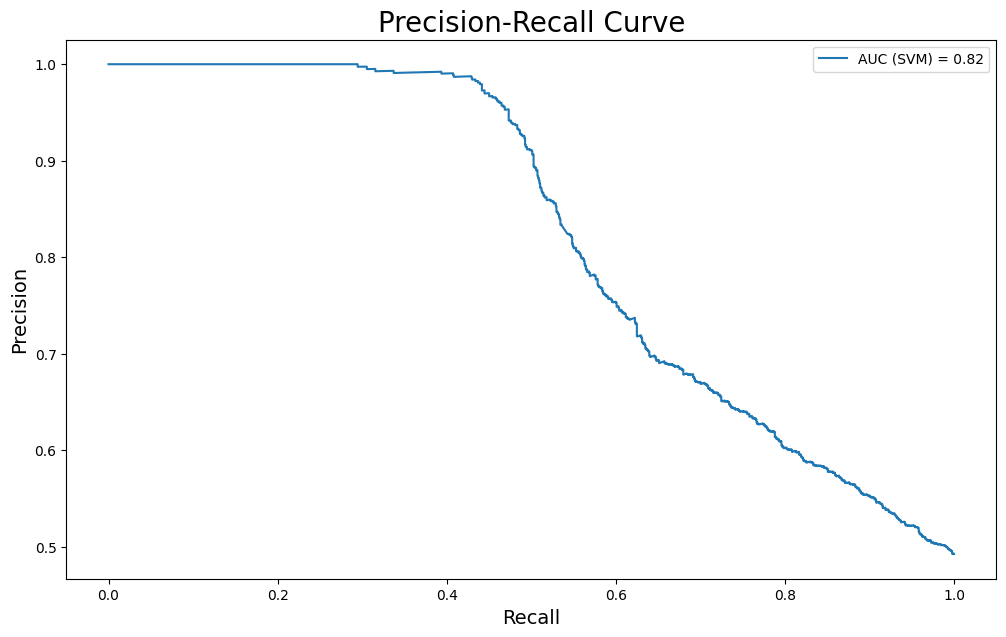

In [102]:
# Precision-Recall curve
y_scores = model_6.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
auc_1 = metrics.auc(recall, precision)
plt.figure(figsize=(12, 7))
plt.plot(recall, precision,  label=f'AUC (SVM) = {auc_1:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend()

*   The clasifier for class 1 (delayed orders) has AUC = 0.82 which means that it achieved good predictive performance across all the thresholds. The higher the value of AUC, the better is the classifier.
*   At threshold with the low recall, the precision is correspondingly high.
*   At very high recall, the precision begins to drop.

In [103]:
# Save model results for future prediction
results.loc[len(results.index)] = ['SVC with default parameters', precision_score(y_train, y_pred_tr), recall_score(y_train, y_pred_tr), accuracy_score(y_train, y_pred_tr), f1_score(y_train, y_pred_tr),
                                   precision_score(y_test, y_pred), recall_score(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), auc_1]

## SVC with GridSearchCV

In [105]:
# Model definition
svc_param_grid = {
    "svc__kernel": ['linear'],
    "svc__gamma": ['scale', 'auto']
}

svc_model = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('svc', SVC(probability = True))
    ]
)

In [106]:
# Model fitting
grid_model_svc = GridSearchCV(svc_model, param_grid = svc_param_grid, cv=5, scoring='accuracy')
grid_model_svc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cat_num_pipeline',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(sparse=False))]),
                                                                         Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear']},
             scoring='accuracy')

In [107]:
# Best model parameters
svc_kernel = grid_model_svc.best_params_['svc__kernel']
svc_gamma = grid_model_svc.best_params_['svc__gamma']

In [108]:
# Best model details
model_7 = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('svc', SVC(probability = True, kernel = svc_kernel, gamma = svc_gamma))
    ]
)

In [109]:
# Best model fitting
model_7.fit(X_train, y_train)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
                ('svc', SVC(kernel='linear', probability=True))])

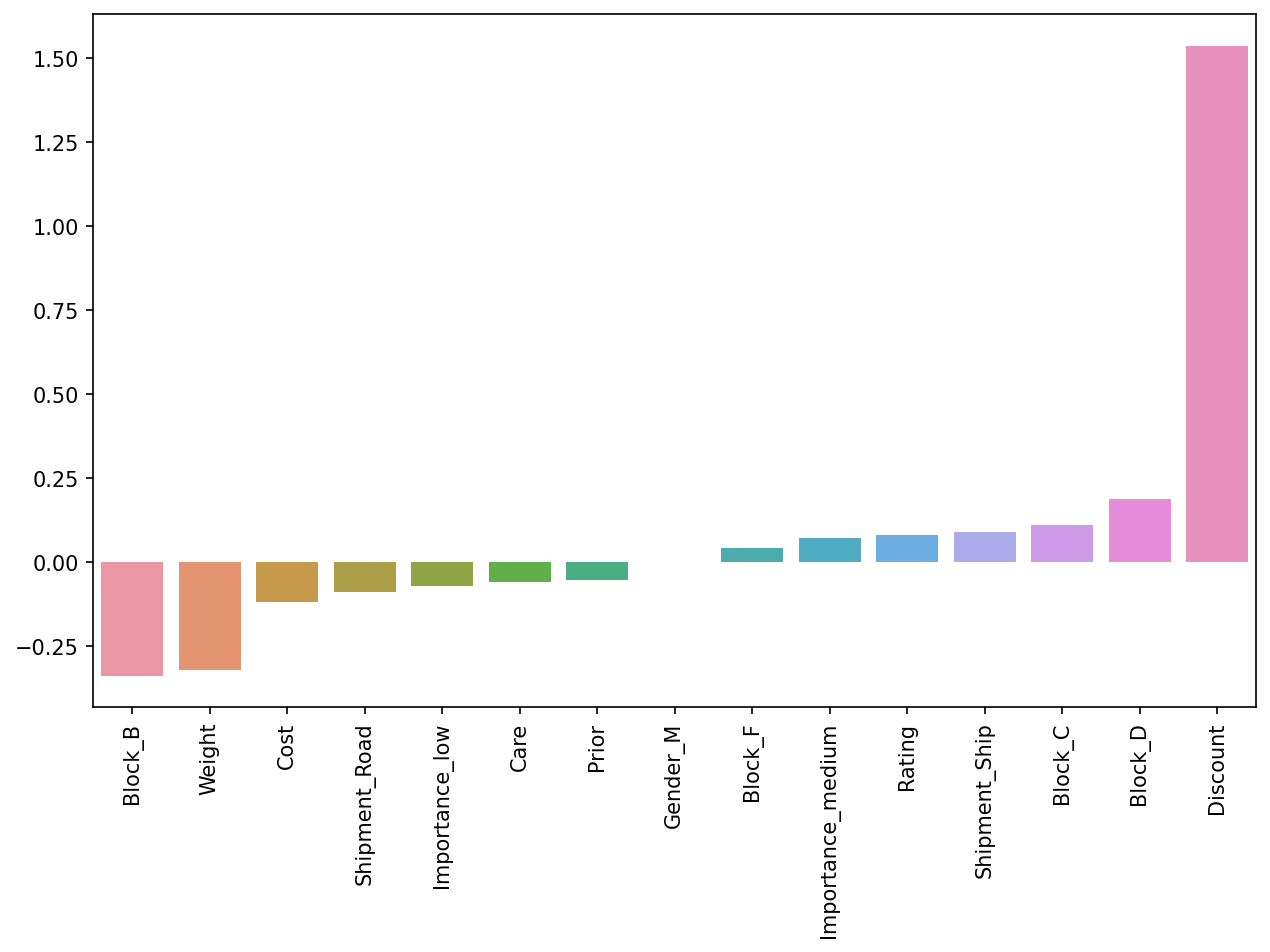

In [110]:
# Coefficient vizualisation with sorting
coefs = pd.Series(index = X.columns, data = model_7['svc'].coef_[0])
coefs = coefs.sort_values()
plt.figure(figsize=(10,6), dpi=150)
sns.barplot(x=coefs.index, y=coefs.values)
plt.xticks(rotation = 90)
plt.show()

*   We can expect the odds of delayed order to decrease (the original coeff was negative) per unit increase of Block_B.
*   We can expect the odds of delayed order to increase (the original coeff was positive) per unit increase of Discount.
*   The Discount indicator is the strongest predictor.

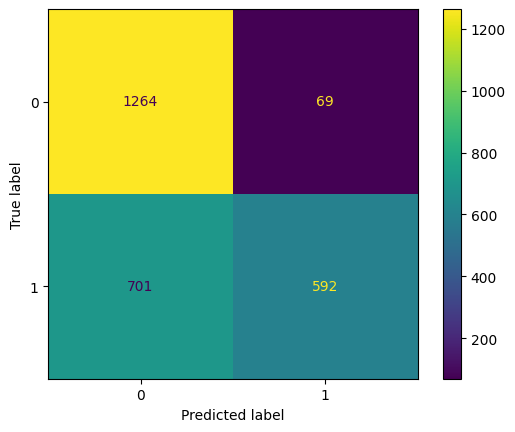

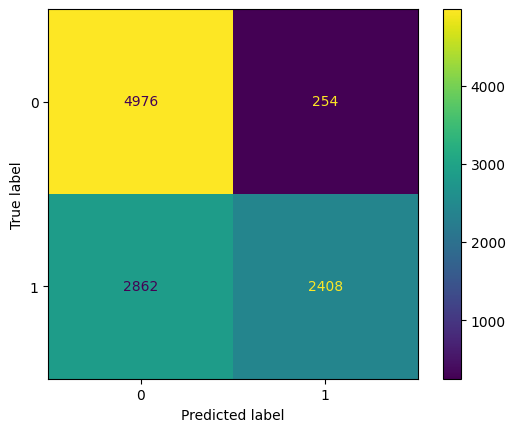

In [111]:
# Model performance evaluation for test and train set
y_pred = model_7.predict(X_test)
y_pred_tr = model_7.predict(X_train)
# Confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(model_7, X_test, y_test)
# Confusion matrix for train set
ConfusionMatrixDisplay.from_estimator(model_7, X_train, y_train)

In [112]:
# Classification report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.95      0.77      1333
           1       0.90      0.46      0.61      1293

    accuracy                           0.71      2626
   macro avg       0.77      0.70      0.69      2626
weighted avg       0.77      0.71      0.69      2626



In [113]:
# Classification report for train set
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       0.63      0.95      0.76      5230
           1       0.90      0.46      0.61      5270

    accuracy                           0.70     10500
   macro avg       0.77      0.70      0.68     10500
weighted avg       0.77      0.70      0.68     10500



*   The overall accuracy for test set is 0.71, for delayed orders (class 1) it achieved worse result 0.47 whereas for on-time orders (class 0) - 0.93.
*   Precision, recall and f1-score for test set for class 0 are 0.64, 0.95, 0.77 and for class 1: 0.90, 0.46, 0.61.
*   The overall accuracy for train set is 0.70, for delayed orders (class 1) it achieved worse result 0.47, whereas for on-time orders (class 0) - 0.94.
*   Precision, recall and f1-score for test set for class 0 are 0.63, 0.95, 0.76 and for class 1: 0.90, 0.46, 0.61.
*   For test set 0.46 relevant cases were found and for train set - 0.46 (recall for class 1).
*   For class 1, the prediction was correct in 90% for test cases and in 90% for train cases (precision for class 1).
*   Both sets achieved similar results.

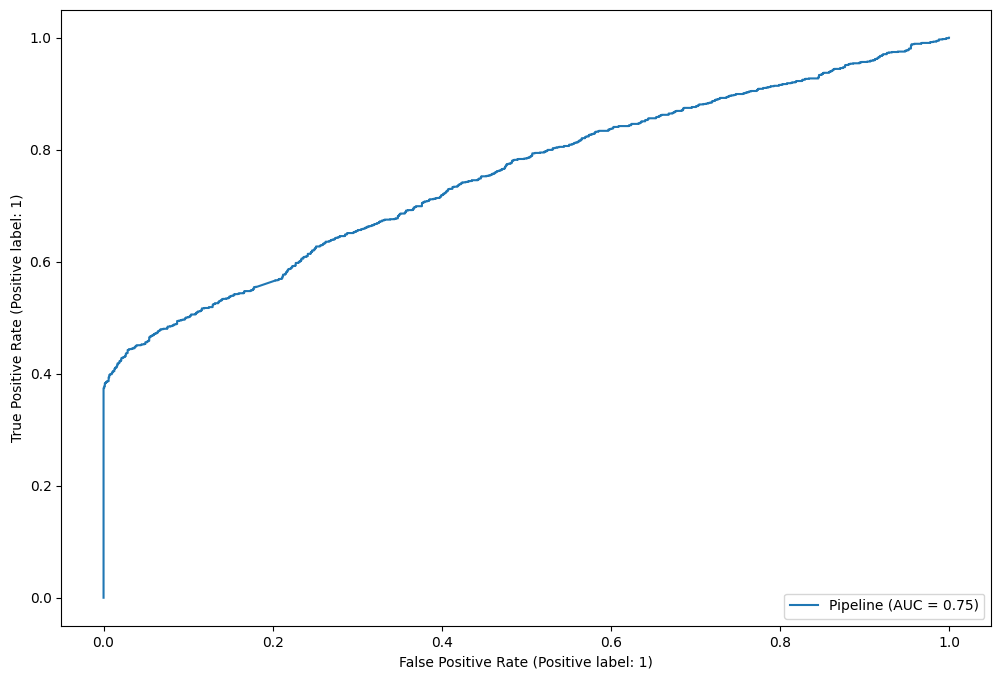

In [114]:
# ROC curve
fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_7, X_test, y_test, ax = ax)
plt.show()

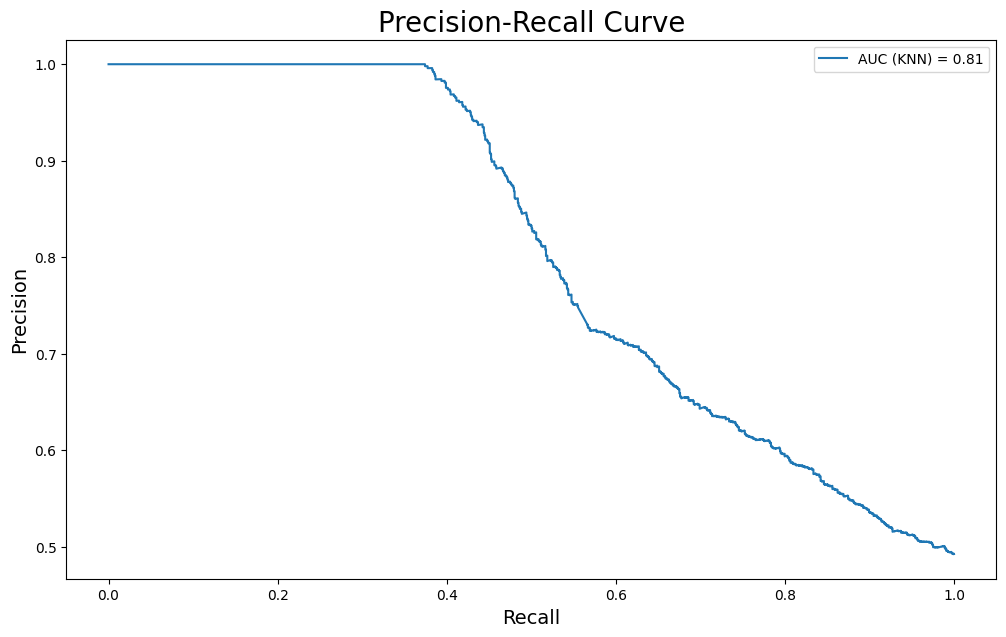

In [115]:
# Precision-Recall curve
y_scores = model_7.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
auc_1 = metrics.auc(recall, precision)
plt.figure(figsize=(12, 7))
plt.plot(recall, precision,  label=f'AUC (KNN) = {auc_1:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend()


*   The clasifier for class 1 (delayed orders) has AUC = 0.81 which means that it achieved good predictive performance across all the thresholds. The higher the value of AUC, the better is the classifier.
*   At threshold with the low recall, the precision is correspondingly high.
*   At very high recall, the precision begins to drop.

In [116]:
# Save model results for future prediction
results.loc[len(results.index)] = ['SVC with GridSearchCV', precision_score(y_train, y_pred_tr), recall_score(y_train, y_pred_tr), accuracy_score(y_train, y_pred_tr), f1_score(y_train, y_pred_tr),
                                   precision_score(y_test, y_pred), recall_score(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), auc_1]

# **Tree**

## Simple Tree with default parameters

In [117]:
# Model definition
model_8 = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('tree', DecisionTreeClassifier())
    ]
)

In [118]:
# Model fitting
model_8.fit(X_train, y_train)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
                ('tree', DecisionTreeClassifier())])

In [119]:
 # Model parameters
 model_8.get_params()

{'memory': None,
 'steps': [('cat_num_pipeline',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('ohe',
                                                     OneHotEncoder(sparse=False))]),
                                    Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
  ('tree', DecisionTreeClassifier())],
 'verbose': False,
 'cat_num_pipeline': ColumnTransformer(transformers=[('numerical',
                                  Pipeline(steps=[('scaler', StandardScaler())]),
                                  Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                 ('categorical',
                    

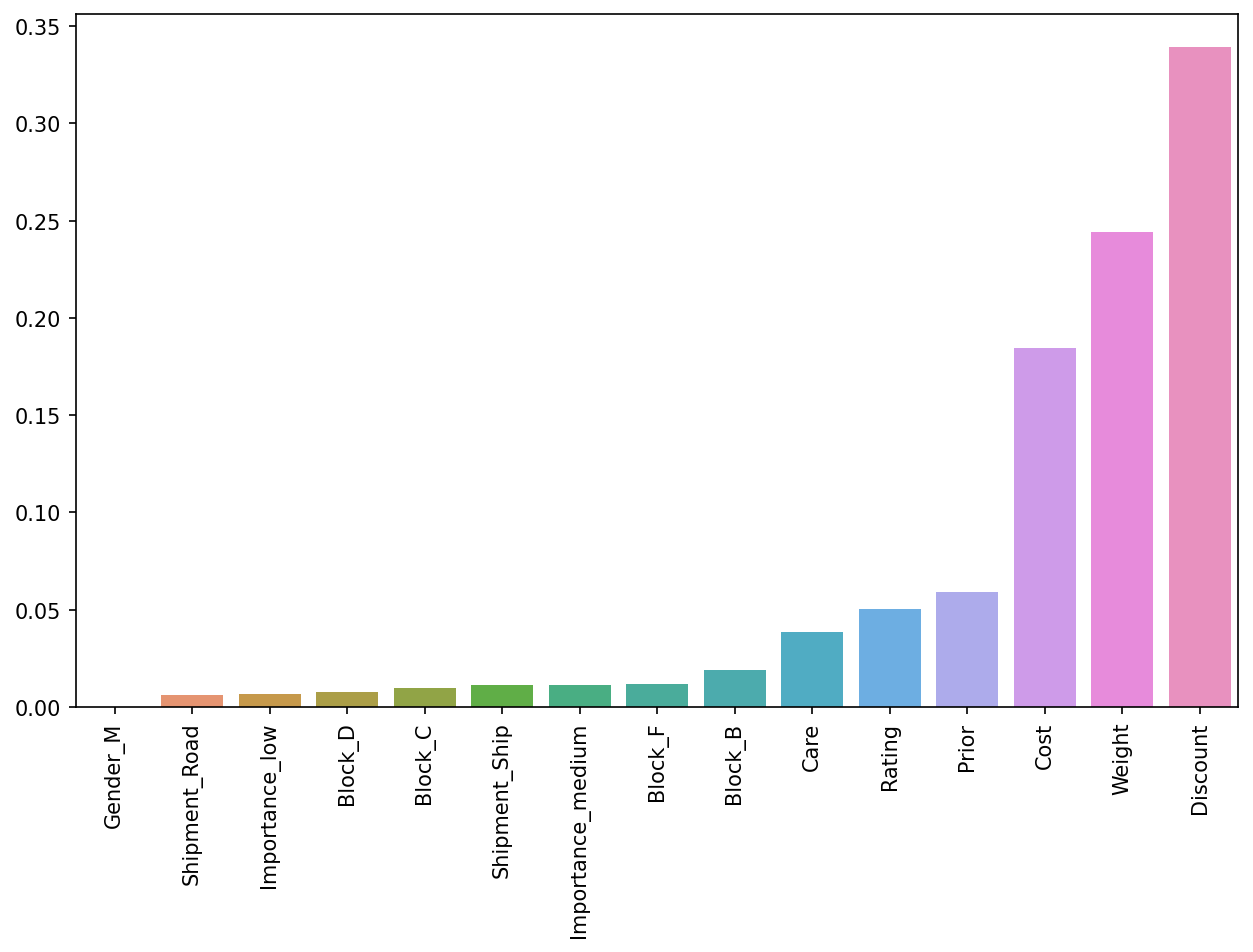

In [120]:
# Coefficient vizualisation with sorting
coefs = pd.Series(index = X.columns, data = model_8['tree'].feature_importances_)
coefs = coefs.sort_values()
plt.figure(figsize=(10,6), dpi=150)
sns.barplot(x=coefs.index, y=coefs.values)
plt.xticks(rotation = 90)
plt.show()


*   We can expect the odds of delayed order to increase (the original coeff was positive) per unit increase of Discount.
*   We can expect the odds of delayed order to increase (the original coeff was positive) per unit increase of Weight.
*   We can expect the odds of delayed order to increase (the original coeff was
positive) per unit increase of Cost.
*   The Discount indicator is the strongest predictor.

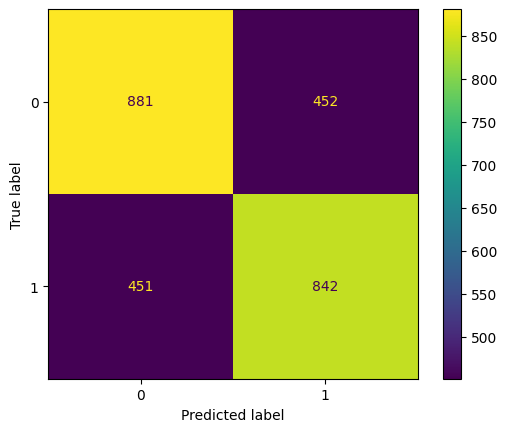

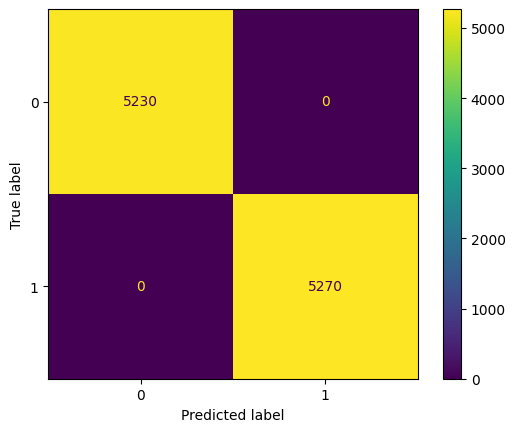

In [121]:
# Model performance evaluation for test and train set
y_pred = model_8.predict(X_test)
y_pred_tr = model_8.predict(X_train)
# Confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(model_8, X_test, y_test)
# Confusion matrix for train set
ConfusionMatrixDisplay.from_estimator(model_8, X_train, y_train)

In [122]:
# Classification report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66      1333
           1       0.65      0.65      0.65      1293

    accuracy                           0.66      2626
   macro avg       0.66      0.66      0.66      2626
weighted avg       0.66      0.66      0.66      2626



In [123]:
# Classification report for train set
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5230
           1       1.00      1.00      1.00      5270

    accuracy                           1.00     10500
   macro avg       1.00      1.00      1.00     10500
weighted avg       1.00      1.00      1.00     10500




*   The overall accuracy for test set is 0.66, for delayed orders (class 1) it achieved worse result 0.66 whereas for on-time orders (class 0) - 0.69.
*   Precision, recall and f1-score for test set for class 0 are: 0.66, 0.66, 0.66 and for class 1: 0.65, 0.65, 0.65.
*   The overall accuracy for train set is 1, each example was classified correctly.
*   For test set 0.65 relevant cases were found and for train set - all (recall for class 1).
*   For class 1, the prediction was correct in 65% for test cases and in 100% for train cases (precision for class 1).
*   Based on above, model is overfitted.

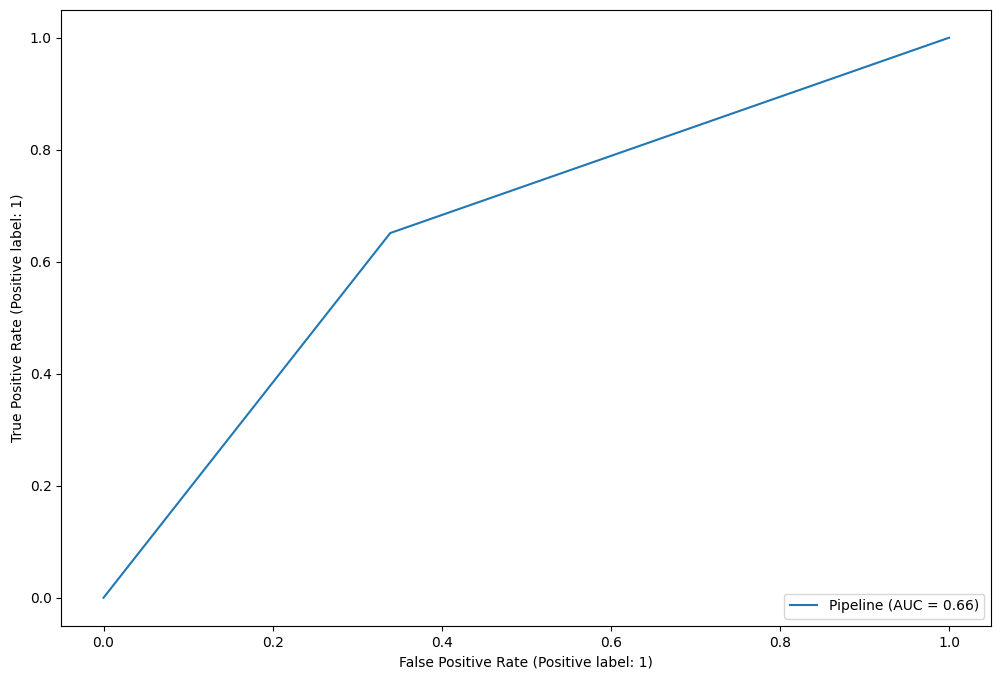

In [124]:
# ROC curve
fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_8, X_test, y_test, ax = ax)
plt.show()

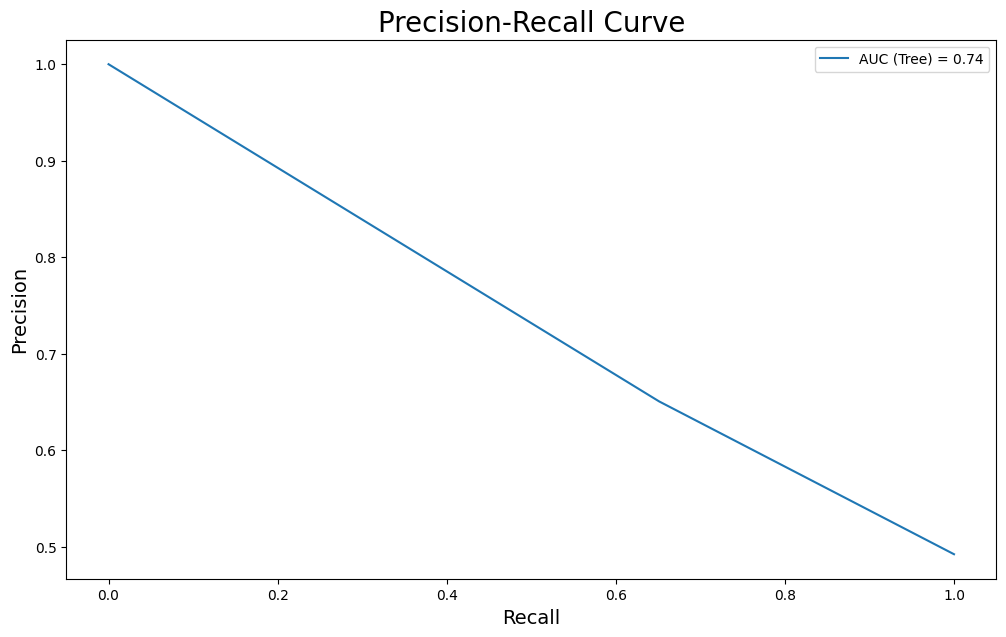

In [125]:
# Precision-Recall curve
y_scores = model_8.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
auc_1 = metrics.auc(recall, precision)
plt.figure(figsize=(12, 7))
plt.plot(recall, precision,  label=f'AUC (Tree) = {auc_1:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend()


*   The clasifier for class 1 (delayed orders) has AUC = 0.74 which means that it achieved good predictive performance across all the thresholds. The higher the value of AUC, the better is the classifier.
*   At threshold with the low recall, the precision is correspondingly high.
*   At very high recall, the precision begins to drop.

In [126]:
# Save model results for future prediction
results.loc[len(results.index)] = ['Simple Tree with default parameters', precision_score(y_train, y_pred_tr), recall_score(y_train, y_pred_tr), accuracy_score(y_train, y_pred_tr), f1_score(y_train, y_pred_tr),
                                   precision_score(y_test, y_pred), recall_score(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), auc_1]

## Tree with GridSearchCV

In [127]:
# Model definition
tree_param_grid = [{"model__criterion": ['gini', 'entropy'],
              "model__max_depth": [2, 3, 4, 5],
              "model__max_leaf_nodes": [2, 3, 4, 5],
              "model__min_samples_leaf": range(1, 5)
              }]
tree_model = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('model', DecisionTreeClassifier(class_weight={0:5536/4436,1:1}))
    ]
)

In [128]:
# Model fitting
grid_model_9 = GridSearchCV(tree_model, param_grid = tree_param_grid, verbose=1, n_jobs=1, cv=5, scoring='accuracy')
grid_model_9.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cat_num_pipeline',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(sparse=False))]),
                                                                         Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
                                       ('model',
                                        DecisionTreeClassifier(class_weight={0: 1.2479711451758342,
                                                                             1: 1}))]),
             n_jobs=1,
             param_grid=[{'model__criterion': ['gini', 'entropy'],
                          'model__max_depth': [2, 3, 4, 5],
                          'model__max_leaf_nodes': [2, 3, 4, 5],
                          'model__min_samples_leaf': range(1, 5)}],
             scoring='accuracy', verbose=1)

In [129]:
# Best model parameters
tree_criterion = grid_model_9.best_params_['model__criterion']
tree_depth = grid_model_9.best_params_['model__max_depth']
tree_leaf_max = grid_model_9.best_params_['model__max_leaf_nodes']
tree_leaf_min = grid_model_9.best_params_['model__min_samples_leaf']

In [130]:
# Best model details
model_9 = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('tree', DecisionTreeClassifier(criterion=tree_criterion, max_depth=tree_depth, max_leaf_nodes=tree_leaf_max, min_samples_leaf=tree_leaf_min, class_weight='balanced'))
    ]
)

In [131]:
# Model fitting
model_9.fit(X_train, y_train)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
                ('tree',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                                        max_leaf_nodes=5))])

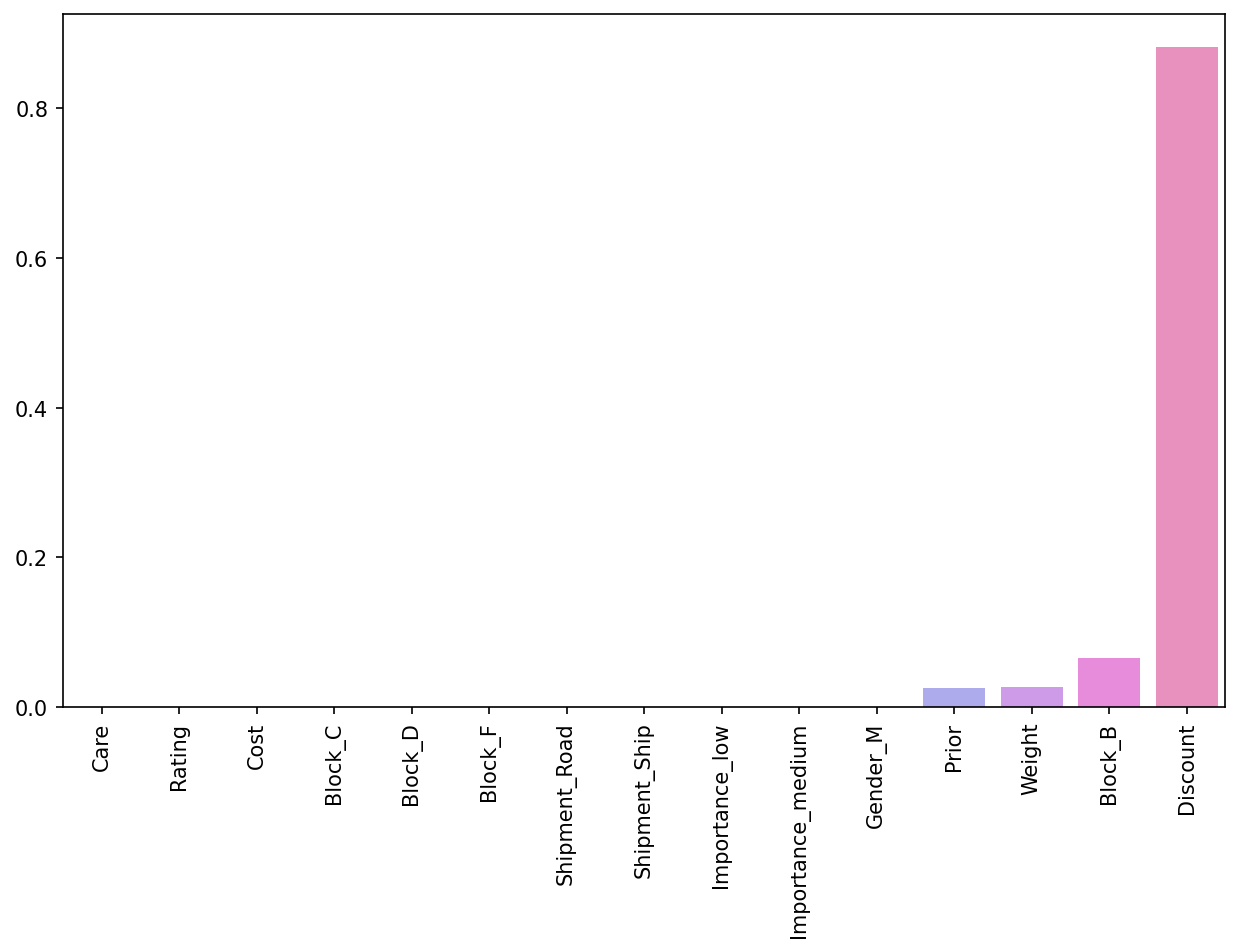

In [132]:
# Coefficient vizualisation with sorting
coefs = pd.Series(index = X.columns, data = model_9['tree'].feature_importances_)
coefs = coefs.sort_values()
plt.figure(figsize=(10,6), dpi=150)
sns.barplot(x=coefs.index, y=coefs.values)
plt.xticks(rotation = 90)
plt.show()

*   We can expect the odds of delayed order to increase (the original coeff was positive) per unit increase of Discount.
*   We can expect the odds of delayed order to increase (the original coeff was positive) per unit increase of Block_B.
*   The Discount indicator is the strongest predictor.

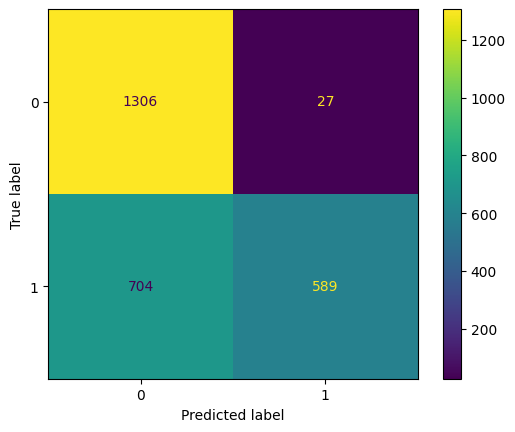

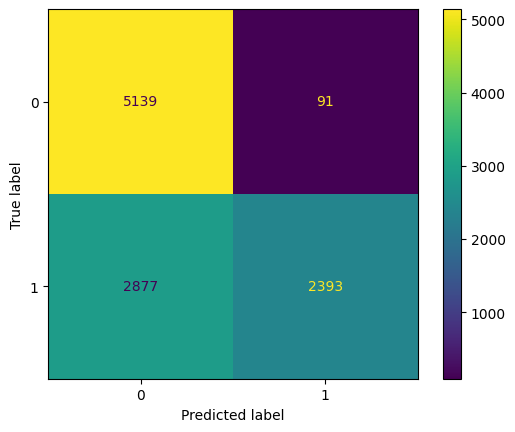

In [133]:
# Model performance evaluation for test and train set
y_pred = model_9.predict(X_test)
y_pred_tr = model_9.predict(X_train)
# Confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(model_9, X_test, y_test)
# Confusion matrix for train set
ConfusionMatrixDisplay.from_estimator(model_9, X_train, y_train)

In [134]:
# Classification report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.98      0.78      1333
           1       0.96      0.46      0.62      1293

    accuracy                           0.72      2626
   macro avg       0.80      0.72      0.70      2626
weighted avg       0.80      0.72      0.70      2626



In [135]:
# Classification report for train set
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       0.64      0.98      0.78      5230
           1       0.96      0.45      0.62      5270

    accuracy                           0.72     10500
   macro avg       0.80      0.72      0.70     10500
weighted avg       0.80      0.72      0.70     10500



*   The overall accuracy for test set is 0.72, for delayed orders (class 1) it achieved worse result 0.45 whereas for on-time orders (class 0) - 0.99.
*   Precision, recall and f1-score for test set for class 0 are: 0.65, 0.98, 0.78 and for class 1: 0.96, 0.46, 0.62.
*   The overall accuracy for train set is 0.72, for delayed orders (class 1) it achieved worse result 0.45 whereas for on-time orders (class 0) - 0.98.
*   Precision, recall and f1-score for train set for class 0 are: 0.64, 0.98, 0.78 and for class 1: 0.96, 0.45, 0.62.
*   For test set 0.46 relevant cases were found and for train set - 0.45 (recall for class 1).
*   For class 1, the prediction was correct in 976 for test cases and in 96% for train cases (precision for class 1).
*   Based on above, train and test sets achieved similar results.

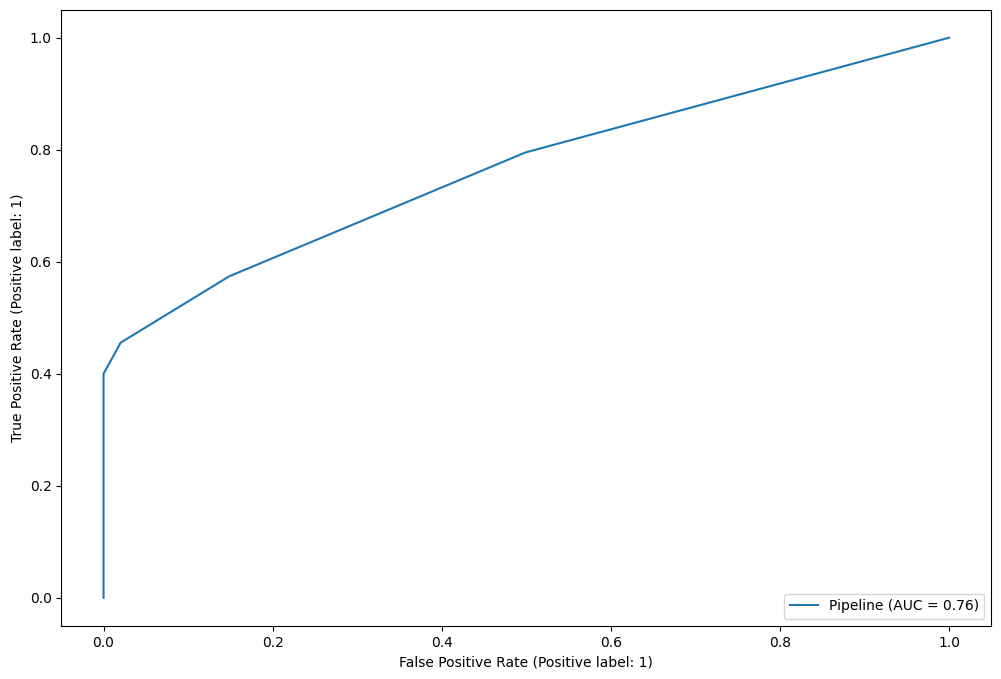

In [136]:
# ROC curve
fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_9, X_test, y_test, ax = ax)
plt.show()

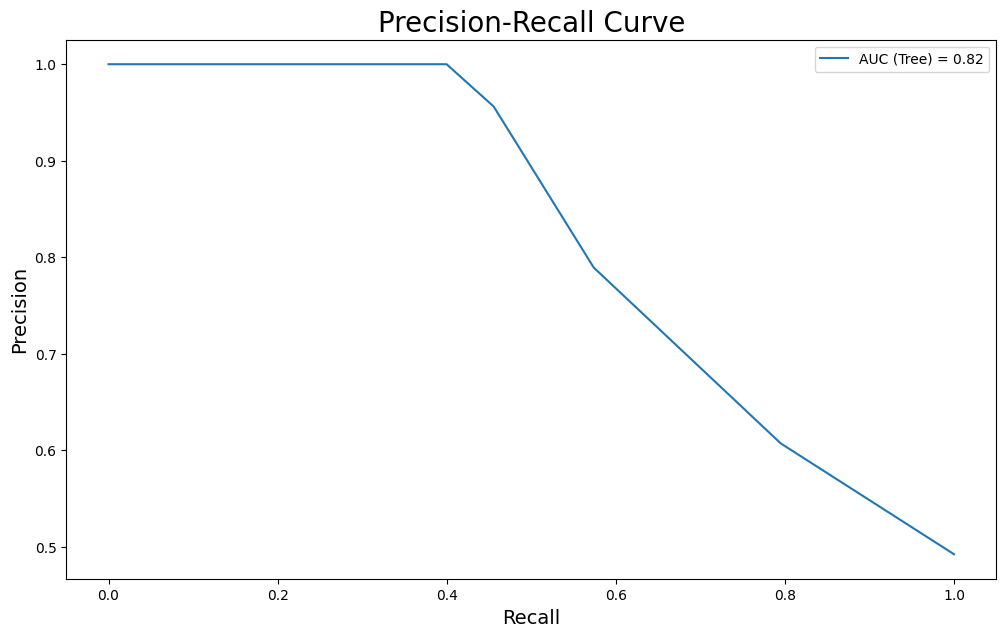

In [137]:
# Precision-Recall curve
y_scores = model_9.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
auc_1 = metrics.auc(recall, precision)
plt.figure(figsize=(12, 7))
plt.plot(recall, precision,  label=f'AUC (Tree) = {auc_1:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend()

*   The clasifier for class 1 (delayed orders) has AUC = 0.82 which means that it achieved good predictive performance across all the thresholds. The higher the value of AUC, the better is the classifier.
*   At threshold with the low recall, the precision is correspondingly high.
*   At very high recall, the precision begins to drop.

In [138]:
# Save model results for future prediction
results.loc[len(results.index)] = ['Tree with GridSearchCV', precision_score(y_train, y_pred_tr), recall_score(y_train, y_pred_tr), accuracy_score(y_train, y_pred_tr), f1_score(y_train, y_pred_tr),
                                   precision_score(y_test, y_pred), recall_score(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), auc_1]

# **Random Forest**

## Simple RFC


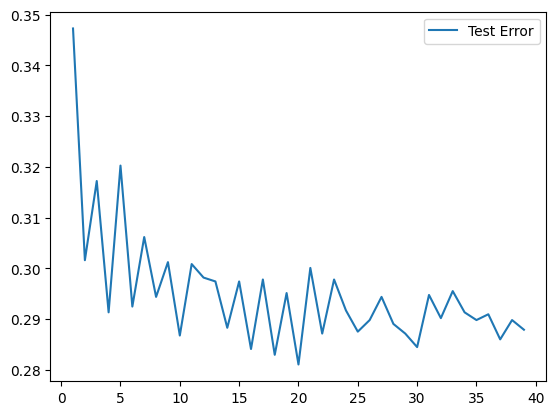

In [139]:
# Select optimal number of trees
test_error = []

for n in range(1,40):
  model = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('model', RandomForestClassifier(n_estimators=n))
    ])
  model.fit(X_train,y_train)
  test_preds = model.predict(X_test)
  test_error.append(1-accuracy_score(test_preds,y_test))
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

In [140]:
# Model definition with 20 estimators
model_10 = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('rfc', RandomForestClassifier(n_estimators=20, random_state=111))
    ]
)

In [141]:
# Model fitting
model_10.fit(X_train, y_train)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
                ('rfc',
                 RandomForestClassifier(n_estimators=20, random_state=111))])

In [142]:
# Model parameters
model_10.get_params()

{'memory': None,
 'steps': [('cat_num_pipeline',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('ohe',
                                                     OneHotEncoder(sparse=False))]),
                                    Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
  ('rfc', RandomForestClassifier(n_estimators=20, random_state=111))],
 'verbose': False,
 'cat_num_pipeline': ColumnTransformer(transformers=[('numerical',
                                  Pipeline(steps=[('scaler', StandardScaler())]),
                                  Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                 ('ca

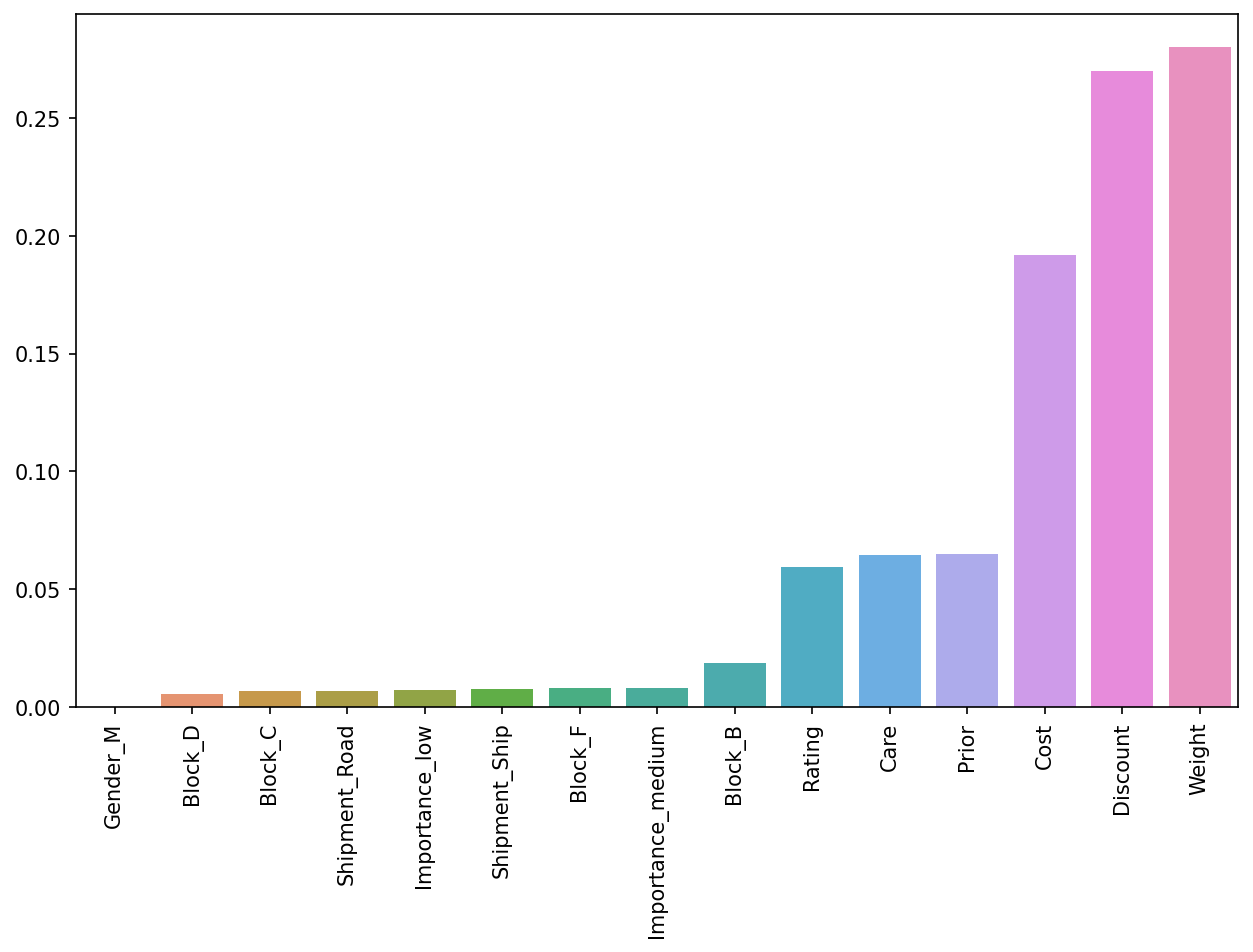

In [143]:
# Coefficient vizualisation with sorting
coefs = pd.Series(index = X.columns, data = model_10['rfc'].feature_importances_)
coefs = coefs.sort_values()
plt.figure(figsize=(10,6), dpi=150)
sns.barplot(x=coefs.index, y=coefs.values)
plt.xticks(rotation = 90)
plt.show()

*   We can expect the odds of delayed order to increase (the original coeff was positive) per unit increase of Weight.
*   We can expect the odds of delayed order to increase (the original coeff was positive) per unit increase of Discount.
*   We can expect the odds of delayed order to increase (the original coeff was
positive) per unit increase of Cost.
*   The Weight indicator is the strongest predictor.

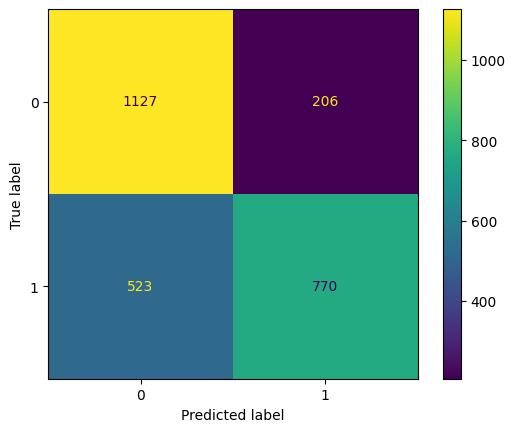

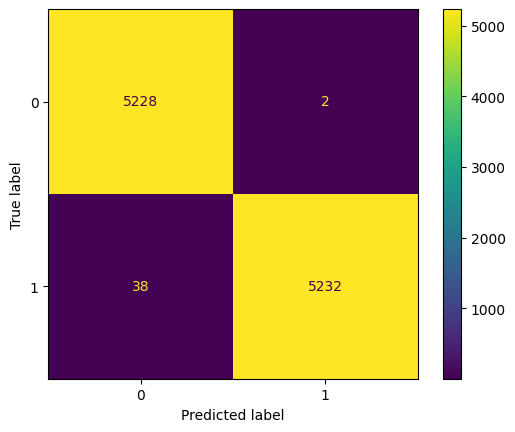

In [144]:
# Model performance evaluation for test and train set
y_pred = model_10.predict(X_test)
y_pred_tr = model_10.predict(X_train)
# Confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(model_10, X_test, y_test)
# Confusion matrix for train set
ConfusionMatrixDisplay.from_estimator(model_10, X_train, y_train)

In [145]:
# Classification report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.85      0.76      1333
           1       0.79      0.60      0.68      1293

    accuracy                           0.72      2626
   macro avg       0.74      0.72      0.72      2626
weighted avg       0.74      0.72      0.72      2626



In [146]:
# Classification report for train set
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5230
           1       1.00      0.99      1.00      5270

    accuracy                           1.00     10500
   macro avg       1.00      1.00      1.00     10500
weighted avg       1.00      1.00      1.00     10500



*   The overall accuracy for test set is 0.72, for delayed orders (class 1) it achieved worse result 0.58 whereas for on-time orders (class 0) - 0.80.
*   Precision, recall and f1-score for test set for class 0 are: 0.68, 0.85, 0.76 and for class 1: 0.79, 0.60, 0.68.
*   The overall accuracy for train set is 1 - almost all cases were classified correctly.
*   Precision, recall and f1-score for train set for class 0 are: 0.99, 1.00, 1.00 and for class 1: 1.00, 0.99, 1.00.
*   For test set 0.6 relevant cases were found and for train set - 0.99 (recall for class 1).
*   For class 1, the prediction was correct in 79% for test cases and in 100% for train cases (precision for class 1).
*   Based on above, model is overfitted.

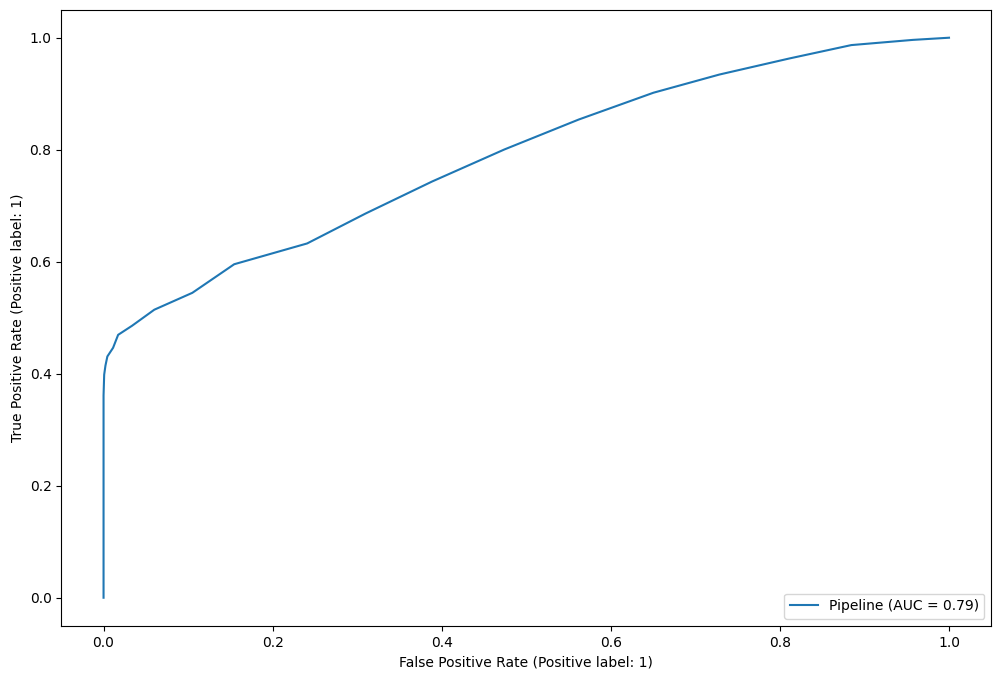

In [147]:
# ROC curve
fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_10, X_test, y_test, ax = ax)
plt.show()

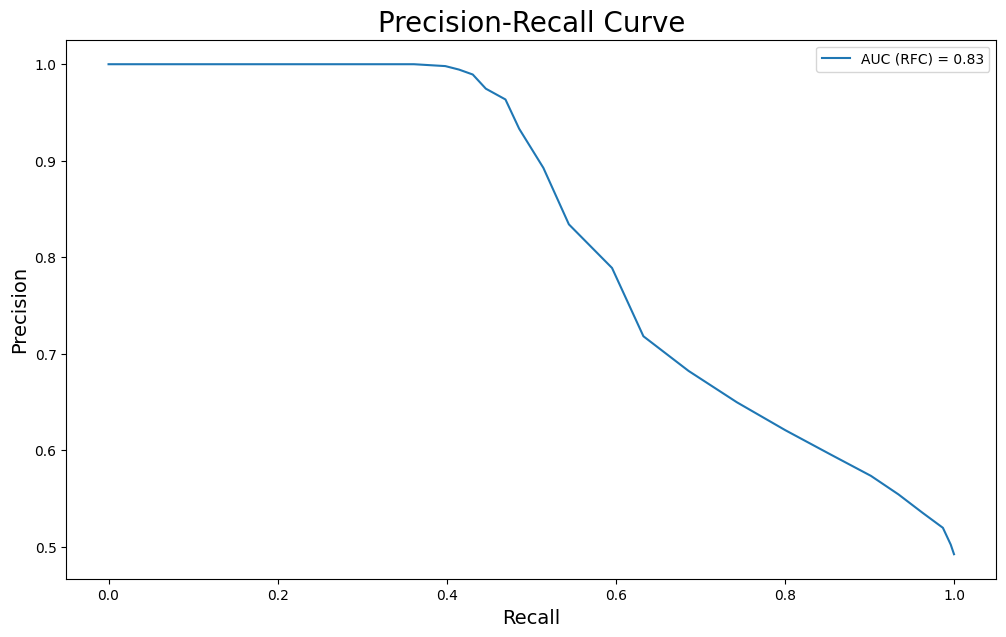

In [148]:
# Precision-Recall curve
y_scores = model_10.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
auc_1 = metrics.auc(recall, precision)
plt.figure(figsize=(12, 7))
plt.plot(recall, precision,  label=f'AUC (RFC) = {auc_1:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend()

*   The clasifier for class 1 (delayed orders) has AUC = 0.83 which means that it achieved good predictive performance across all the thresholds. The higher the value of AUC, the better is the classifier.
*   At threshold with the low recall, the precision is correspondingly high.
*   At very high recall, the precision begins to drop.

In [149]:
# Save model results for future prediction
results.loc[len(results.index)] = ['Simple RFC', precision_score(y_train, y_pred_tr), recall_score(y_train, y_pred_tr), accuracy_score(y_train, y_pred_tr), f1_score(y_train, y_pred_tr),
                                   precision_score(y_test, y_pred), recall_score(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), auc_1]

## RFC with GridSerachCV

In [150]:
# Model definition
rfc_param_grid = {'rfc__criterion': ['gini', 'entropy', 'log_loss'],
             'rfc__oob_score': [True,False],
            'rfc__max_features': ['sqrt', 'log2']}
rfc_model = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('rfc', RandomForestClassifier())
    ]
)

In [151]:
# Model fitting
grid_model_rfc = GridSearchCV(rfc_model, param_grid = rfc_param_grid, cv=5, scoring='accuracy')
grid_model_rfc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cat_num_pipeline',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(sparse=False))]),
                                                                         Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
                                       ('rfc', RandomForestClassifier())]),
             param_grid={'rfc__criterion': ['gini', 'entropy', 'log_loss'],
                         'rfc__max_features': ['sqrt', 'log2'],
                         'rfc__oob_score': [True, False]},
             scoring='accuracy')

In [152]:
# Model parameters
grid_model_rfc.best_estimator_.get_params()

{'memory': None,
 'steps': [('cat_num_pipeline',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('ohe',
                                                     OneHotEncoder(sparse=False))]),
                                    Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
  ('rfc',
   RandomForestClassifier(criterion='entropy', max_features='log2', oob_score=True))],
 'verbose': False,
 'cat_num_pipeline': ColumnTransformer(transformers=[('numerical',
                                  Pipeline(steps=[('scaler', StandardScaler())]),
                                  Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
           

In [153]:
# Best model parameters
rfc_criterion = grid_model_rfc.best_params_['rfc__criterion']
rfc_oob_score = grid_model_rfc.best_params_['rfc__oob_score']
rfc_max_features = grid_model_rfc.best_params_['rfc__max_features']

In [154]:
# Best model details
model_11 = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('rfc', RandomForestClassifier(criterion = rfc_criterion, oob_score = rfc_oob_score, max_features = rfc_max_features))
    ]
)

In [155]:
# Best model fitting
model_11.fit(X_train, y_train)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
                ('rfc',
                 RandomForestClassifier(criterion='entropy',
                                        max_features='log2', oob_score=True))])

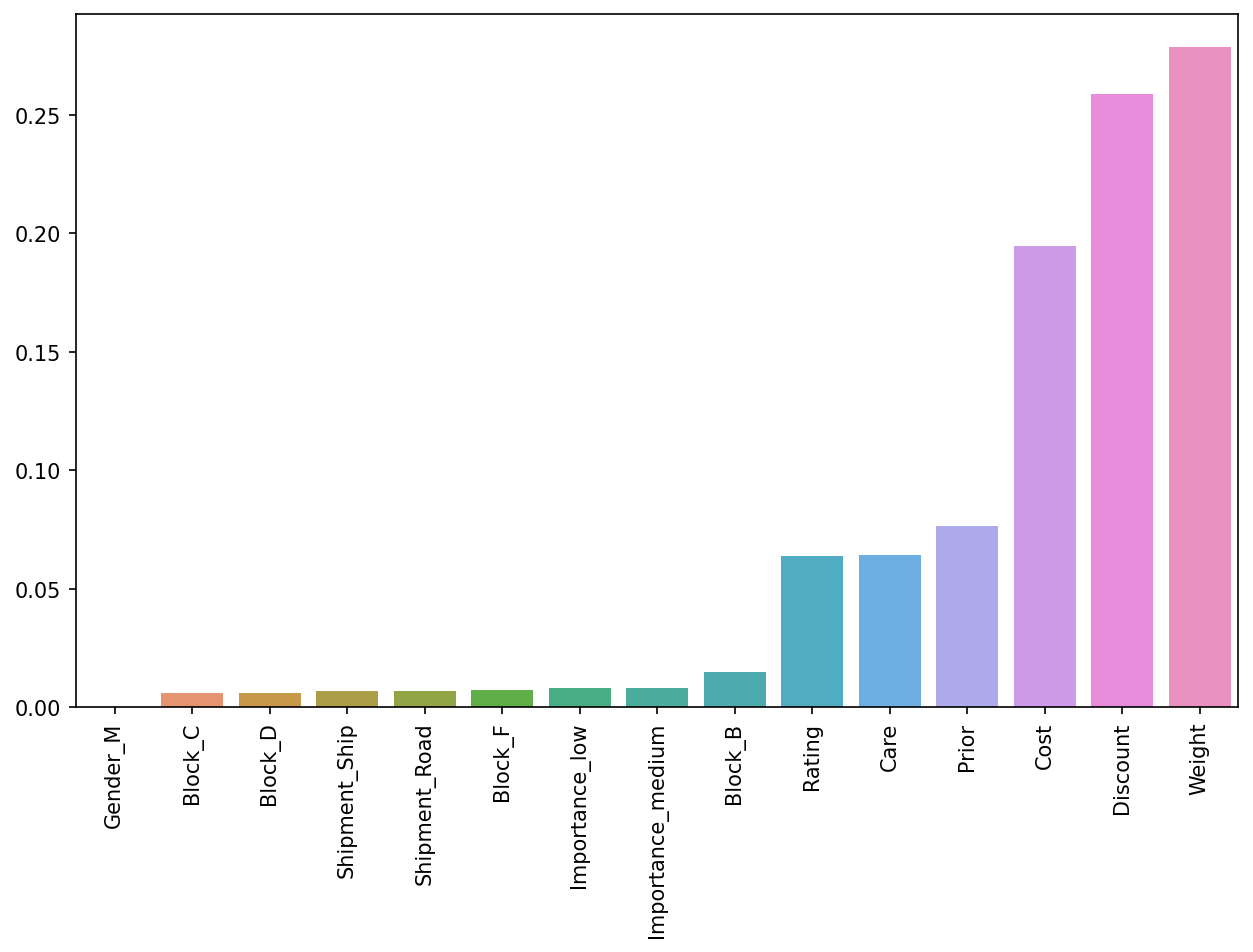

In [156]:
# Coefficient vizualisation with sorting
coefs = pd.Series(index = X.columns, data = model_11['rfc'].feature_importances_)
coefs = coefs.sort_values()
plt.figure(figsize=(10,6), dpi=150)
sns.barplot(x=coefs.index, y=coefs.values)
plt.xticks(rotation = 90)
plt.show()

*   We can expect the odds of delayed order to increase (the original coeff was positive) per unit increase of Weight.
*   We can expect the odds of delayed order to increase (the original coeff was positive) per unit increase of Discount.
*   We can expect the odds of delayed order to increase (the original coeff was
positive) per unit increase of Cost.
*   The Weight indicator is the strongest predictor.

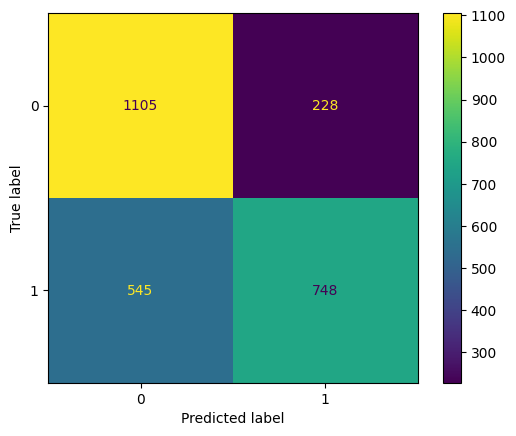

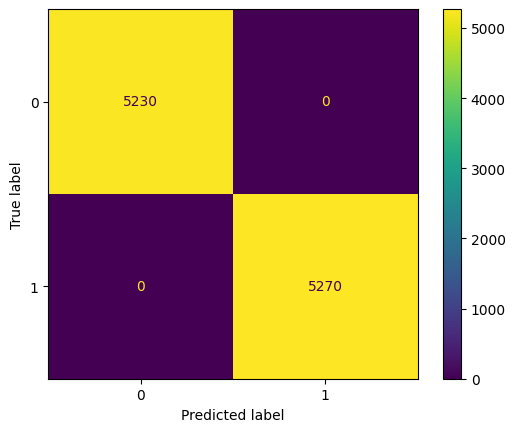

In [157]:
# Model performance evaluation for test and train set
y_pred = model_11.predict(X_test)
y_pred_tr = model_11.predict(X_train)
# Confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(model_11, X_test, y_test)
# Confusion matrix for train set
ConfusionMatrixDisplay.from_estimator(model_11, X_train, y_train)

In [158]:
# Classification report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74      1333
           1       0.77      0.58      0.66      1293

    accuracy                           0.71      2626
   macro avg       0.72      0.70      0.70      2626
weighted avg       0.72      0.71      0.70      2626



In [159]:
# Classification report for train set
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5230
           1       1.00      1.00      1.00      5270

    accuracy                           1.00     10500
   macro avg       1.00      1.00      1.00     10500
weighted avg       1.00      1.00      1.00     10500



*   The overall accuracy for test set is 0.71, for delayed orders (class 1) it achieved worse result 0.61 whereas for on-time orders (class 0) - 0.79.
*   Precision, recall and f1-score for test set for class 0 are: 0.67, 0.83, 0.74 and for class 1: 0.77, 0.58, 0.66.
*   The overall accuracy for train set is 1, all examples are classified correctly.
*   For test set 0.58 relevant cases were found and for train set - all (recall for class 1).
*   For class 1, the prediction was correct in 77% for test cases and in 100% for train cases (precision for class 1).
*   Based on above, model is overfitted.

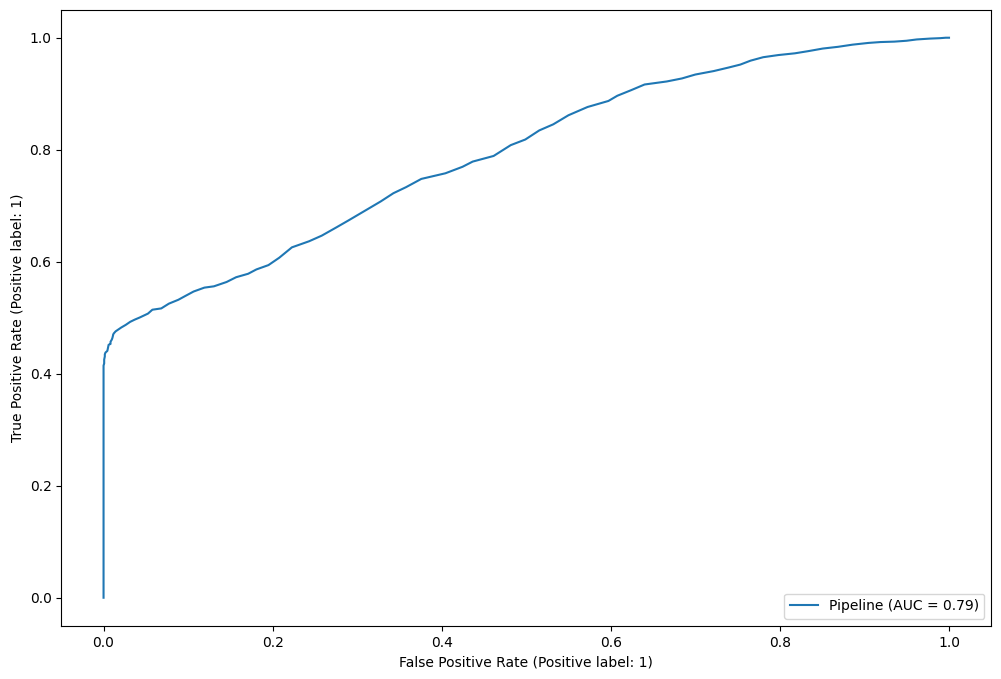

In [160]:
# ROC curve
fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_11, X_test, y_test, ax = ax)
plt.show()

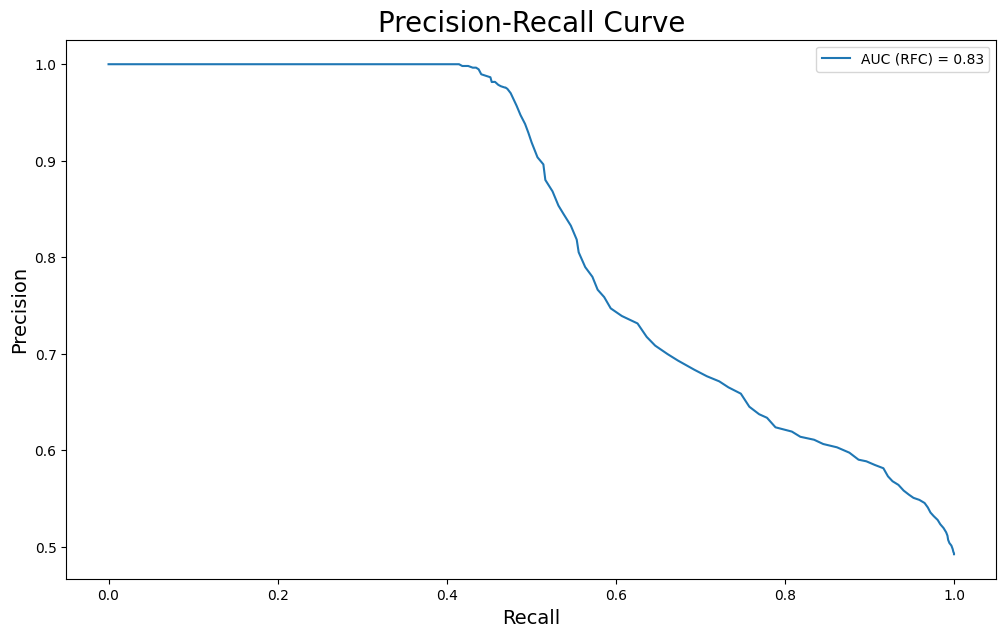

In [161]:
# Precision-Recall curve
y_scores = model_11.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
auc_1 = metrics.auc(recall, precision)
plt.figure(figsize=(12, 7))
plt.plot(recall, precision,  label=f'AUC (RFC) = {auc_1:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend()

*   The clasifier for class 1 (delayed orders) has AUC = 0.83 which means that it achieved good predictive performance across all the thresholds. The higher the value of AUC, the better is the classifier.
*   At threshold with the low recall, the precision is correspondingly high.
*   At very high recall, the precision begins to drop.

In [162]:
# Save model results for future prediction
results.loc[len(results.index)] = ['RFC with GridSearchCV', precision_score(y_train, y_pred_tr), recall_score(y_train, y_pred_tr), accuracy_score(y_train, y_pred_tr), f1_score(y_train, y_pred_tr),
                                   precision_score(y_test, y_pred), recall_score(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), auc_1]

# **Ada Boost**

## Simple AdaBoost

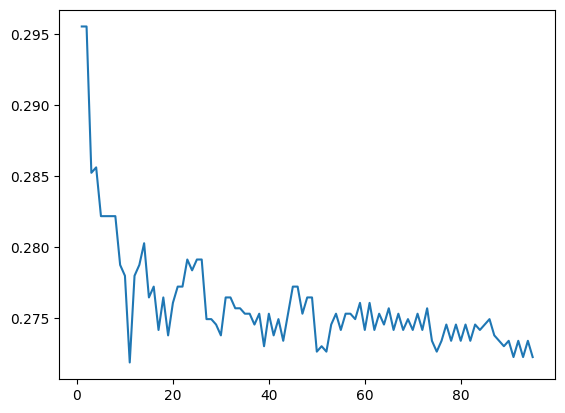

In [163]:
# Select optimal number of estimators
error_rates = []

for n in range(1, 96):
    model = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('model', AdaBoostClassifier(n_estimators=n))
    ])
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test, preds)
    error_rates.append(err)
plt.plot(range(1,96),error_rates)
plt.show()

In [164]:
# Model definition with 10 estimators
model_12 = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('abc', AdaBoostClassifier(n_estimators=10, random_state=111))
    ]
)

In [165]:
# Model fitting
model_12.fit(X_train, y_train)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
                ('abc', AdaBoostClassifier(n_estimators=10, random_state=111))])

In [166]:
# Model parameters
model_12.get_params()

{'memory': None,
 'steps': [('cat_num_pipeline',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('ohe',
                                                     OneHotEncoder(sparse=False))]),
                                    Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
  ('abc', AdaBoostClassifier(n_estimators=10, random_state=111))],
 'verbose': False,
 'cat_num_pipeline': ColumnTransformer(transformers=[('numerical',
                                  Pipeline(steps=[('scaler', StandardScaler())]),
                                  Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                 ('catego

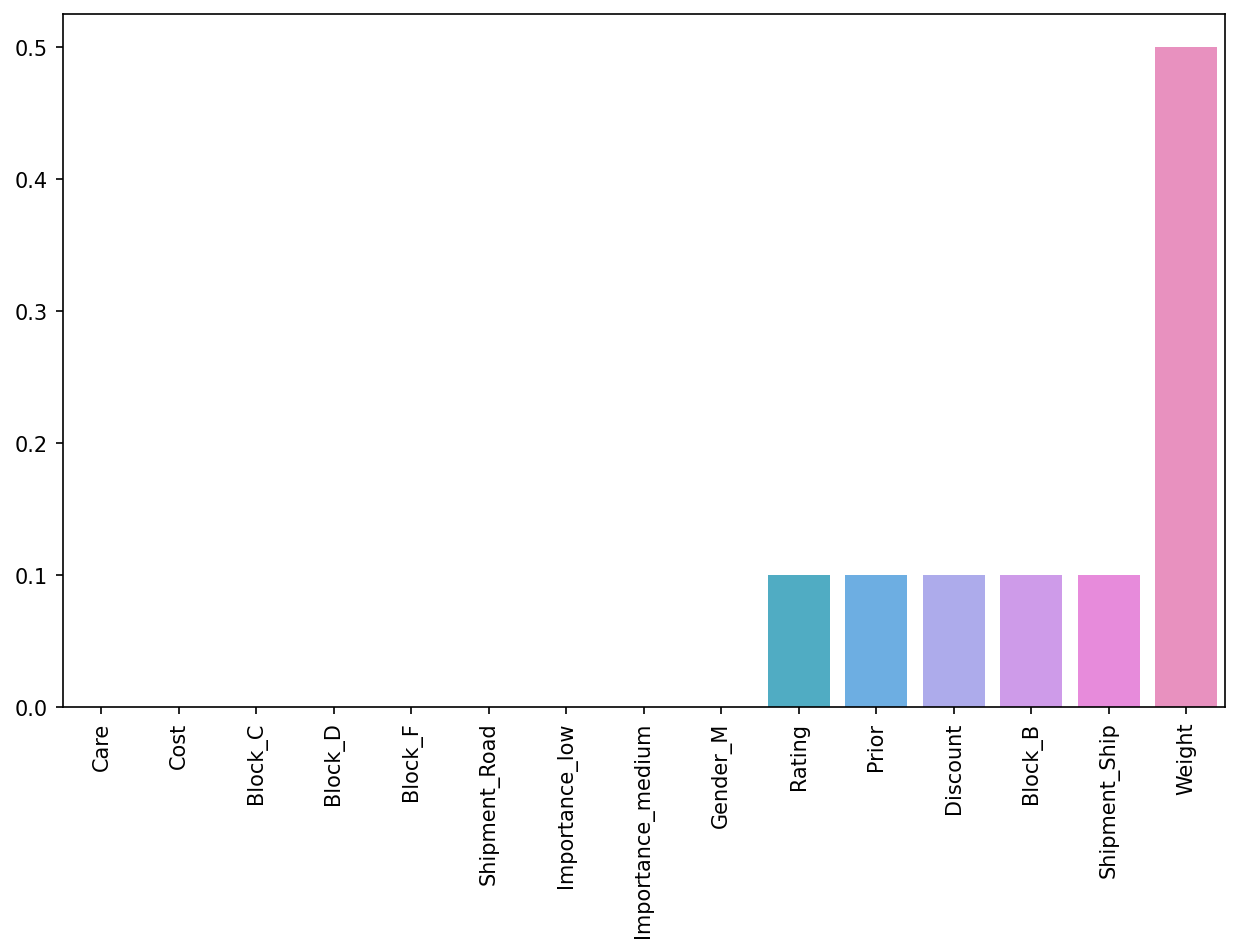

In [167]:
# Coefficient vizualisation with sorting
coefs = pd.Series(index = X.columns, data = model_12['abc'].feature_importances_)
coefs = coefs.sort_values()
plt.figure(figsize=(10,6), dpi=150)
sns.barplot(x=coefs.index, y=coefs.values)
plt.xticks(rotation = 90)
plt.show()

*   We can expect the odds of delayed order to increase (the original coeff was positive) per unit increase of Weight.
*   We can expect the odds of delayed order to increase (the original coeff was positive) per unit increase of Rating, Prior_purchases, Discount, Block_B, Shipment_Ship.
*   The Weight indicator is the strongest predictor.

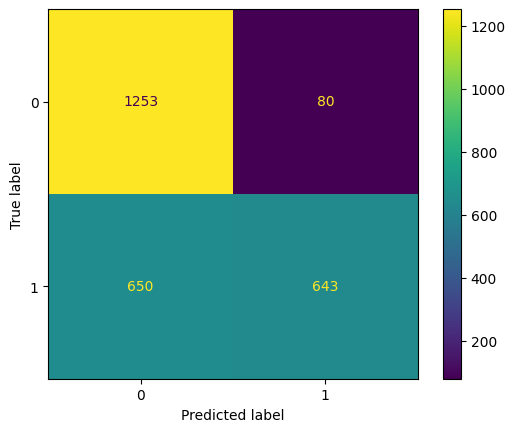

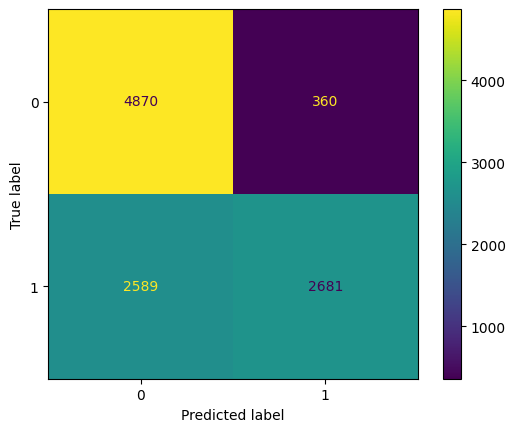

In [168]:
# Model performance evaluation for test and train set
y_pred = model_12.predict(X_test)
y_pred_tr = model_12.predict(X_train)
# Confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(model_12, X_test, y_test)
# Confusion matrix for train set
ConfusionMatrixDisplay.from_estimator(model_12, X_train, y_train)

In [169]:
# Classification report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.94      0.77      1333
           1       0.89      0.50      0.64      1293

    accuracy                           0.72      2626
   macro avg       0.77      0.72      0.71      2626
weighted avg       0.77      0.72      0.71      2626



In [170]:
# Classification report for train set
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       0.65      0.93      0.77      5230
           1       0.88      0.51      0.65      5270

    accuracy                           0.72     10500
   macro avg       0.77      0.72      0.71     10500
weighted avg       0.77      0.72      0.71     10500



*   The overall accuracy for test set is 0.72, for delayed orders (class 1) it achieved worse result 0.57 whereas for on-time orders (class 0) - 0.86.
*   Precision, recall and f1-score for test set for class 0 are: 0.66, 0.94, 0.77 and for class 1: 0.89, 0.50, 0.64.
*   The overall accuracy for train set is 0.72, for delayed orders (class 1) it achieved worse result 0.56 whereas for on-time orders (class 0) - 0.87.
*   Precision, recall and f1-score for train set for class 0 are: 0.65, 0.93, 0.77 and for class 1: 0.88, 0.51, 0.65.
*   For test set 0.50 relevant cases were found and for train set - 0.51 (recall for class 1).
*   For class 1, the prediction was correct in 89% for test cases and in 88% for train cases (precision for class 1).
*   Based on above, train and test sets achieved similar results.

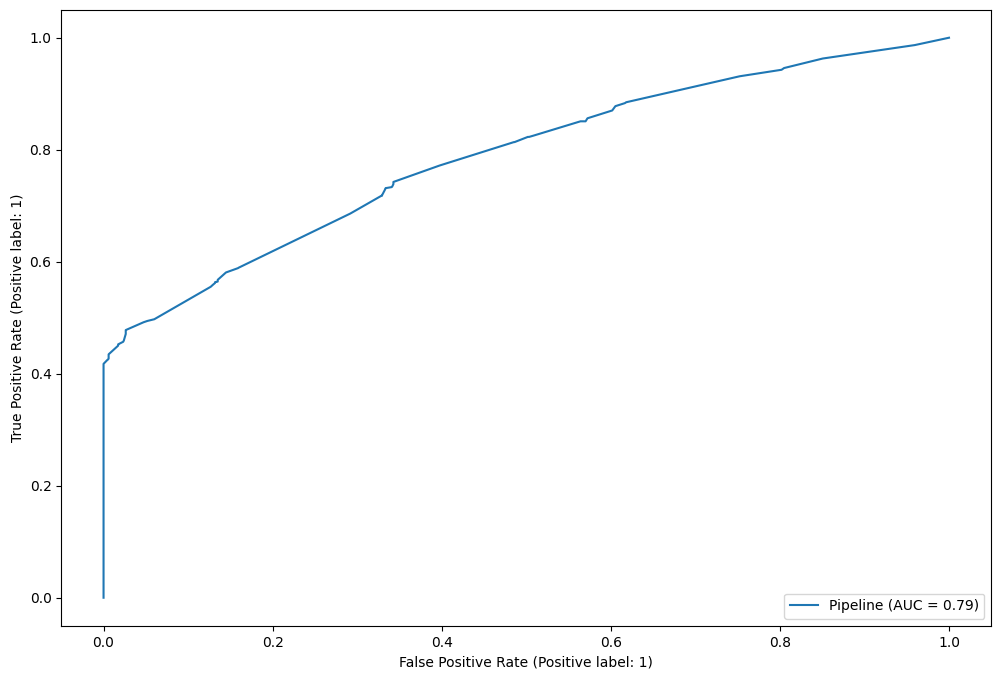

In [171]:
# ROC curve
fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_12, X_test, y_test, ax = ax)
plt.show()

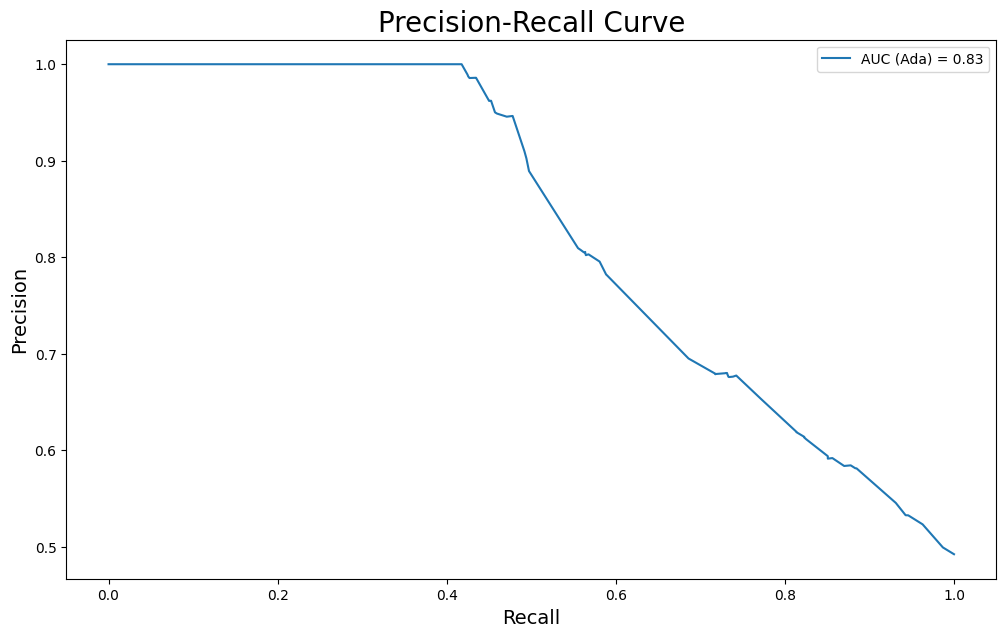

In [172]:
# Precision-Recall curve
y_scores = model_12.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
auc_1 = metrics.auc(recall, precision)
plt.figure(figsize=(12, 7))
plt.plot(recall, precision,  label=f'AUC (Ada) = {auc_1:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend()

*   The clasifier for class 1 (delayed orders) has AUC = 0.83 which means that it achieved good predictive performance across all the thresholds. The higher the value of AUC, the better is the classifier.
*   At threshold with the low recall, the precision is correspondingly high.
*   At very high recall, the precision begins to drop.

In [173]:
# Save model results for future prediction
results.loc[len(results.index)] = ['Simple AdaBoost', precision_score(y_train, y_pred_tr), recall_score(y_train, y_pred_tr), accuracy_score(y_train, y_pred_tr), f1_score(y_train, y_pred_tr),
                                   precision_score(y_test, y_pred), recall_score(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), auc_1]

## AdaBoost with GridSearchCV

In [174]:
# Model definition
abc_param_grid = {'abc__learning_rate': [0.1, 0.5, 0.9],
             'abc__algorithm': ['SAMME', 'SAMME.R']}
abc_model = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('abc', AdaBoostClassifier())
    ]
)

In [175]:
# Model fitting
grid_model_abc = GridSearchCV(abc_model, param_grid = abc_param_grid, cv=5, scoring='accuracy')
grid_model_abc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cat_num_pipeline',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(sparse=False))]),
                                                                         Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
                                       ('abc', AdaBoostClassifier())]),
             param_grid={'abc__algorithm': ['SAMME', 'SAMME.R'],
                         'abc__learning_rate': [0.1, 0.5, 0.9]},
             scoring='accuracy')

In [176]:
# Model parameters
grid_model_abc.best_estimator_.get_params()

{'memory': None,
 'steps': [('cat_num_pipeline',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('ohe',
                                                     OneHotEncoder(sparse=False))]),
                                    Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
  ('abc', AdaBoostClassifier(learning_rate=0.5))],
 'verbose': False,
 'cat_num_pipeline': ColumnTransformer(transformers=[('numerical',
                                  Pipeline(steps=[('scaler', StandardScaler())]),
                                  Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                 ('categorical',
        

In [177]:
# Best model parameters
abc_learning_rate = grid_model_abc.best_params_['abc__learning_rate']
abc_algorithm = grid_model_abc.best_params_['abc__algorithm']

In [178]:
# Best model details
model_13 = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('abc', AdaBoostClassifier(learning_rate = abc_learning_rate, algorithm = abc_algorithm))
    ]
)

In [179]:
# Best model fitting
model_13.fit(X_train, y_train)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
                ('abc', AdaBoostClassifier(learning_rate=0.5))])

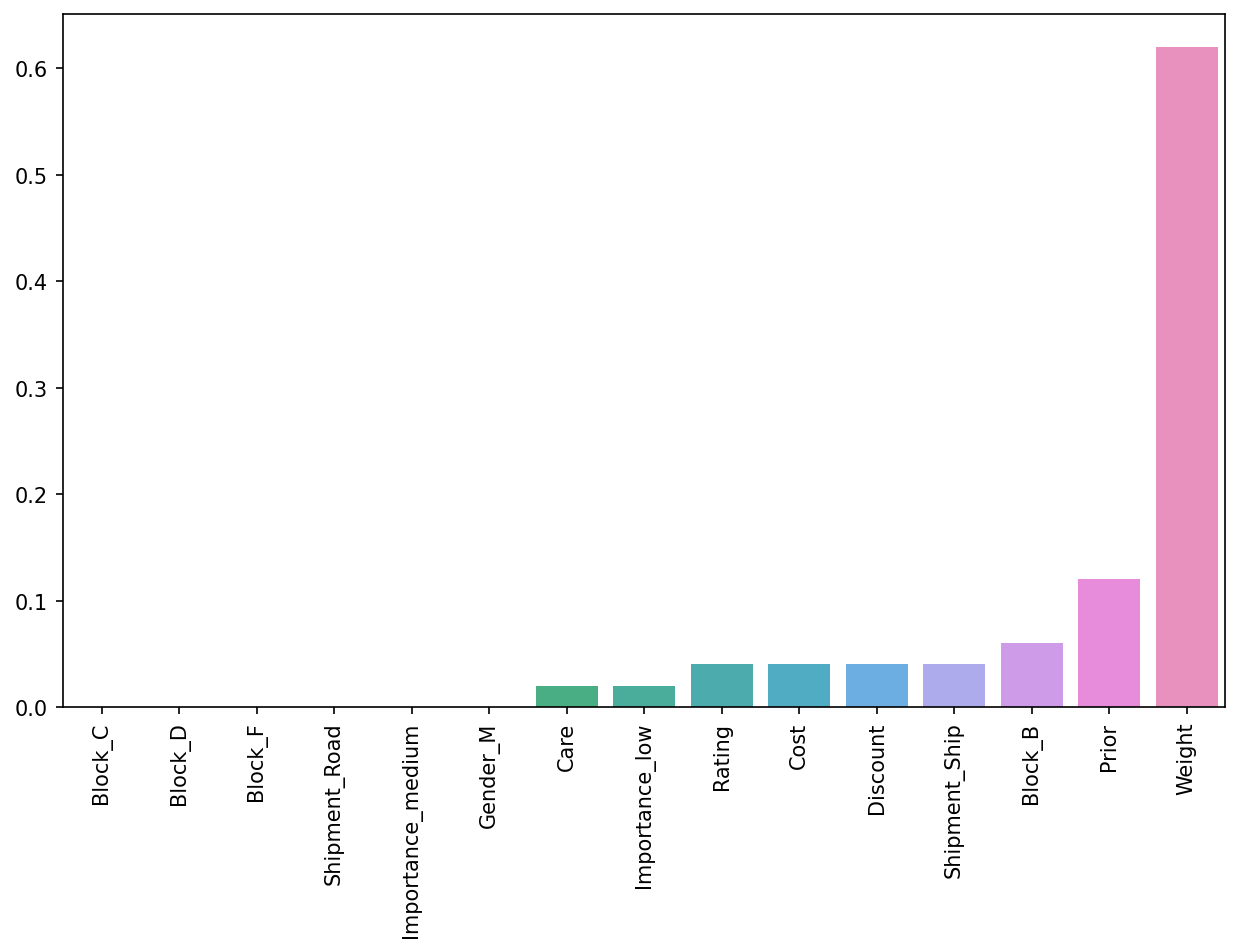

In [180]:
# Coefficient vizualisation with sorting
coefs = pd.Series(index = X.columns, data = model_13['abc'].feature_importances_)
coefs = coefs.sort_values()
plt.figure(figsize=(10,6), dpi=150)
sns.barplot(x=coefs.index, y=coefs.values)
plt.xticks(rotation = 90)
plt.show()

*   We can expect the odds of delayed order to increase (the original coeff was positive) per unit increase of Weight.
*   We can expect the odds of delayed order to increase (the original coeff was positive) per unit increase of Prior_purchases.
*   The Weight indicator is the strongest predictor.






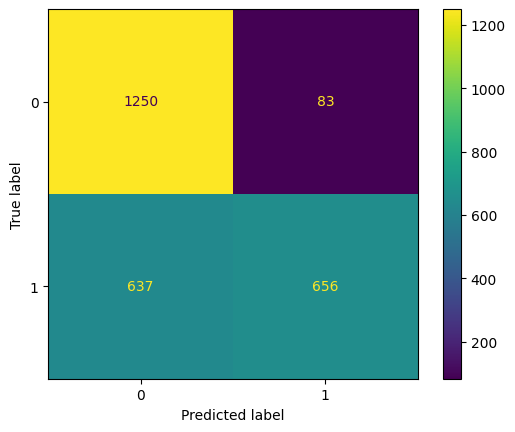

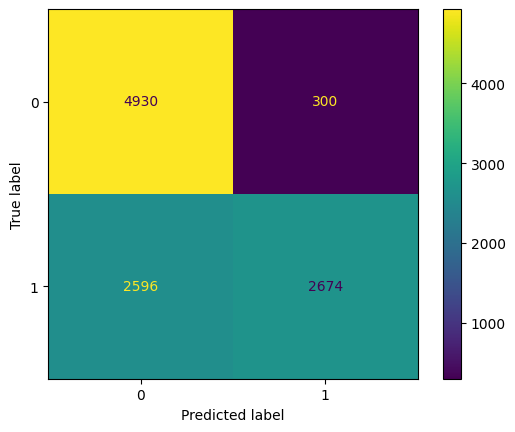

In [181]:
# Model performance evaluation for test and train set
y_pred = model_13.predict(X_test)
y_pred_tr = model_13.predict(X_train)
# Confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(model_13, X_test, y_test)
# Confusion matrix for train set
ConfusionMatrixDisplay.from_estimator(model_13, X_train, y_train)

In [182]:
# Classification report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.94      0.78      1333
           1       0.89      0.51      0.65      1293

    accuracy                           0.73      2626
   macro avg       0.78      0.72      0.71      2626
weighted avg       0.77      0.73      0.71      2626



In [183]:
# Classification report for train set
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       0.66      0.94      0.77      5230
           1       0.90      0.51      0.65      5270

    accuracy                           0.72     10500
   macro avg       0.78      0.73      0.71     10500
weighted avg       0.78      0.72      0.71     10500



*   The overall accuracy for test set is 0.73, for delayed orders (class 1) it achieved worse result 0.53 whereas for on-time orders (class 0) - 0.91.
*   Precision, recall and f1-score for test set for class 0 are: 0.66, 0.94, 0.78 and for class 1: 0.89, 0.51, 0.65.
*   The overall accuracy for train set is 0.72, for delayed orders (class 1) it achieved worse result 0.53 whereas for on-time orders (class 0) - 0.92.
*   Precision, recall and f1-score for train set for class 0 are: 0.66, 0.94, 0.77 and for class 1: 0.90, 0.51, 0.65.
*   For test set 0.51 relevant cases were found and for train set - 0.51 (recall for class 1).
*   For class 1, the prediction was correct in 89% for test cases and in 90% for train cases (precision for class 1).
*   Based on above, train and test sets achieved similar results.

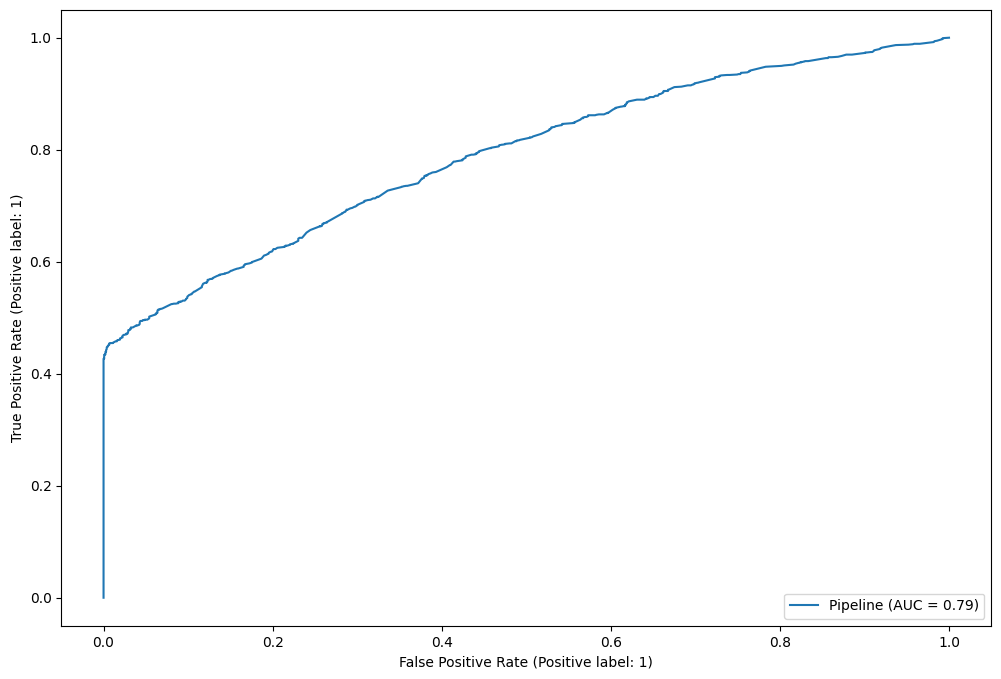

In [184]:
# ROC curve
fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_13, X_test, y_test, ax = ax)
plt.show()

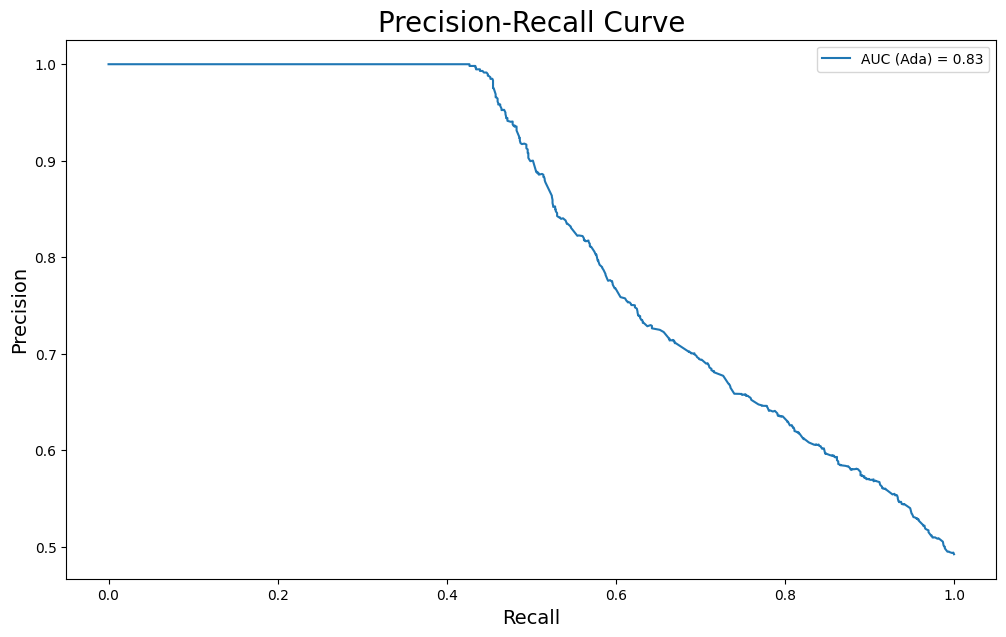

In [185]:
# Precision-Recall curve
y_scores = model_13.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
auc_1 = metrics.auc(recall, precision)
plt.figure(figsize=(12, 7))
plt.plot(recall, precision,  label=f'AUC (Ada) = {auc_1:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend()

*   The clasifier for class 1 (delayed orders) has AUC = 0.83 which means that it achieved good predictive performance across all the thresholds. The higher the value of AUC, the better is the classifier.
*   At threshold with the low recall, the precision is correspondingly high.
*   At very high recall, the precision begins to drop.

In [186]:
# Save model results for future prediction
results.loc[len(results.index)] = ['AdaBoost with GridSearchCV', precision_score(y_train, y_pred_tr), recall_score(y_train, y_pred_tr), accuracy_score(y_train, y_pred_tr), f1_score(y_train, y_pred_tr),
                                   precision_score(y_test, y_pred), recall_score(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), auc_1]

# **Gradient Boosting**

## Simple Gradient Boosting

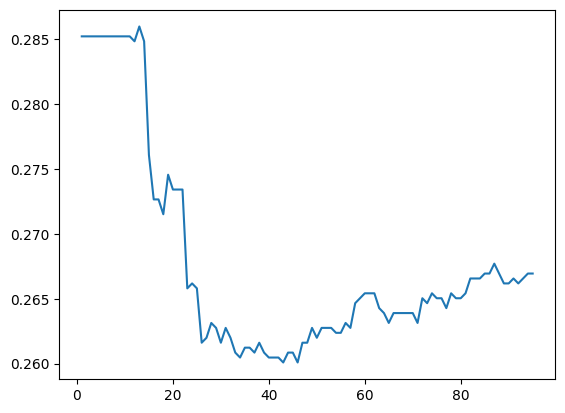

In [187]:
# Select optimal number of estimators
error_rates = []

for n in range(1, 96):
    model = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('model', GradientBoostingClassifier(n_estimators=n))
    ])
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test, preds)
    error_rates.append(err)
plt.plot(range(1,96),error_rates)
plt.show()

In [188]:
# Model definition with 25 estimators
model_14 = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('gbc', GradientBoostingClassifier(n_estimators=25, random_state=111))
    ]
)

In [189]:
# Model fitting
model_14.fit(X_train, y_train)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
                ('gbc',
                 GradientBoostingClassifier(n_estimators=25,
                                            random_state=111))])

In [190]:
# Model parameters
model_14.get_params()

{'memory': None,
 'steps': [('cat_num_pipeline',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('ohe',
                                                     OneHotEncoder(sparse=False))]),
                                    Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
  ('gbc', GradientBoostingClassifier(n_estimators=25, random_state=111))],
 'verbose': False,
 'cat_num_pipeline': ColumnTransformer(transformers=[('numerical',
                                  Pipeline(steps=[('scaler', StandardScaler())]),
                                  Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                 

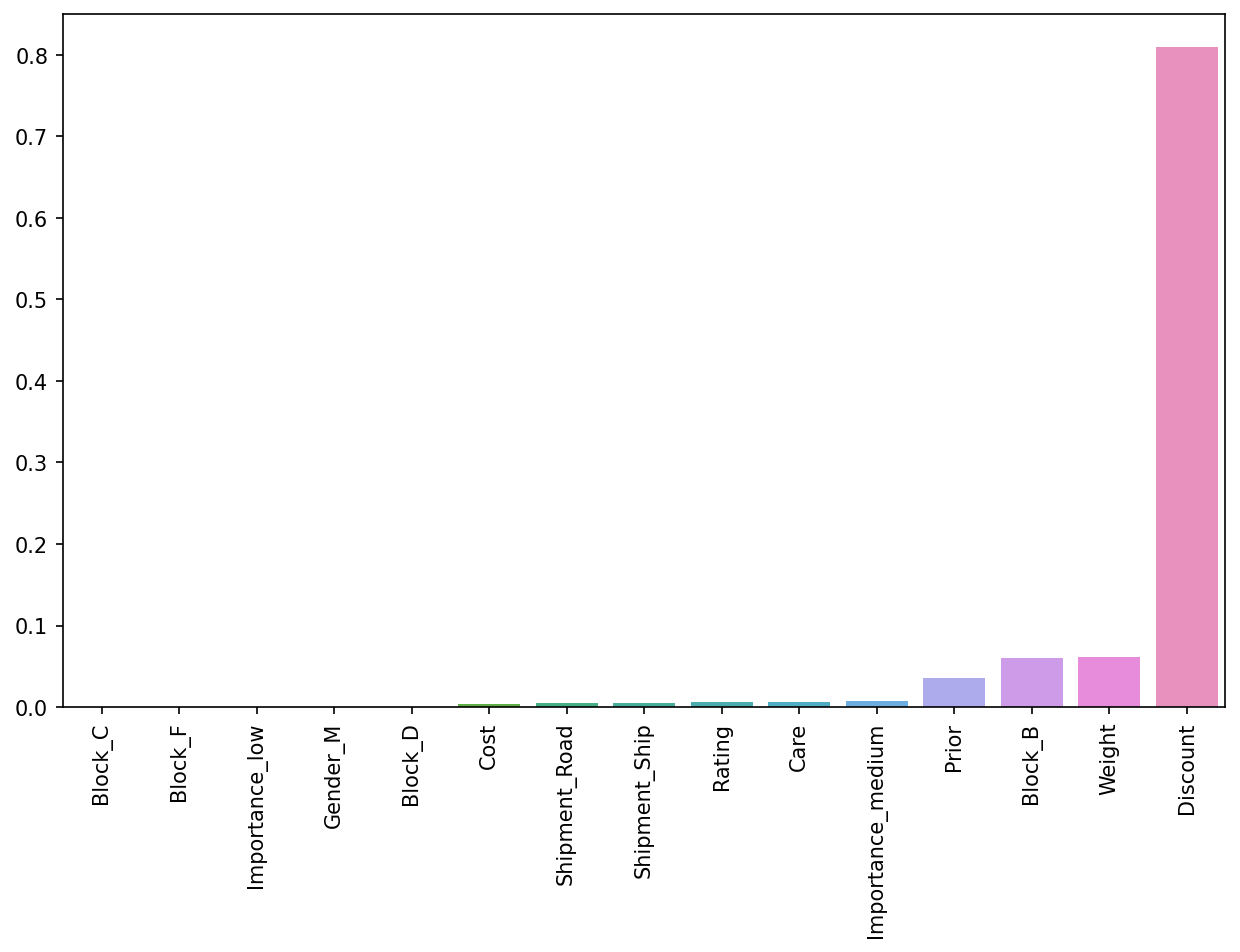

In [191]:
# Coefficient vizualisation with sorting
coefs = pd.Series(index = X.columns, data = model_14['gbc'].feature_importances_)
coefs = coefs.sort_values()
plt.figure(figsize=(10,6), dpi=150)
sns.barplot(x=coefs.index, y=coefs.values)
plt.xticks(rotation = 90)
plt.show()

*   We can expect the odds of delayed order to increase (the original coeff was positive) per unit increase of Discount.
*   We can expect the odds of delayed order to increase (the original coeff was positive) per unit increase of Block_B.
*   We can expect the odds of delayed order to increase (the original coeff was positive) per unit increase of Weight.
*   The Discount indicator is the strongest predictor.

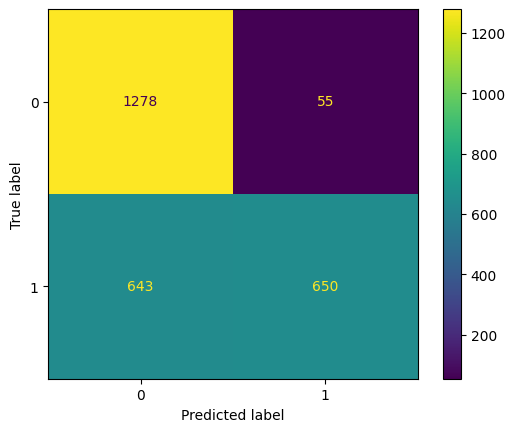

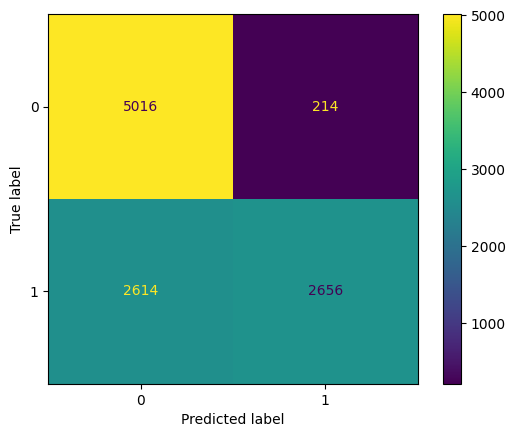

In [192]:
# Model performance evaluation for test and train set
y_pred = model_14.predict(X_test)
y_pred_tr = model_14.predict(X_train)
# Confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(model_14, X_test, y_test)
# Confusion matrix for train set
ConfusionMatrixDisplay.from_estimator(model_14, X_train, y_train)

In [193]:
# Classification report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.96      0.79      1333
           1       0.92      0.50      0.65      1293

    accuracy                           0.73      2626
   macro avg       0.79      0.73      0.72      2626
weighted avg       0.79      0.73      0.72      2626



In [194]:
# Classification report for train set
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       0.66      0.96      0.78      5230
           1       0.93      0.50      0.65      5270

    accuracy                           0.73     10500
   macro avg       0.79      0.73      0.72     10500
weighted avg       0.79      0.73      0.72     10500



*   The overall accuracy for test set is 0.73, for delayed orders (class 1) it achieved worse result 0.52 whereas for on-time orders (class 0) - 0.91.
*   Precision, recall and f1-score for test set for class 0 are: 0.67, 0.96, 0.79 and for class 1: 0.92, 0.50, 0.65.
*   The overall accuracy for train set is 0.73, for delayed orders (class 1) it achieved worse result 0.52 whereas for on-time orders (class 0) - 0.93.
*   Precision, recall and f1-score for train set for class 0 are: 0.66, 0.96, 0.78 and for class 1: 0.93, 0.50, 0.65.
*   For test set 0.50 relevant cases were found and for train set - 0.50 (recall for class 1).
*   For class 1, the prediction was correct in 92% for test cases and in 93% for train cases (precision for class 1).
*   Based on above, train and test sets achieved similar results.

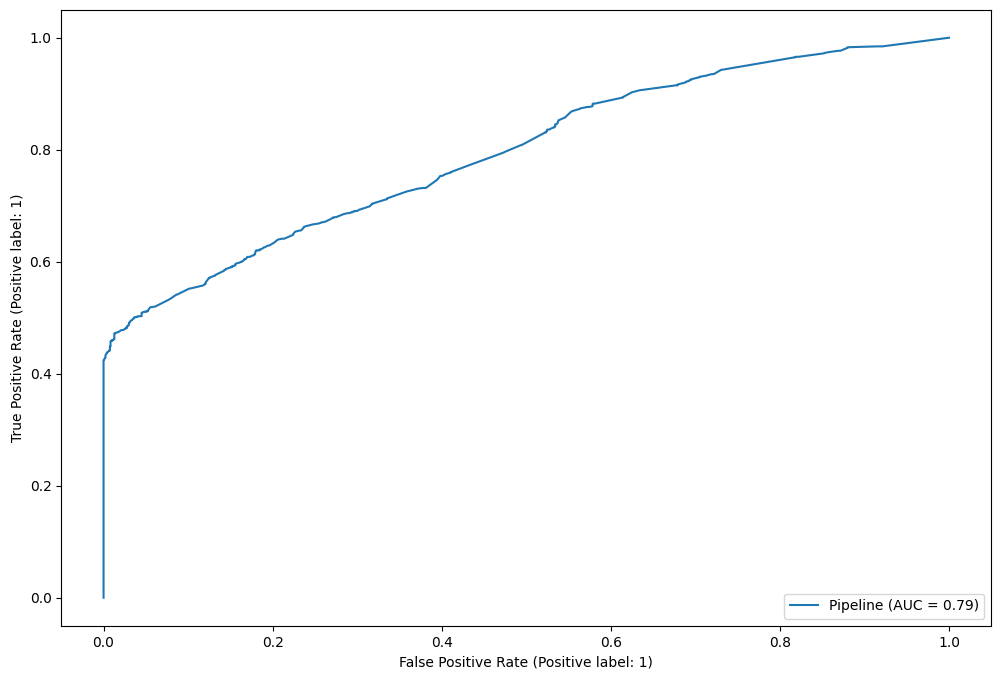

In [195]:
# ROC curve
fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_14, X_test, y_test, ax = ax)
plt.show()

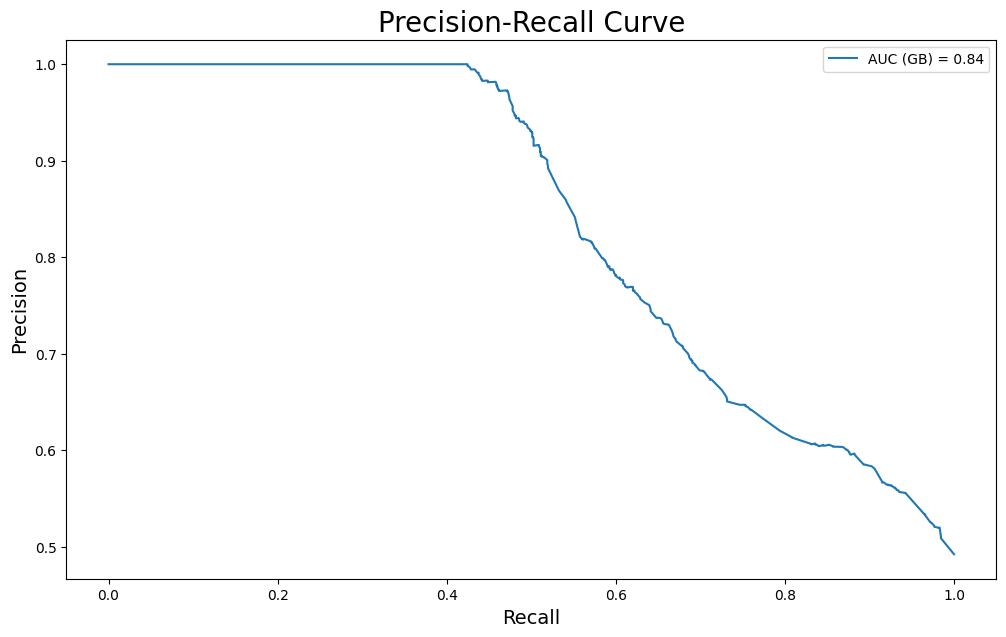

In [197]:
# Precision-Recall curve
y_scores = model_14.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
auc_1 = metrics.auc(recall, precision)
plt.figure(figsize=(12, 7))
plt.plot(recall, precision,  label=f'AUC (GB) = {auc_1:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend()

*   The clasifier for class 1 (delayed orders) has AUC = 0.84 which means that it achieved good predictive performance across all the thresholds. The higher the value of AUC, the better is the classifier.
*   At threshold with the low recall, the precision is correspondingly high.
*   At very high recall, the precision begins to drop.

In [198]:
# Save model results for future prediction
results.loc[len(results.index)] = ['Simple GB', precision_score(y_train, y_pred_tr), recall_score(y_train, y_pred_tr), accuracy_score(y_train, y_pred_tr), f1_score(y_train, y_pred_tr),
                                   precision_score(y_test, y_pred), recall_score(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), auc_1]

## GradientBoosting with GridSearchCV

In [199]:
# Model definition
gbc_param_grid = {'gbc__n_estimators': [1,5,10,20,40,100],
             'gbc__max_depth': [3,4,5,6]}
gbc_model = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('gbc', GradientBoostingClassifier())
    ]
)

In [200]:
# Model fitting
grid_model_gbc = GridSearchCV(gbc_model, param_grid = gbc_param_grid, cv=5, scoring='accuracy')
grid_model_gbc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cat_num_pipeline',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(sparse=False))]),
                                                                         Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
                                       ('gbc', GradientBoostingClassifier())]),
             param_grid={'gbc__max_depth': [3, 4, 5, 6],
                         'gbc__n_estimators': [1, 5, 10, 20, 40, 100]},
             scoring='accuracy')

In [201]:
# Model parameters
grid_model_gbc.best_estimator_.get_params()

{'memory': None,
 'steps': [('cat_num_pipeline',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('scaler', StandardScaler())]),
                                    Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('ohe',
                                                     OneHotEncoder(sparse=False))]),
                                    Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
  ('gbc', GradientBoostingClassifier(n_estimators=40))],
 'verbose': False,
 'cat_num_pipeline': ColumnTransformer(transformers=[('numerical',
                                  Pipeline(steps=[('scaler', StandardScaler())]),
                                  Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                 ('categorical',
  

In [202]:
# Best model parameters
gbc_n_estimators = grid_model_gbc.best_params_['gbc__n_estimators']
gbc_max_depth = grid_model_gbc.best_params_['gbc__max_depth']

In [203]:
# Best model details
model_15 = Pipeline(
    [
        ('cat_num_pipeline', cat_num_pipeline),
        ('gbc', GradientBoostingClassifier(n_estimators=gbc_n_estimators, max_depth = gbc_max_depth))
    ]
)

In [204]:
# Best model fitting
model_15.fit(X_train, y_train)

Pipeline(steps=[('cat_num_pipeline',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Care', 'Rating', 'Cost', 'Prior', 'Discount', 'Weight'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Block', 'Shipment', 'Importance', 'Gender'], dtype='object'))])),
                ('gbc', GradientBoostingClassifier(n_estimators=40))])

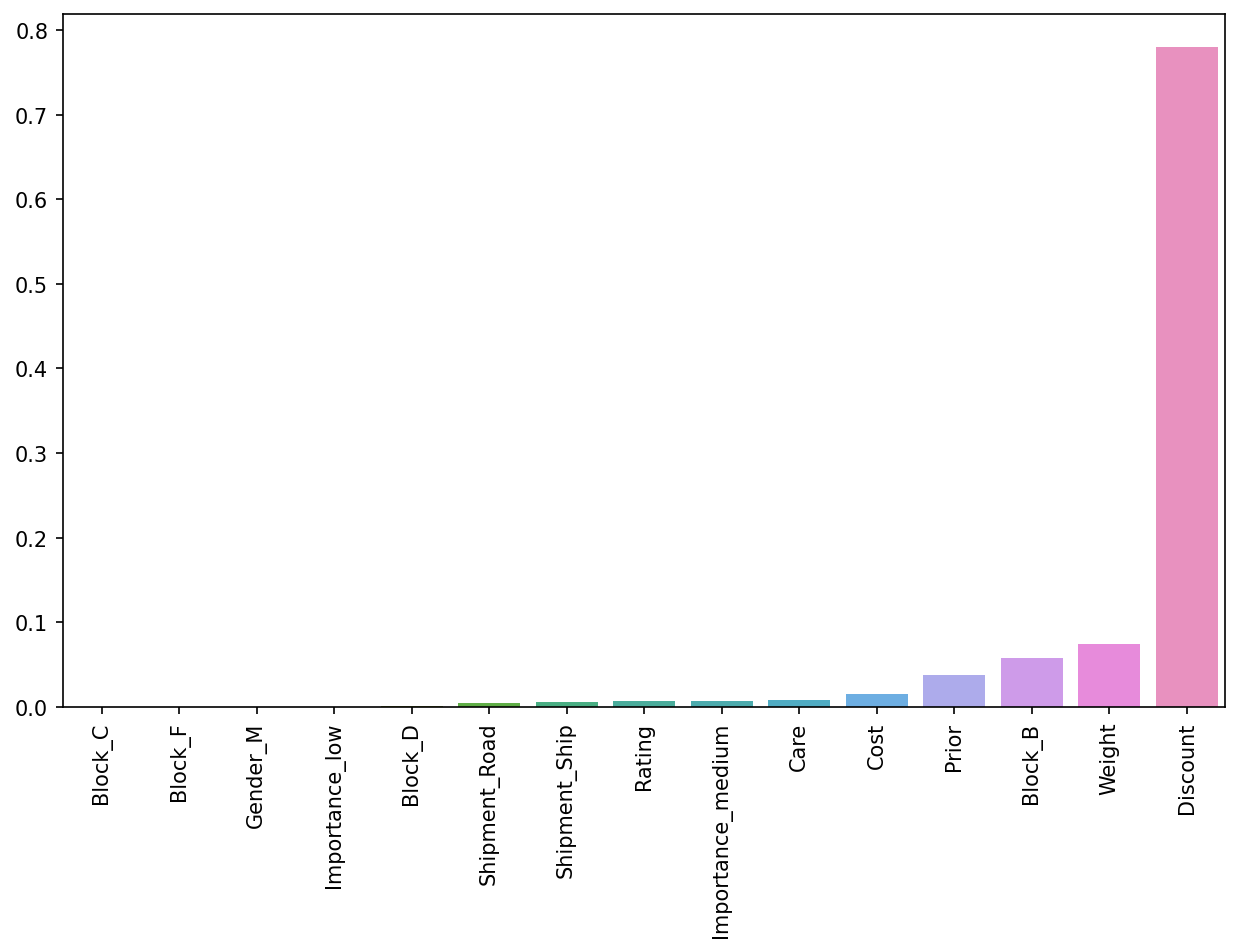

In [205]:
# Coefficient vizualisation with sorting
coefs = pd.Series(index = X.columns, data = model_15['gbc'].feature_importances_)
coefs = coefs.sort_values()
plt.figure(figsize=(10,6), dpi=150)
sns.barplot(x=coefs.index, y=coefs.values)
plt.xticks(rotation = 90)
plt.show()

*   We can expect the odds of delayed order to increase (the original coeff was positive) per unit increase of Discount.
*   We can expect the odds of delayed order to increase (the original coeff was positive) per unit increase of Weight.
*   We can expect the odds of delayed order to increase (the original coeff was
positive) per unit increase of Block.
*   The Discount indicator is the strongest predictor.

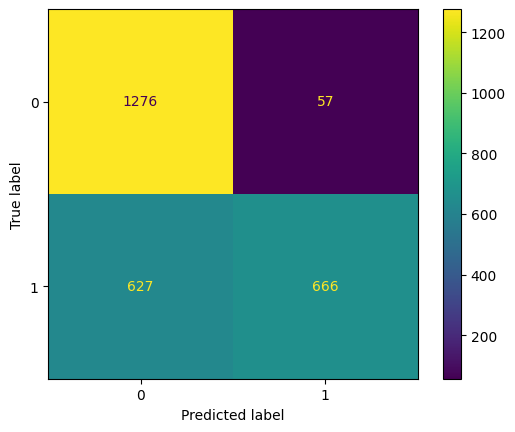

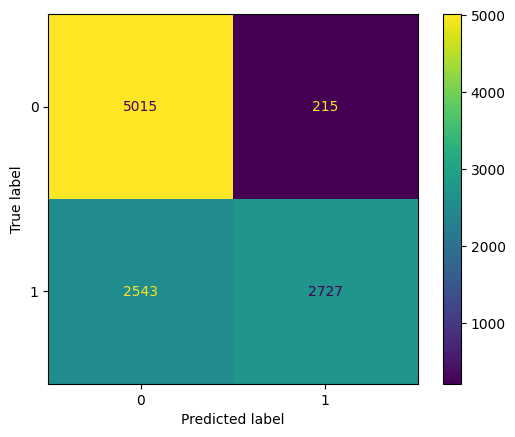

In [206]:
# Model performance evaluation for test and train set
y_pred = model_15.predict(X_test)
y_pred_tr = model_15.predict(X_train)
# Confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(model_15, X_test, y_test)
# Confusion matrix for train set
ConfusionMatrixDisplay.from_estimator(model_15, X_train, y_train)

In [207]:
# Classification report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.96      0.79      1333
           1       0.92      0.52      0.66      1293

    accuracy                           0.74      2626
   macro avg       0.80      0.74      0.72      2626
weighted avg       0.79      0.74      0.73      2626



In [208]:
# Classification report for train set
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       0.66      0.96      0.78      5230
           1       0.93      0.52      0.66      5270

    accuracy                           0.74     10500
   macro avg       0.80      0.74      0.72     10500
weighted avg       0.80      0.74      0.72     10500



*   The overall accuracy for test set is 0.74, for delayed orders (class 1) it achieved worse result 0.50 whereas for on-time orders (class 0) - 0.97.
*   Precision, recall and f1-score for test set for class 0 are: 0.67, 0.96, 0.79 and for class 1: 0.92, 0.52, 0.66.
*   The overall accuracy for train set is 0.74, for delayed orders (class 1) it achieved worse result 0.51 whereas for on-time orders (class 0) - 0.97.
*   Precision, recall and f1-score for train set for class 0 are: 0.66, 0.96, 0.78 and for class 1: 0.93, 0.52, 0.66.
*   For test set 0.52 relevant cases were found and for train set - 0.52 (recall for class 1).
*   For class 1, the prediction was correct in 92% for test cases and in 93% for train cases (precision for class 1).
*   Based on above, train and test sets achieved similar results.

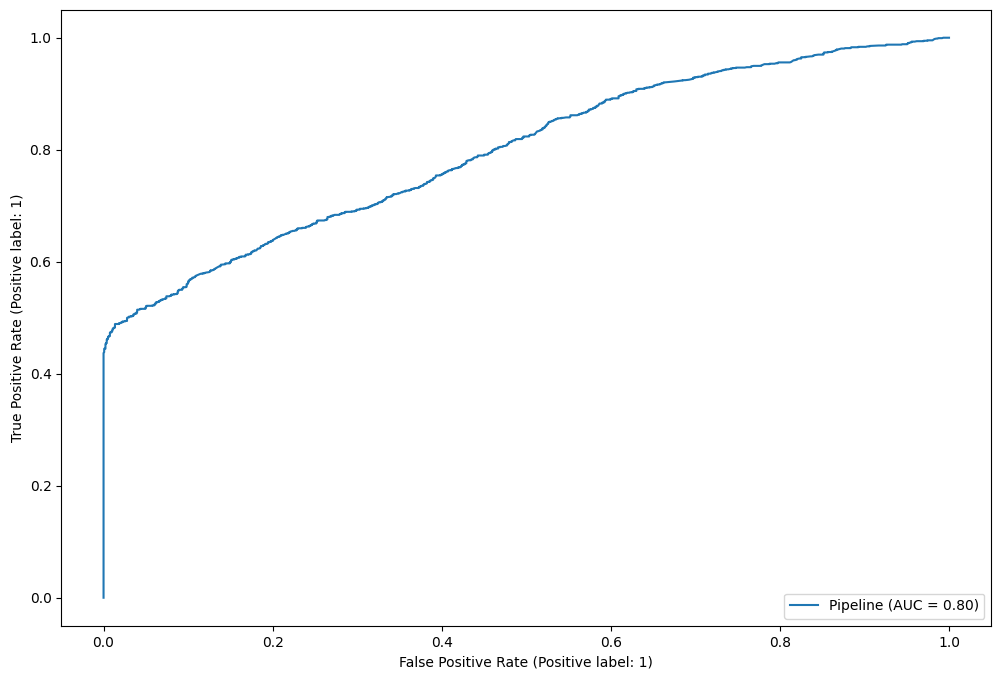

In [209]:
# ROC curve
fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_15, X_test, y_test, ax = ax)
plt.show()

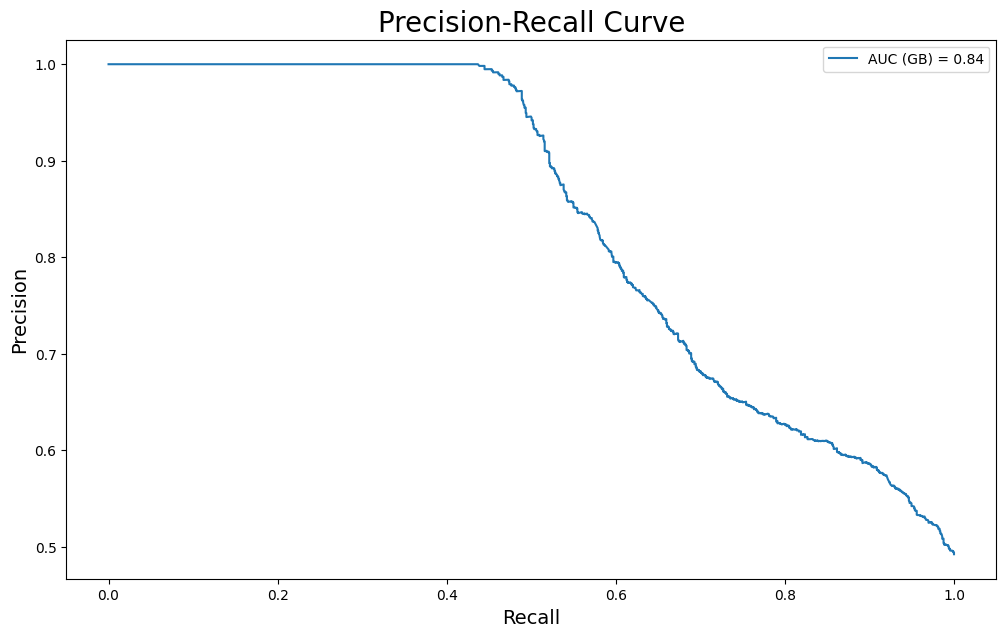

In [210]:
# Precision-Recall curve
y_scores = model_15.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, y_scores)
auc_1 = metrics.auc(recall, precision)
plt.figure(figsize=(12, 7))
plt.plot(recall, precision,  label=f'AUC (GB) = {auc_1:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend()

*   The clasifier for class 1 (delayed orders) has AUC = 0.84 which means that it achieved good predictive performance across all the thresholds. The higher the value of AUC, the better is the classifier.
*   At threshold with the low recall, the precision is correspondingly high.
*   At very high recall, the precision begins to drop.

In [211]:
# Save model results for future prediction
results.loc[len(results.index)] = ['GB with GridSearchCV', precision_score(y_train, y_pred_tr), recall_score(y_train, y_pred_tr), accuracy_score(y_train, y_pred_tr), f1_score(y_train, y_pred_tr),
                                   precision_score(y_test, y_pred), recall_score(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), auc_1]

# **Model summary**

In [212]:
results

,Name,Precision train,Recall train,Accuracy train,F1 train,Precision test,Recall test,Accuracy test,F1 test,AUC test
0,LR with GridSearchCV,0.753077,0.568880,0.690000,0.648146,0.736948,0.567672,0.687357,0.641328,0.804541
1,LR CV,0.788732,0.541935,0.697238,0.642447,0.778495,0.559938,0.704874,0.651372,0.809688
2,Simple KNN with eight neighbors,0.880739,0.596964,0.757143,0.711604,0.795506,0.547564,0.707921,0.648649,0.815437
3,KNN with GridSearchCV,0.869695,0.552182,0.733714,0.675487,0.825553,0.519722,0.709444,0.637874,0.816846
4,SVC with default parameters,0.944994,0.488994,0.729238,0.644492,0.941807,0.475638,0.727342,0.632066,0.821472
5,SVC with GridSearchCV,0.904583,0.456926,0.703238,0.607161,0.895613,0.457850,0.706778,0.605937,0.805133
6,Simple Tree with default parameters,1.000000,1.000000,1.000000,1.000000,0.650696,0.651199,0.656131,0.650947,0.736819
7,Tree with GridSearchCV,0.963366,0.454080,0.717333,0.617230,0.956169,0.455530,0.721630,0.617077,0.824718
8,Simple RFC,0.999618,0.992789,0.996190,0.996192,0.788934,0.595514,0.722391,0.678713,0.830757
9,RFC with GridSearchCV,1.000000,1.000000,1.000000,1.000000,0.766393,0.578500,0.705636,0.659321,0.832093



*   Two models: Simple Tree with default parameters and RFC with GridSerachCV have achieved accuracy of 100% which means that these models are overfitted.
*   Among rest models, best results for train set had: Tree with GridSearchCV (precision), LR with GridSearchCV (recall), GB with GridSearchCV (accuracy), GB with GridSearchCV (F1 score).
*   Among rest models, best results for test set had: Tree with GridSearchCV (precision), LR with GridSearchCV (recall), GB with GridSearchCV (accuracy, F1 score, AUC).
*   Tree and boosting models have achieved better overall results than LR, KNN and SVC ones.
*   Probably, the change of undersampling/oversampling method will result in better model performances.
*   Taking above into consideration, model **GB with GridSearchCV** will be target due to its high and stable performance on train and test data in context of all parameters.










# **Test data**

In [213]:
# Save chosen model
filename = 'model_15.sav'
joblib.dump(model_12, filename)

['model_15.sav']

In [214]:
# Load model Simple AdaBoost
filename = 'gdrive/My Drive/model_15.sav'
best_model = load(filename)

In [215]:
# Load sample
sam = pd.read_csv('gdrive/My Drive/sam.csv', delimiter=',')
#sam = sam.reindex(columns=(['Block','Shipment','CareCalls','Rating','Cost','PriorPurchases','Importance','Gender','Discount','Weight']))
#sam.columns = sam.columns.to_series().apply(lambda x: x.strip())
#sam.columns = (df.columns.str.strip().str.replace(' ', ''))

In [216]:
# Print sample
sam

,Block,Shipment,Care,Rating,Cost,Prior,Importance,Gender,Discount,Weight
0,D,Road,4,2,177,3,low,M,44,1233


In [217]:
# Prediction
result = best_model.predict(sam)
probability = best_model.predict_proba(sam)

In [218]:
print("Prediction:\n")
if result[0] == 1:
    print(f'Order will be delayed with probability of: {probability[0][1]}')
else:
    print(f'Order will not be delayed with probability of: {probability[0][0]}')

Prediction:

Order will be delayed with probability of: 0.974639230236187
